______________________________________
# <center>**Trabajo Practico Nº1 para la Materia *Organización de Datos***</center>

*Integrantes*: 
- 103963	Carolina Di Matteo	cdimatteo@fi.uba.ar
- 101231	Pablo Salvador Dimartino	pdimartino@fi.uba.ar
- 100113	Juan Sebastian Burgos	jsburgos@fi.uba.ar
- 104415	Valentina Laura Correa	vcorrea@fi.uba.ar

*Grupo*: 14

*Repositorio*: [github](https://github.com/valencorrea/7506R-2C2022-GRUPO14)

*Curso*: Rodriguez

*Cuatrimestre*: 2c2022
______________________________________



**Set Up**

In [1]:
pip install 'dtreeviz'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install 'geopandas'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install 'pyclustertend'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importación de librerías
import dtreeviz.trees as dtreeviz

import numpy as np
import cmath as math

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker
import pandas as pd
import geopandas as gpd

import seaborn as sns

import scipy as sc

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from pyclustertend import hopkins
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Configuración de Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Ejecución con Drive
if 'google.colab' in str(get_ipython()):
    IN_COLAB = True
else:
    IN_COLAB = False

if IN_COLAB :
    from google.colab import drive
    drive.mount('/content/drive')
    properati = pd.read_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/properati_argentina_2021.csv')
else:
    properati=pd.read_csv('properati_argentina_2021.csv')


#  **1. Análisis Exploratorio y Preprocesamiento de Datos**

## **1a. Exploración Inicial**


Como se indica inicialmente en el enunciado del trabajo práctico, prodecemos a hacer una división de nuestro data set con el cual vamos a trabajar. 

Lo que haremos será definir un 80% del mismo como el conjunto de entrenamiento, y el 20% restante lo usaremos para poder testear nuevos valores.

In [5]:
df_original = properati.copy()
df = df_original.sample(frac=0.8, random_state=200)
test = df_original.drop(df.index)

A continuación se realizará un análisis general de cada una de las variables presentes en el dataframe.

In [6]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Actualmente los únicos dos tipos de datos que tenemos son Float64 y Object.

Viendo las primeras entradas, podemos observar que el tipo Object oculta fechas que se adecuan mejor al tipo de datos DateTime.

In [7]:
df.head(5)

id  start_date    end_date  created_on  \
160116  JWtrhLm/BULQ5NeyL9xoqA==  2021-07-14  2021-08-21  2021-07-14   
92828   1gMQ4rXcpnPs+hhvW11Jdw==  2021-08-03  2021-10-28  2021-08-03   
327725  olHo7dLW4pHQnVQhAuv6/Q==  2021-12-14  2022-01-27  2021-12-14   
366457  GWMhOXhNCdPicnYbmZpT3w==  2021-04-10  2021-06-05  2021-04-10   
19975   p7gmyqzdOy/+odHwH5oPyg==  2021-01-27  2021-06-05  2021-01-27   

          latitud   longitud                place_l2       place_l3 place_l4  \
160116 -34.597419 -58.403760         Capital Federal       Recoleta      NaN   
92828  -34.622385 -58.448886         Capital Federal      Caballito      NaN   
327725        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
366457        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
19975  -34.618084 -58.359912         Capital Federal  Puerto Madero      NaN   

       place_l5  place_l6 operation    property_type  property_rooms  \
160116      NaN       NaN     Venta     Departamento             1.0   
92828       NaN       NaN     Venta     Departamento             4.0   
327725      NaN       NaN     Venta  Local comercial            10.0   
366457      NaN       NaN     Venta             Casa             3.0   
19975       NaN       NaN     Venta     Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
160116                1.0                    41.0                      37.0   
92828                 3.0                   113.0                      97.0   
327725                NaN                   230.0                     230.0   
366457                2.0                     NaN                     190.0   
19975                 1.0                    70.0                      65.0   

        property_price property_currency  \
160116             NaN               NaN   
92828         288000.0               USD   
327725        250000.0               USD   
366457        300000.0               USD   
19975         450000.0               USD   

                                           property_title  
160116  Excelente monoambiente con balcón Apto profesi...  
92828   Vta. Dpto. 4amb, Caballito, balcón aterrazado ...  
327725                                   Local - La Plata  
366457                           Casa - Campos de Roca II  
19975           Departamento con Cochera en Puerto Madero

### Preparación de los datasets

---

Aplicamos los filtros necesarios que figuran en los requerimientos, y cambiamos el dtype de las fechas a DateTime.

In [8]:
df = df.loc[df['property_type'].isin(["Casa", "PH", "Departamento"])].loc[df['place_l2'].isin(["Capital Federal"])].loc[df['operation'].isin(["Venta"])].loc[df['property_currency'].isin(["USD"])]
df['start_date'] = pd.to_datetime(df['start_date'])
df['created_on'] = pd.to_datetime(df['created_on'])
df.replace(to_replace="9999-12-31", value="", inplace=True)
df['end_date'] = pd.to_datetime(df['end_date'])

max_end_date = max(df['end_date'])
df['start_date'] = df['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['start_date']))
df['end_date'] = df['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
df['created_on'] = df['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['created_on']))


df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Replicamos los filtros realizados para el dataset de test:

In [9]:
test = test.loc[test['property_type'].isin(["Casa", "PH", "Departamento"])].loc[test['place_l2'].isin(["Capital Federal"])].loc[test['operation'].isin(["Venta"])].loc[test['property_currency'].isin(["USD"])]
test['start_date'] = pd.to_datetime(test['start_date'])
test['created_on'] = pd.to_datetime(test['created_on'])
test.replace(to_replace="9999-12-31", value="", inplace=True)
test['end_date'] = pd.to_datetime(test['end_date'])

max_end_date = max(test['end_date'])
test['start_date'] = test['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['start_date']))
test['end_date'] = test['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
test['created_on'] = test['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(test['created_on']))

test.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Descripción de Campos

---

A continuación, realizamos una descripción de cada una de las variables del dataset e indicamos cuál de ellas corresponde a una del tipo cualitativa o cuantitativa.

`id`: Identificador del aviso

`start_date`: Fecha de alta del aviso

`end_date`: Fecha de baja del aviso

`created_on`: Fecha de alta de la primera versión del aviso

`latitud`: Ubicación geográfica

`longitud`: Ubicación geográfica

`place_l2`: Nivel administrativo 2, usualmente provincia

`place_l3`: Nivel administrativo 3, usualmente ciudad

`place_l4`: Nivel administrativo 4, usualmente barrio

`place_l5`: Nivel administrativo 5

`place_l6`: Nivel administrativo 6

`operation`: Tipo de operación (venta, alquiler), variable cualitativa

`property_type`: Tipo de propiedad (casa, departamento, ph), variable cualitativa

`property_rooms`: Cantidad de ambientes, variable cuantitativa

`property_bedrooms`: Cantidad de dormitorios, variable cuantitativa

`property_surface_total`: Superficie total en metros cuadrados

`property_surface_covered`: Superficie cubierta en metros cuadrados

`property_price`: Precio publicado en el anuncio

`property_currency`: Moneda del precio publicado, variable cualitativa

`property_title`: Título del anuncio

### Variables Cuantitativas: Medidas de Resumen

---

Calculamos, para la totalidad de las variables que nos brinda el dataset:
- media
- mediana
- q1
- q3 
- moda

In [10]:
df_cuantitativas = df[['property_rooms', 'property_bedrooms']]

In [11]:
df_cuantitativas.describe().loc[['mean', '25%', '75%', 'std']].append(df_cuantitativas.median().rename("median"))

property_rooms  property_bedrooms
mean          2.825187           2.018113
25%           2.000000           1.000000
75%           4.000000           3.000000
std           1.423749           1.134732
median        3.000000           2.000000

### Variables Cualitativas: Cantidades y Frecuencias

---

Realizamos, para las variables `place_l3`, `place_l4` y `property_type` un cálculo de los diferentes valores así también como sus respectivas frecuencias.

In [12]:
print(f"place_l3 tiene {df.nunique()['place_l3']} valores diferentes")

place_l3 tiene 57 valores diferentes


Text(0.5, 0, 'Variable place_l3')

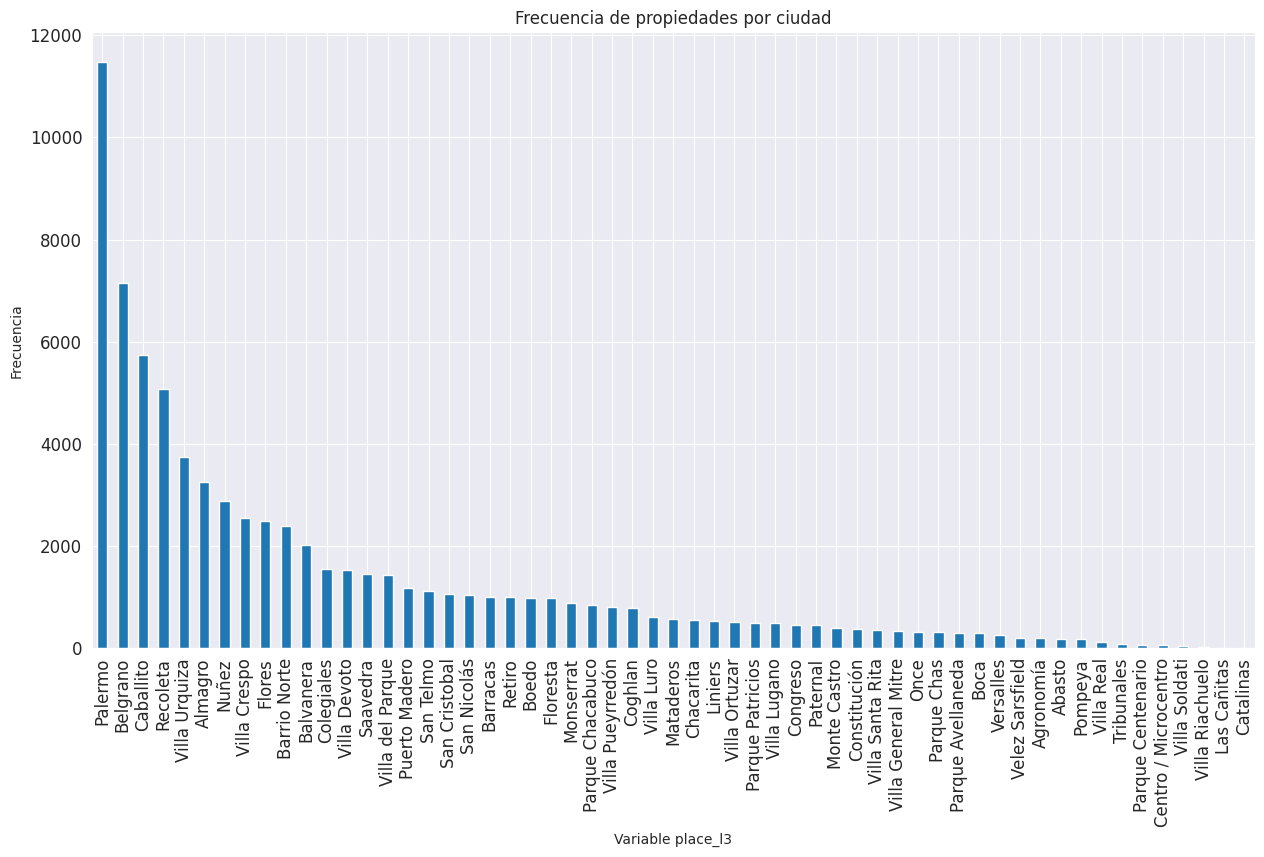

In [13]:
fig, ax = plt.subplots()
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12)
plt.title('Frecuencia de propiedades por ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l3')

In [14]:
print(f"place_l4 tiene {df.nunique()['place_l4']} valores diferentes")

place_l4 tiene 4 valores diferentes


Text(0.5, 0, 'Variable place_l4')

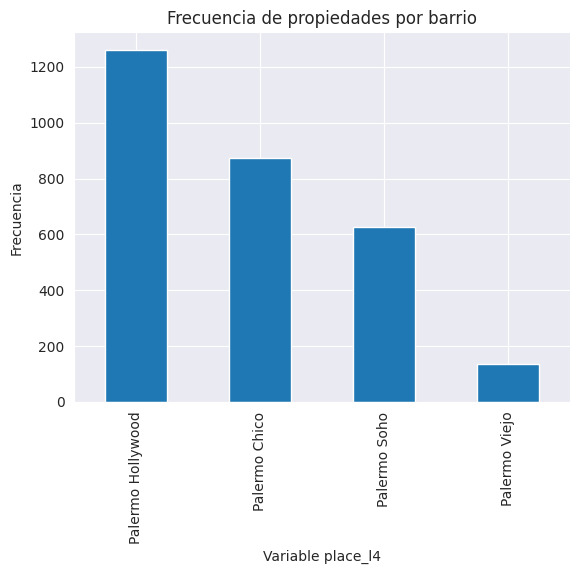

In [15]:
fig, ax = plt.subplots()
df['place_l4'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l4')

In [16]:
print(f"property_type tiene {df.nunique()['property_type']} valores diferentes")

property_type tiene 3 valores diferentes


Text(0.5, 0, 'Variable property_type')

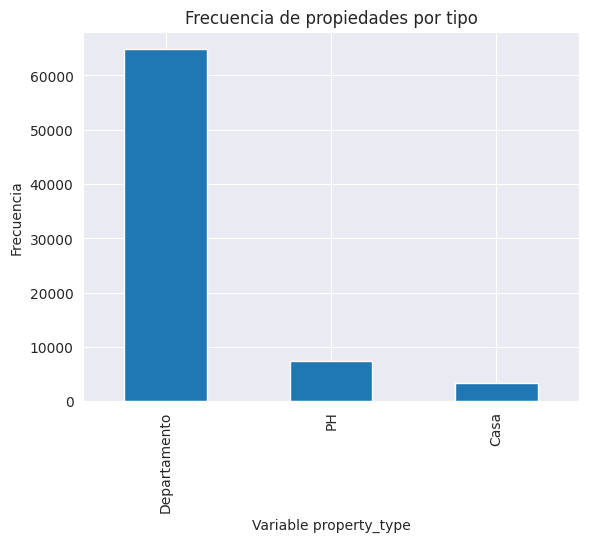

In [17]:
fig, ax = plt.subplots()
df['property_type'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por tipo')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_type')

### Determinación de Variables Irrelevantes

---

Finalmente, podremos decir que dejamos fuera de este análisis particular a las a las siguientes variables que detallamos a continuación:

- `id`: No contiene información relevante para el análisis.
- `operation`: Sólo hay un tipo de operación según lo solicitado en la consigna y es "Venta", con lo cual la consideramos irrelevante en el análisis.
- `property_currency`: Sólo hay un tipo de cambio según lo solicitado en la consigna y es "USD", con lo cual la consideramos irrelevante en el análisis.
- `place_l5`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `place_l6`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `property_title`: De conocer previamente la información que contiene el dataset, sabemos que la variable en cuestión almacena un único título por publicación, con lo cual la consideramos irrelevante en el análisis.

Las mismas serán eliminadas en la sección de reducción de dimnesionalidad. Es por este motivo que, de aquí en más, no se tendrán en cuenta para los análisis.


### Análisis Gráfico de las Distribuciones de las Variables

---



#### Densidad de la variable `property_price`

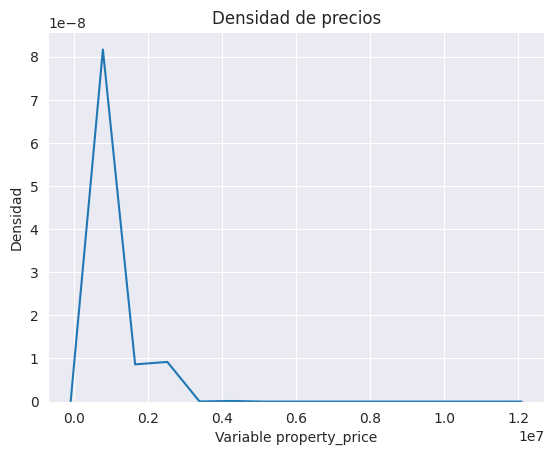

In [18]:
d = sns.kdeplot(data=df.property_price, gridsize=15).set(title="Densidad de precios",xlabel="Variable property_price",ylabel="Densidad")

#### Densidad de la variable `property_rooms`

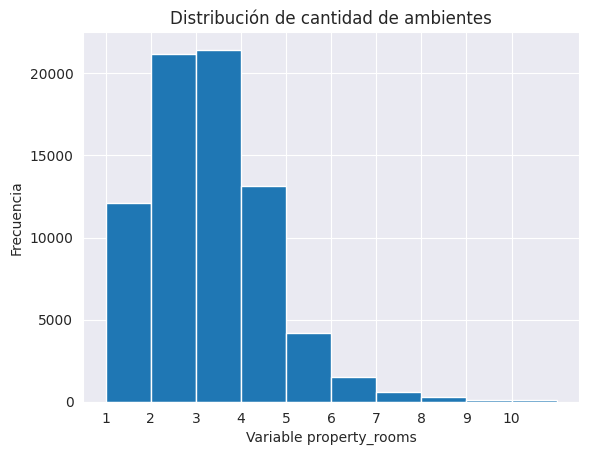

In [19]:
plt.hist(df.property_rooms, bins=10, range=(1,11))
plt.title('Distribución de cantidad de ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_rooms')
plt.xticks(np.arange(1,11,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_bedrooms`

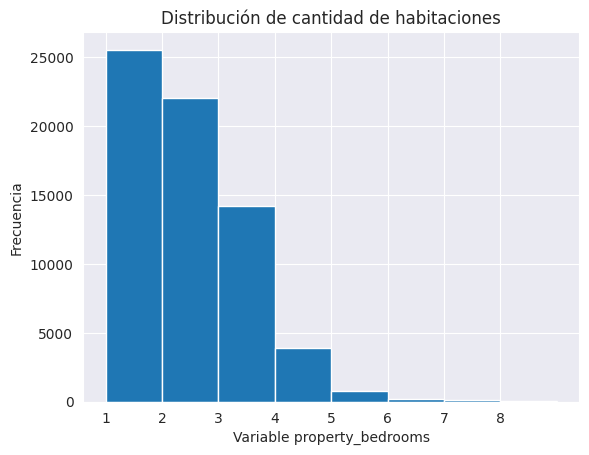

In [20]:
plt.hist(df.property_bedrooms, bins=8, range=(1,9))
plt.title('Distribución de cantidad de habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_bedrooms')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_surface_covered`

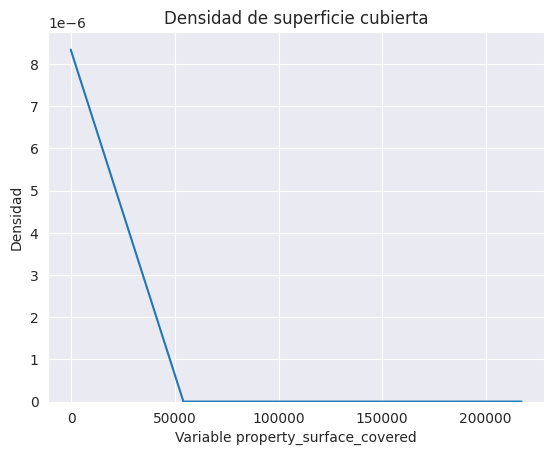

In [21]:
d = sns.kdeplot(data=df.property_surface_covered, gridsize=5).set(title="Densidad de superficie cubierta",xlabel="Variable property_surface_covered",ylabel="Densidad")

### Análisis de las Correlaciones existentes entre las Variables

---

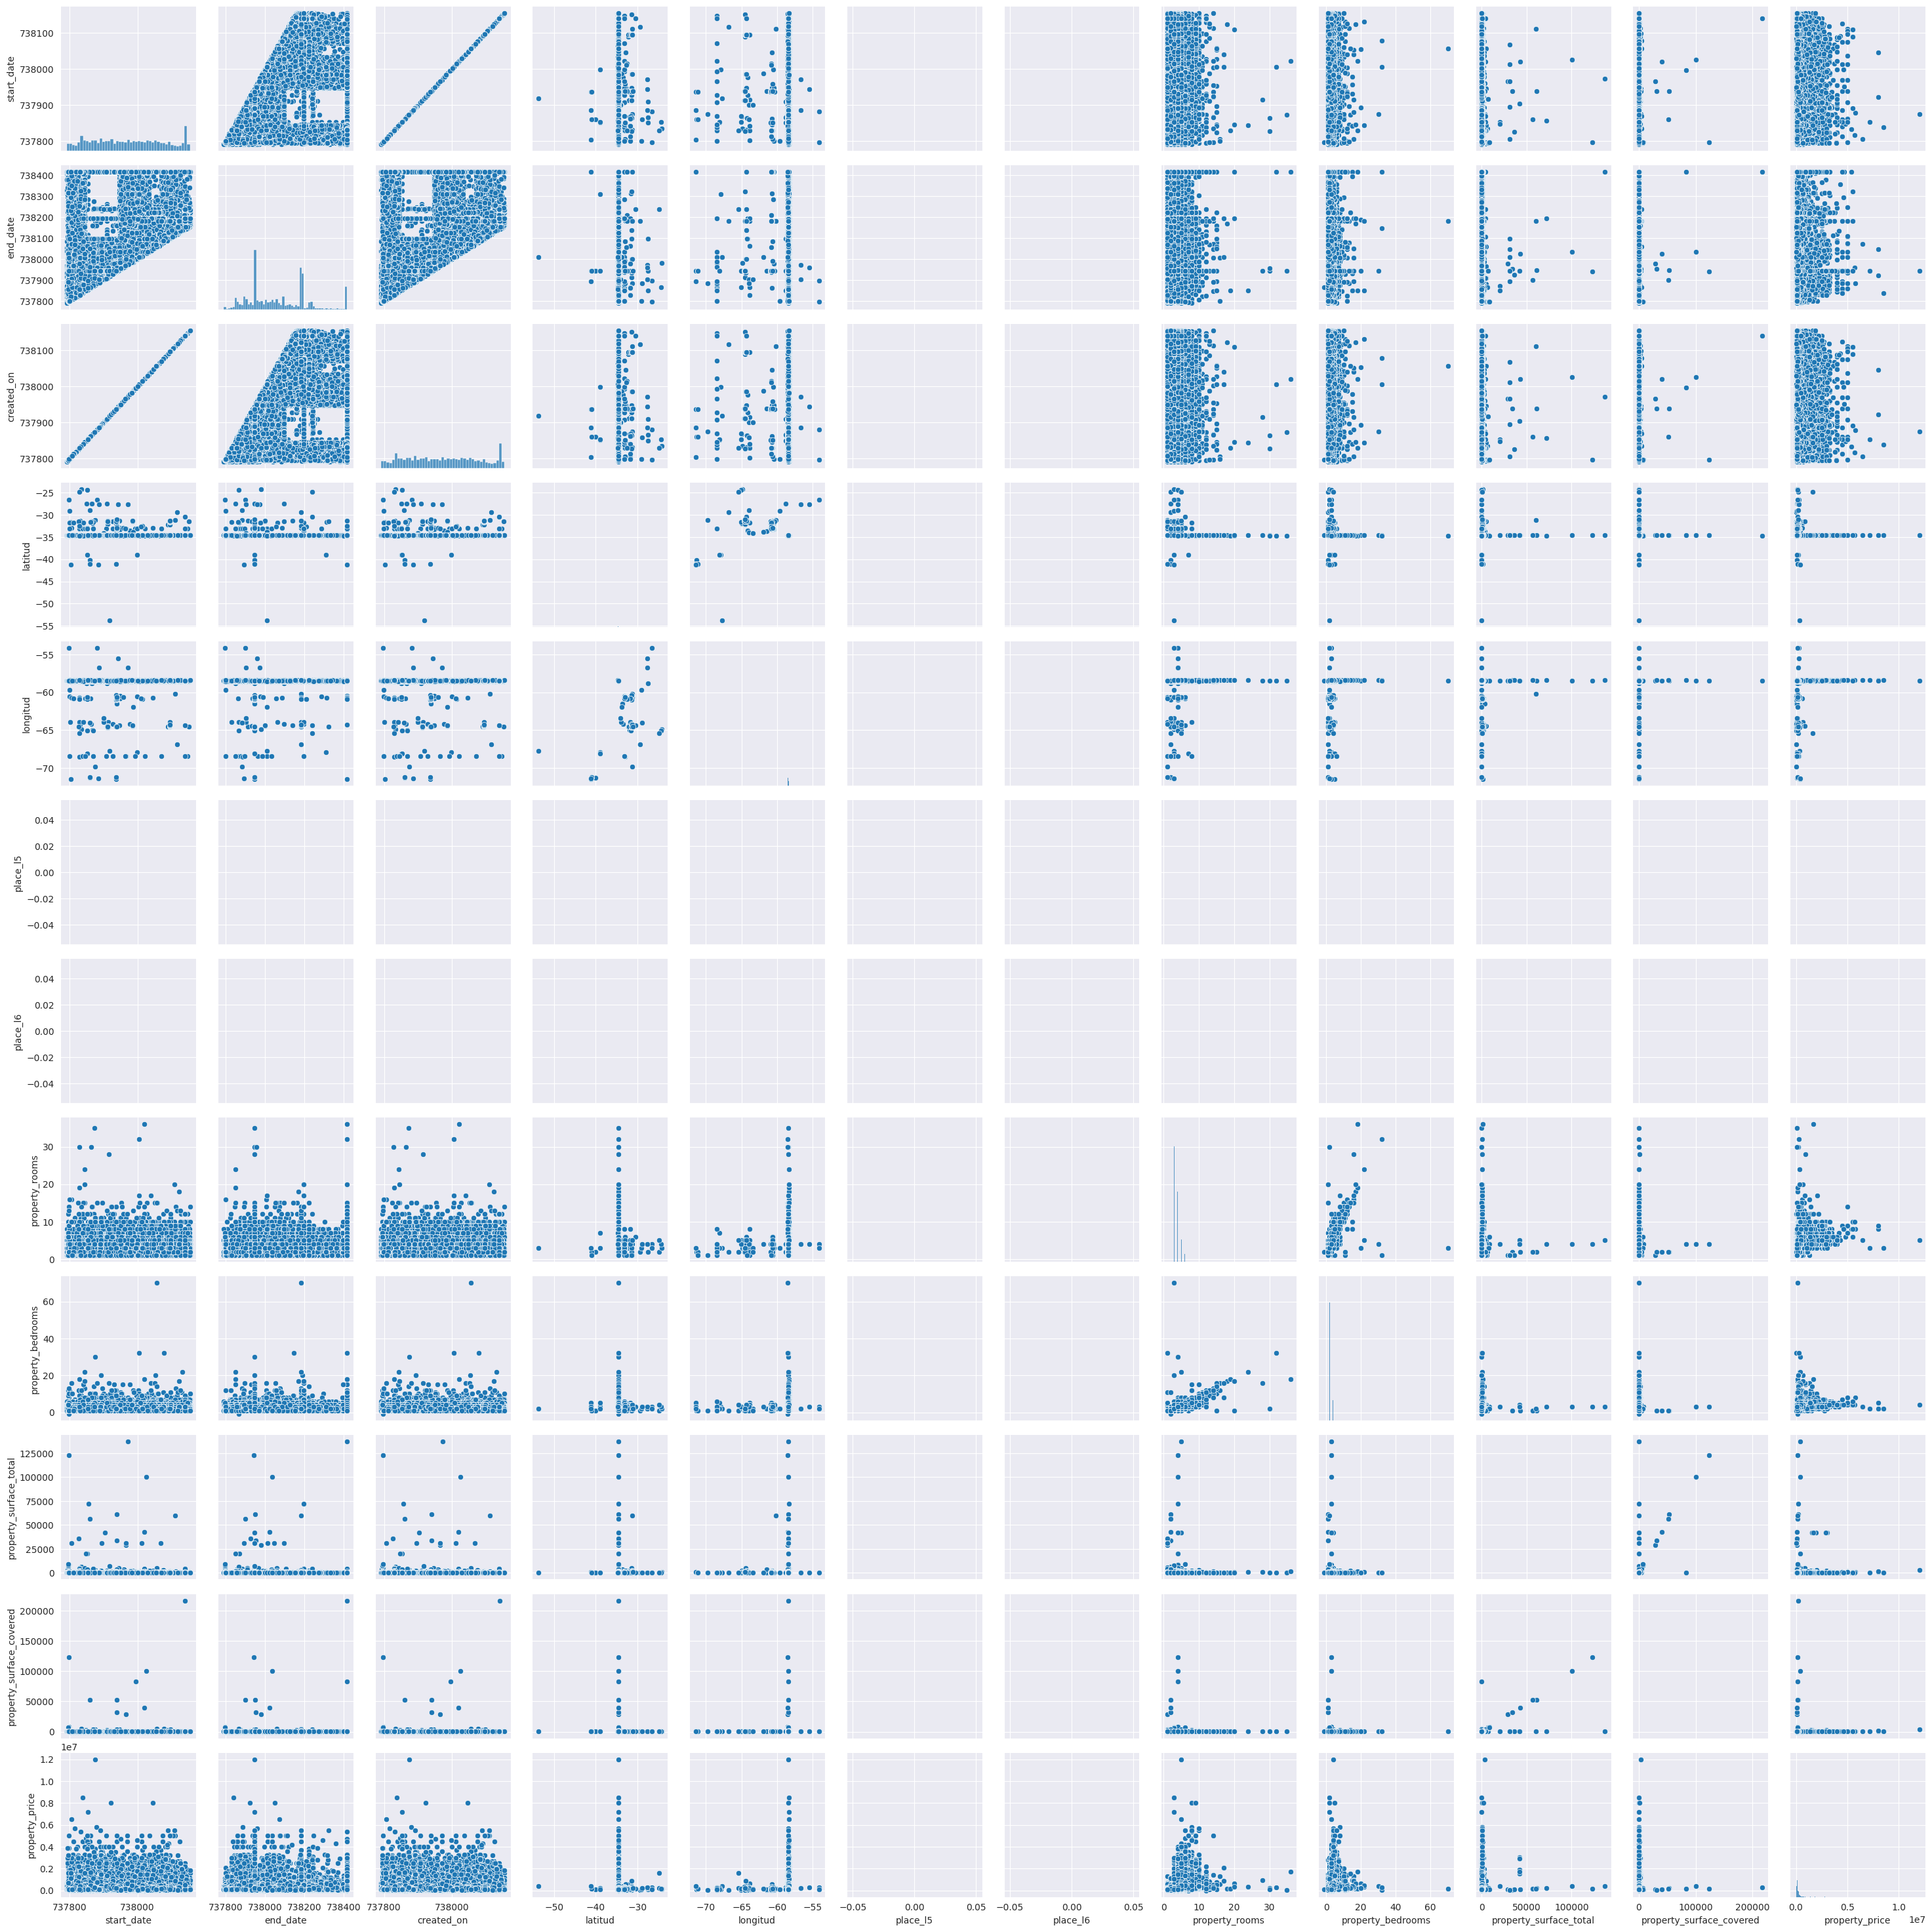

In [22]:
graf_pairplot = sns.pairplot(data=df)

### Conclusiones
----

Luego de tener este primer acercamiento con el dataset pudimos realizar varias observaciones. 

En un primer lugar, luego de explorar las distintas variables que este comprendía, llegamos a la conclusión de que contábamos con varias que ante nuestro problema no iban a presentar relevancia. Es por esta razón que decidimos suprimirlas de nuestros datasets de trabajo, tanto para train como para el que luego usaremos para realizar los tests. 

Además de esto, notamos que teníamos diferencias en los tipos de variables con las cuales contábamos, razón por la cual decidimos explicitar las que se correspondian a cuantitativas o cualitativas, ya que estas aclaraciones luego nos serán de utilidad al momento de determinar los gráficos a realizar. Estos además, nos sirvieron para identificar y tener dimensión de las distribuciones y que tan relacionadas están nuestras variables entre sí. 

Por último realizamos los cálculos de las medidas de resumen sobre estas variables resultantes, las cuales estaremos utilizando para realizar diferentes operaciones a lo largo del trabajo.

## **1b. Datos Faltantes**

A continuación se realizara un análisis sobre los datos faltantes del dataframe.

### Análisis a Nivel Columna

---



Graficamos, para cada variable, el porcentaje (diferente de cero) de datos faltantes con respecto al total del dataset en escala logarítmica.

Text(0.5, 0, 'Variables del dataset')

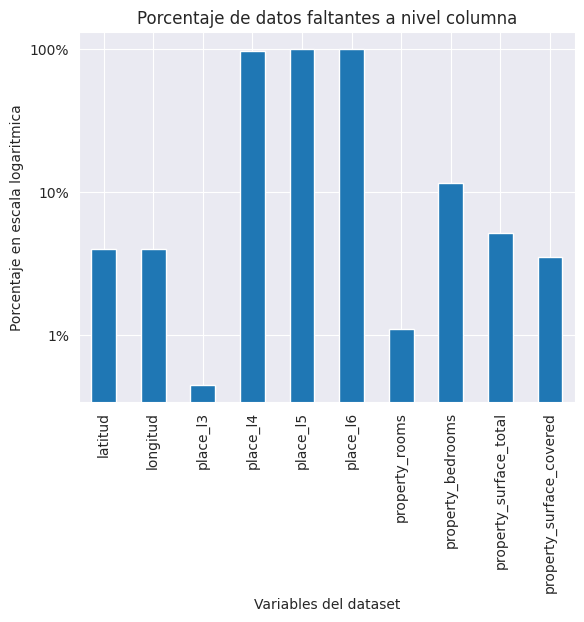

In [23]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter())
(df.isnull().sum() * 100 / len(df)).replace(0,np.nan).dropna(axis=0,how="all").plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel columna')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Variables del dataset')

### Análisis a Nivel Fila

---



Graficamos el porcentaje de filas con n datos faltantes con respecto al total del dataset.

Text(0.5, 0, 'Cantidad de datos faltantes')

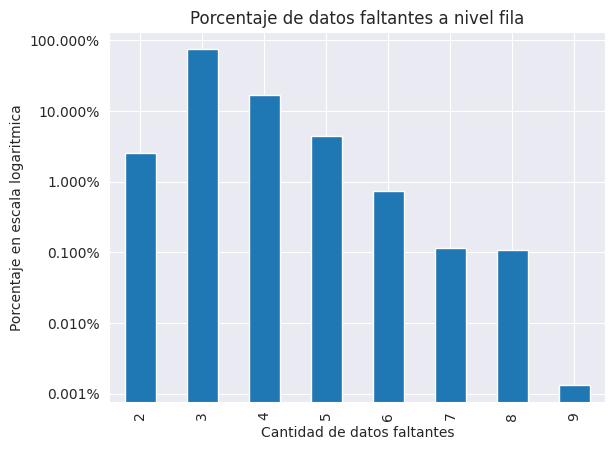

In [24]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=3))
(df.isnull().sum(axis=1).value_counts().sort_index() * 100 / len(df)).plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel fila')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Cantidad de datos faltantes')

### Reparación de Valores Faltantes

---



A continuación se detallan posibles estrategias para reparar los valores faltantes del dataset.

Guardamos una copia del dataset sin imputaciones realizadas para comparar más adelante:

In [25]:
df_sin_reparacion = df.copy()

#### Variables `start_date`, `end_date` y `created_on`

Puesto que no hay valores faltantes para las variables de fechas, no es necesario realizar una reparación de las mismas.

#### Variables `place_l3` y `place_l4`

Reemplazamos las locaciones no definidas por el nivel superior:

In [26]:
df.place_l3.fillna(df.place_l2, inplace=True)
df.place_l4.fillna(df.place_l3, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `place_l3`:


In [27]:
df["place_l3"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `place_l4`:


In [28]:
df["place_l4"].isna().sum()

0

Veamos que, al realizar esta imputación de datos las variables `place_l2` y `place_l3` quedan obsoletas pues la información de relevancia respecto a la ubicación de la propiedad en venta se encuentra en la variable `place_l4` y es por esta razón que podremos eliminarlas del dataset. Nos encargaremos de realizar la tarea en cuestión en la sección de reducción de la dimensionalidad y, es por esta razón, que no estaremos utilizándolas en los análisis posteriores.

Replicamos para el dataset de test:

In [29]:
test.place_l3.fillna(test.place_l2, inplace=True)
test.place_l4.fillna(test.place_l3, inplace=True)

In [30]:
test["place_l3"].isna().sum()

0

In [31]:
test["place_l4"].isna().sum()

0

#### Variables `latitud` y `longitud`

Imputamos, a partir de las medias de las variables `latitud` y `longitud` agrupando según los valores de `place_l4` los valores faltantes de `latitud` y `longitud`. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada barrio. Para visualizar las diferencias en la variable previas y posteriores a la imputación de datos, graficamos -a modo de ejemplo- la densidad para el barrio de Palermo:

In [32]:
medians_latitudes = {}

for barrio in df["place_l4"].unique() :
    lat_median = df.loc[(df["place_l4"] == barrio) & (df['latitud'].notna())].latitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"] = df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"].fillna(lat_median)
    medians_latitudes[barrio] = lat_median

Veamos los valores resultantes en el diccionaro de medias de latitudes:

In [33]:
medians_latitudes

{'Caballito': -34.6194061,
 'Puerto Madero': -34.6126394,
 'Balvanera': -34.60831005,
 'San Nicolás': -34.6030779,
 'Retiro': -34.59610936185,
 'Villa Urquiza': -34.5736133,
 'Villa del Parque': -34.604529691799996,
 'Colegiales': -34.5760225,
 'Villa Crespo': -34.598273692099994,
 'Almagro': -34.6058615,
 'San Telmo': -34.6209352,
 'Flores': -34.6286921369,
 'Palermo': -34.5820981,
 'Palermo Chico': -34.5794167,
 'Nuñez': -34.548096650000005,
 'Barracas': -34.6358354,
 'Villa General Mitre': -34.610502100000005,
 'Belgrano': -34.5623790515,
 'Parque Avellaneda': -34.6448557,
 'Parque Chacabuco': -34.6347007,
 'Versalles': -34.6296804,
 'Recoleta': -34.5920227,
 'Boedo': -34.62756628955,
 'Monte Castro': -34.621131,
 'Palermo Hollywood': -34.58057085,
 'Villa Real': -34.6207965,
 'Boca': -34.63204751155,
 'Barrio Norte': -34.59381705,
 'Saavedra': -34.5512603978,
 'Coghlan': -34.5614349,
 'Velez Sarsfield': -34.63229,
 'Mataderos': -34.6551649,
 'Villa Ortuzar': -34.5821500876,
 'Pater

In [34]:
medians_longitudes = {}

for barrio in df["place_l4"].unique() :
    long_median = df.loc[(df["place_l4"] == barrio) & (df['longitud'].notna())].longitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"] = df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"].fillna(long_median)
    medians_longitudes[barrio] = long_median

Veamos los valores resultantes en el diccionaro de medias de longitudes:

In [35]:
medians_longitudes

{'Caballito': -58.4412248,
 'Puerto Madero': -58.3618883,
 'Balvanera': -58.402031449999996,
 'San Nicolás': -58.3834625,
 'Retiro': -58.3785708,
 'Villa Urquiza': -58.4861351,
 'Villa del Parque': -58.48984955,
 'Colegiales': -58.45016895,
 'Villa Crespo': -58.4407171,
 'Almagro': -58.4223603,
 'San Telmo': -58.3748503,
 'Flores': -58.46332195,
 'Palermo': -58.42346605,
 'Palermo Chico': -58.4072524,
 'Nuñez': -58.46633,
 'Barracas': -58.3739745,
 'Villa General Mitre': -58.4683198,
 'Belgrano': -58.4544909,
 'Parque Avellaneda': -58.477562,
 'Parque Chacabuco': -58.4379678,
 'Versalles': -58.5200459,
 'Recoleta': -58.3959194307,
 'Boedo': -58.41800275,
 'Monte Castro': -58.504708,
 'Palermo Hollywood': -58.435209650000004,
 'Villa Real': -58.5244913,
 'Boca': -58.3629598,
 'Barrio Norte': -58.40413825,
 'Saavedra': -58.4824258,
 'Coghlan': -58.474658500000004,
 'Velez Sarsfield': -58.4926237,
 'Mataderos': -58.5035614,
 'Villa Ortuzar': -58.4689315,
 'Paternal': -58.4646755,
 'Parque

Calculamos la cantidad de datos nulos restantes para la variable `latitud`:


In [36]:
df["latitud"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `longitud`:


In [37]:
df["longitud"].isna().sum()

0

Replicamos para el dataset de test:

In [38]:
for barrio in test["place_l4"].unique() :
    lat_median = medians_latitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"] = test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"].fillna(lat_median)

In [39]:
for barrio in test["place_l4"].unique() :
    long_median = medians_longitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"] = test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"].fillna(long_median)

In [40]:
test["latitud"].isna().sum()

0

In [41]:
test["longitud"].isna().sum()

0

#### Variables `property_surface_total` y `property_surface_covered`

Cuando se tiene la superficie total pero no la cubierta o viceversa, reemplazamos los valores faltantes con su contraparte

In [42]:
df.property_surface_total.fillna(df.property_surface_covered, inplace=True)
df.property_surface_covered.fillna(df.property_surface_total, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_total`:


In [43]:
df["property_surface_total"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_covered`:

In [44]:
df["property_surface_covered"].isna().sum()

0

Replicamos para el dataset de test:

In [45]:
test.property_surface_total.fillna(test.property_surface_covered, inplace=True)
test.property_surface_covered.fillna(test.property_surface_total, inplace=True)

In [46]:
test["property_surface_total"].isna().sum()

0

In [47]:
test["property_surface_covered"].isna().sum()

0

#### Variables `property_rooms` y `property_bedrooms`

Reemplazamos la cantidad de habitaciones no definidas por la media calculada filtrando por cantidad total de dormitorios. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada cantidad de ambientes.

In [48]:
cant = df.loc[(df['property_rooms'].isna()) & (df['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values
medians_rooms = {}

for i in cant:
    median = df.loc[(df['property_rooms'].notna()) & (df['property_bedrooms'] == i)].property_rooms.median()
    df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"] = df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"].fillna(median)
    medians_rooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de ambientes:

In [49]:
medians_rooms

{3.0: 4.0,
 2.0: 3.0,
 4.0: 5.0,
 1.0: 2.0,
 5.0: 6.0,
 6.0: 7.0,
 7.0: 8.0,
 10.0: 12.0,
 8.0: 9.0,
 11.0: 11.0,
 9.0: 10.0,
 14.0: 15.0,
 13.0: 15.0,
 12.0: 14.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [50]:
df["property_rooms"].isna().sum()

341

Para eliminar los últimos valores nulos en las columnas de ambientes, lo completamos con una regresión en funcion de la superficie cubierta:

In [51]:
df_rooms = df.loc[df['property_rooms'].notna()]
reg_rooms = LinearRegression().fit(np.array(df_rooms['property_surface_covered']).reshape(-1, 1), df_rooms['property_rooms'])

In [52]:
df_topredict = df.loc[df['property_rooms'].isna()]['property_surface_covered']
df['property_rooms'] = df.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [53]:
df["property_rooms"].isna().sum()

0

Luego reemplazamos la cantidad total de dormitorios no definidas por la media calculada filtrando por cantidad de ambientes.

Esto redujo el porcentaje de valores no definidos para los dormitorios y ambientes a menos de 1%, desde 10% y 1,5% respectivamente.

In [54]:
cant = df.loc[(df['property_bedrooms'].isna()) & (df['property_rooms'].notna())].property_rooms.value_counts().index.values
medians_bedrooms = {}

for i in cant:
    median = df.loc[df['property_rooms'] == i].property_bedrooms.median()
    if pd.isna(median):
        median = df.loc[df['property_rooms'] == i]['property_rooms'].iloc[0]
    df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"] = df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"].fillna(median)
    medians_bedrooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de dormitorios:

In [55]:
medians_bedrooms

{1.0: 1.0,
 3.0: 2.0,
 2.0: 1.0,
 4.0: 3.0,
 5.0: 4.0,
 6.0: 4.0,
 7.0: 4.0,
 10.0: 6.0,
 12.0: 8.0,
 9.0: 5.0,
 8.0: 5.0,
 15.0: 13.0,
 11.0: 8.0,
 35.0: 35.0,
 33.0: 33.0,
 14.0: 11.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_bedrooms`:



In [56]:
df["property_bedrooms"].isna().sum()

0

Replicamos para el dataset de test:

In [57]:
cant = test.loc[(test['property_rooms'].isna()) & (test['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values

for i in cant:
    median = medians_rooms[i]
    test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"] = test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"].fillna(median)

In [58]:
test['property_rooms'] = test.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

In [59]:
test["property_rooms"].isna().sum()

0

In [60]:
cant = test.loc[(test['property_bedrooms'].isna()) & (test['property_rooms'].notna())].property_rooms.value_counts().index.values

for i in cant:
    if i not in medians_bedrooms:
        median = test.loc[test['property_rooms'] == i]['property_rooms'].iloc[0]
    else:
        median = medians_bedrooms[i]
    test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"] = test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"].fillna(median)

In [61]:
test["property_bedrooms"].isna().sum()

0

#### Conclusiones

A partir de la presencia de valores faltantes en cada una de las variables trabajadas, realizamos distintos tipos de imputaciones según lo que requería cada una, entre ellos: completar con el nivel inmediatamente anterior, reemplazar con el valor de la media correspondiente, y, predecir mediante regresión lineal.

Para las variables `place_l3` y `place_l4` tomamos la decisión de completar los valores faltantes con el valor previo dado que las mismas son de tipo `str` y no admiten cálculos numéricos. A continuación, podemos apreciar la diferencia obtenida entre las distribuciones de las variables previas y posteriores a la imputación de datos.

Text(0.5, 0, 'Ciudades')

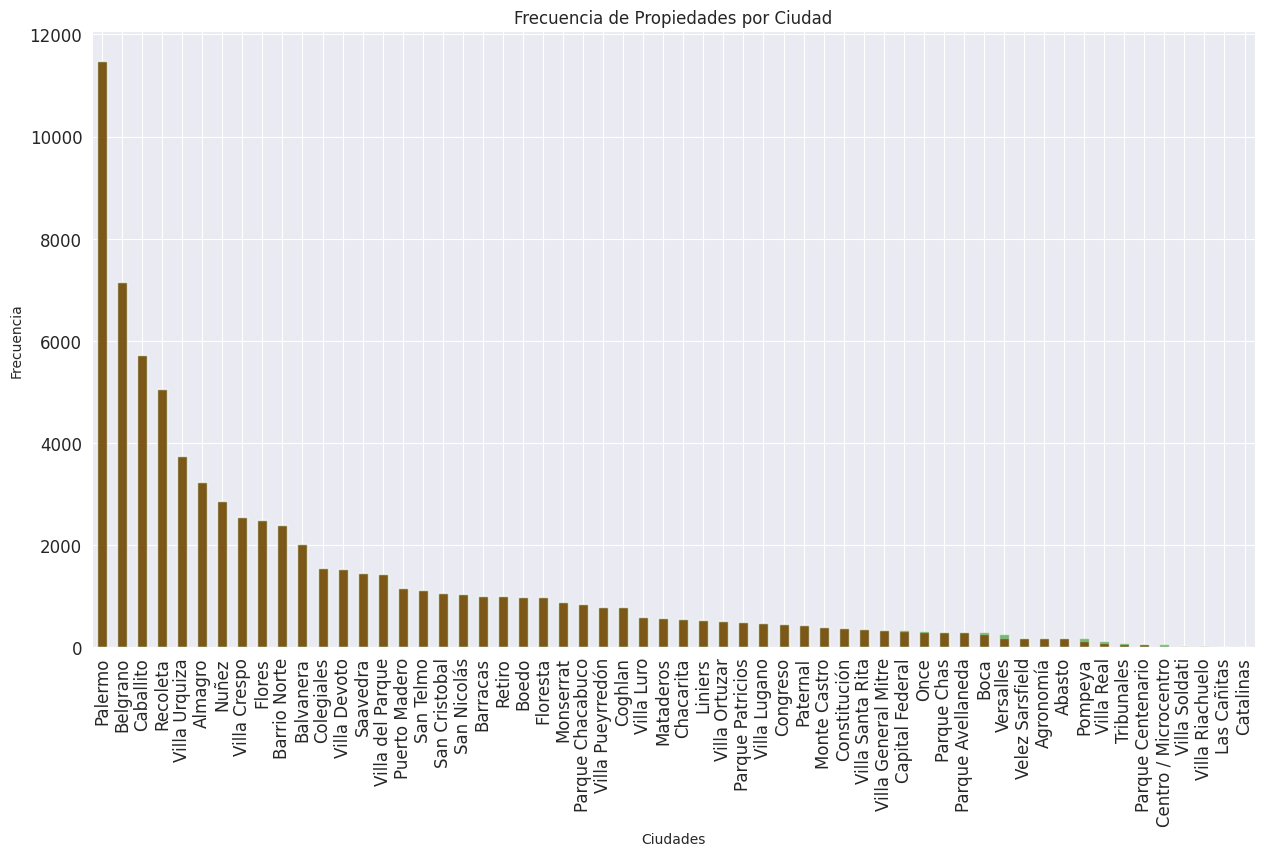

In [62]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Ciudades')

Como podemos notar, al ser bajo el porcentaje de datos faltantes para la variable `place_l3`, la distribución de la misma no presenta grandes cambios a pesar de la imputación realizada.

Text(0.5, 0, 'Barrios')

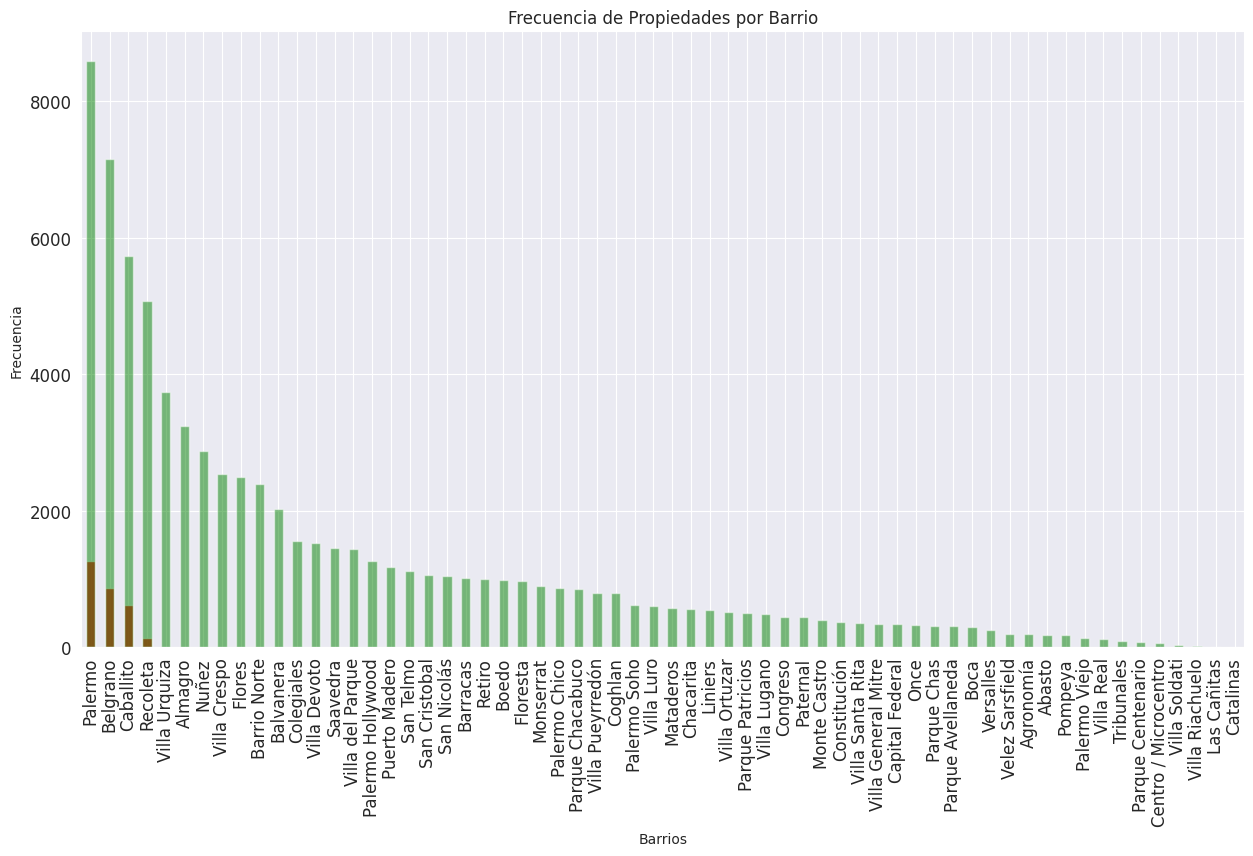

In [63]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Barrios')

Por el contrario de lo observado en el gráfico anterior, dado que la variable `place_l4` tenía un alto grado de valores faltantes (casi del 100% sobre todo el dataset), y puesto que los mismos fueron reemplazados por su antecesor inmediato (es decir: los valores existentes en `place_l3`) es esperable que la distribución de la misma tenga un cambio significativo luego de la imputación realizada. Más aún: es inclusive muy similar a la distribución de `place_l3`.

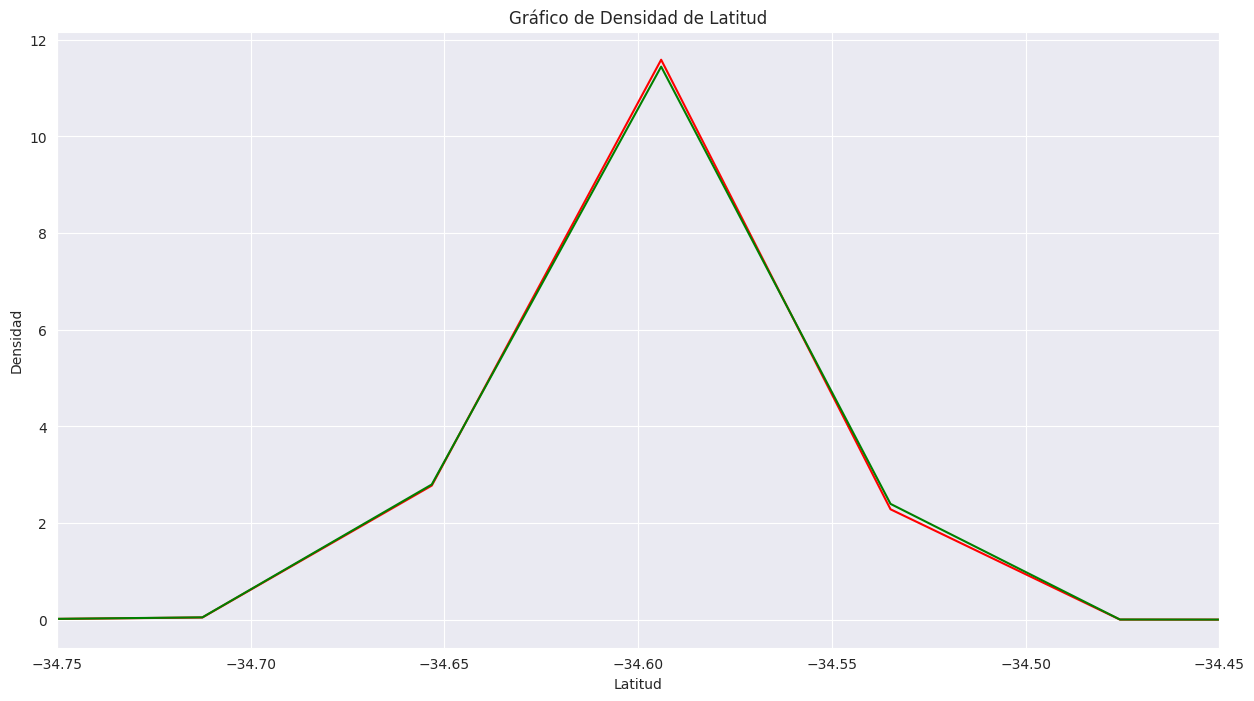

In [64]:
df_sin_reparacion.latitud.plot.density(color = "red")
grf = df.latitud.plot.density(color = "green", figsize=(15,8), xlim = (-34.75,-34.45)).set(xlabel="Latitud", ylabel="Densidad", title="Gráfico de Densidad de Latitud")

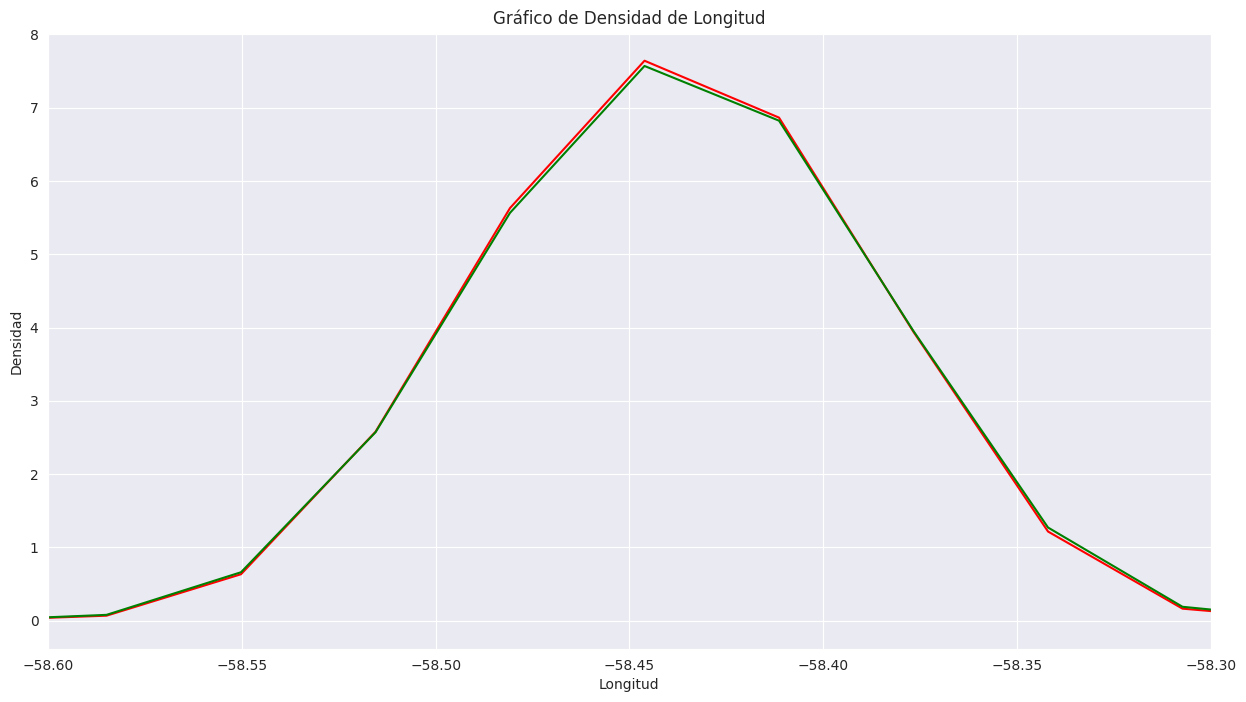

In [65]:
df_sin_reparacion.longitud.plot.density(color = "red")
grf = df.longitud.plot.density(color = "green", figsize=(15,8), xlim = (-58.6,-58.3)).set(xlabel="Longitud", ylabel="Densidad", title="Gráfico de Densidad de Longitud")

Tanto para las variables de `latitud` y `longitud`, el método que utilizamos fue el de reemplazar los valores faltantes por las medias correspondientes. Como podemos ver en los gráficos anteriores, estas variables tenían un pequeño porcentaje de datos ausentes, de modo que sus distribuciones no tienen cambios significativos a pesar de la imputación realizada.

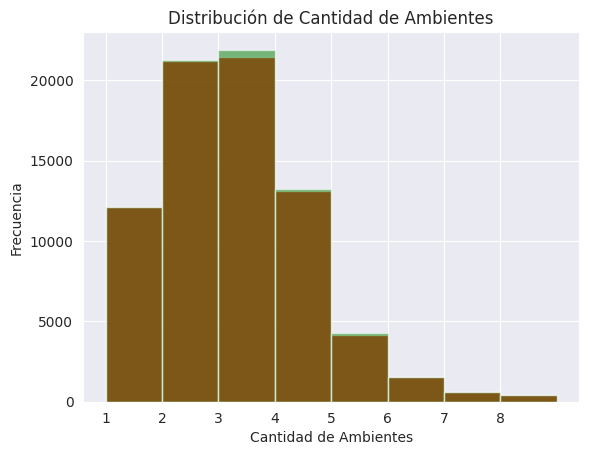

In [66]:
plt.hist(df_sin_reparacion.property_rooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_rooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Ambientes')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

Teniendo en cuenta que la proporción de valores faltantes en la variable `property_rooms` representa una cantidad significativa pero no de alto impacto sobre la totalidad del dataset, es esperable que al comparar los resultados obtenidos respecto de los iniciales no obtengamos una alta diferencia entre los mismos.

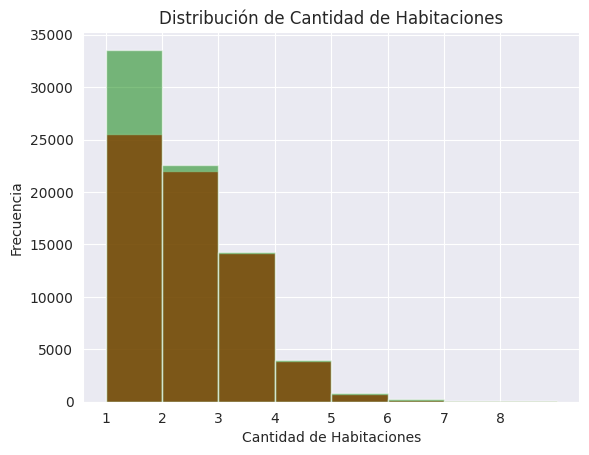

In [67]:
plt.hist(df_sin_reparacion.property_bedrooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_bedrooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Habitaciones')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

A diferencia del análisis previo, podemos observar que al aumentar la cantidad de datos faltantes para la variable `property_bedrooms` -respecto de `property_rooms`-, tenemos un mayor nivel de diferencia entre las distribuciones de la variable previa y posteriormente a la imputación realizada.

Finalmente, podemos verificar que la totalidad de datos faltantes sobre los datasets tanto de train como de test fue reparada:

In [68]:
df.isna().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                        0
place_l4                        0
place_l5                    75644
place_l6                    75644
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_price                  0
property_currency               0
property_title                  0
dtype: int64

In [69]:
test.isna().sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                        0
place_l4                        0
place_l5                    18605
place_l6                    18605
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_price                  0
property_currency               0
property_title                  0
dtype: int64

## **1c. Valores atípicos**

A continuación realizaremos un análisis sobre los valores atípicos presentes en el dataset.

Generamos una función de impresión de medidas del gráfico Box Plot para una columna:

In [70]:
def print_box_plot_medidas(df_c):
  Q1 = df_c.describe().get("25%")
  Q3 = df_c.describe().get("75%")

  print(f"El valor de Q1 es: {Q1}")
  print(f"El valor de Q3 es: {Q3}")

  IQR = Q3 - Q1

  out_inf = Q1 - 1.5 * IQR
  out_sup = Q3 + 1.5 * IQR

  print(f"El limite inferior del Q1 es: {out_inf}")
  print(f"El limite superior del Q3 es: {out_sup}")

### Análisis Univariado

---

#### Técnica Box Plot

Hagamos un gráfico de tipo box plot para visualizar los posibles valores atípicos de cada una de las variables presentes en el universo de datos numéricos:

##### Variable `start_date`

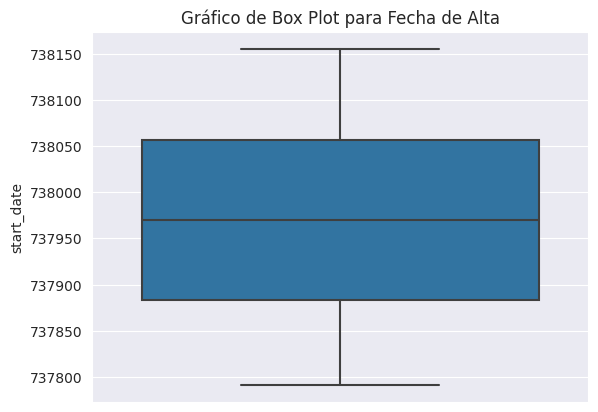

In [71]:
sns.boxplot(y=df.start_date)
plt.title("Gráfico de Box Plot para Fecha de Alta")
plt.show()

In [72]:
print(f"Medidas para Fecha de Alta:")

print_box_plot_medidas(df.start_date)

Medidas para Fecha de Alta:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Del gráfico podemos ver que no existen outliers para la variable en cuestión.

##### Variable `end_date`

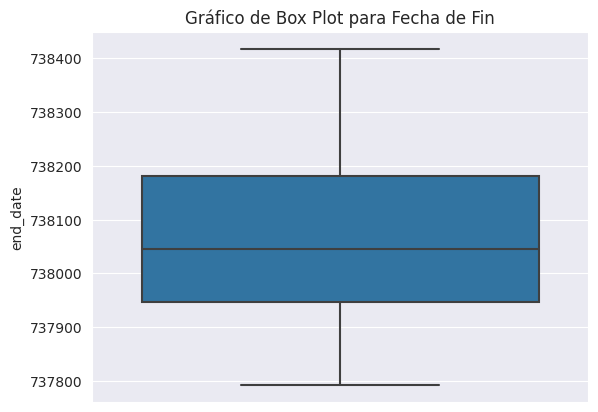

In [73]:
sns.boxplot(y=df.end_date)
plt.title("Gráfico de Box Plot para Fecha de Fin")
plt.show()

In [74]:
print(f"Medidas para Fecha de Fin:")

print_box_plot_medidas(df.end_date)

Medidas para Fecha de Fin:
El valor de Q1 es: 737946.0
El valor de Q3 es: 738182.0
El limite inferior del Q1 es: 737592.0
El limite superior del Q3 es: 738536.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `created_on`

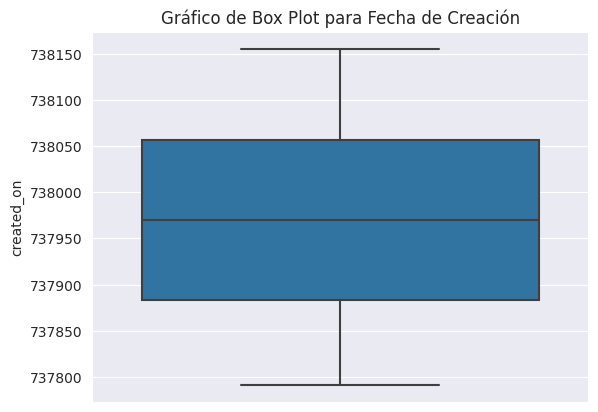

In [75]:
sns.boxplot(y=df.created_on)
plt.title("Gráfico de Box Plot para Fecha de Creación")
plt.show()

In [76]:
print(f"Medidas para Fecha de Creación:")

print_box_plot_medidas(df.created_on)

Medidas para Fecha de Creación:
El valor de Q1 es: 737883.0
El valor de Q3 es: 738057.0
El limite inferior del Q1 es: 737622.0
El limite superior del Q3 es: 738318.0


Nuevamente no observamos outliers por el método de Box Plot.

##### Variable `latitud`

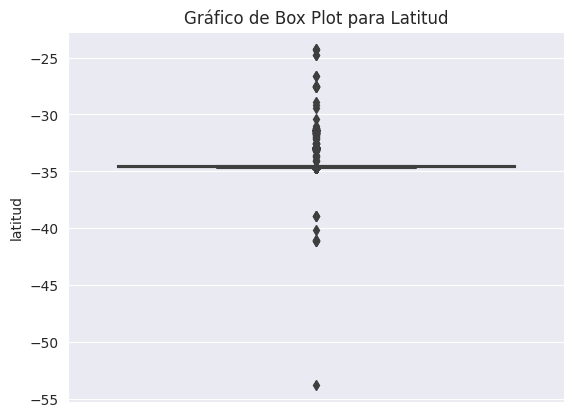

In [77]:
sns.boxplot(y=df.latitud)
plt.title("Gráfico de Box Plot para Latitud")
plt.show()

In [78]:
print(f"Medidas para Latitud:")

print_box_plot_medidas(df.latitud)

Medidas para Latitud:
El valor de Q1 es: -34.6155326
El valor de Q3 es: -34.5770878
El limite inferior del Q1 es: -34.673199800000006
El limite superior del Q3 es: -34.519420600000004


Si bien este gráfico no nos brinda mucha información, pues los valores límites inferior y superior son muy cercanos y eso nos da la pauta de que hay una gran variabilidad en los datos, podríamos pensar que es extraña la observación que se encuentra por debajo del valor -50. En esta línea, observemos el registro en cuestión:

In [79]:
df[df.latitud < -50]

id  start_date  end_date  created_on    latitud  \
457631  ZskNGaMaM9MxJ4seQfgjtg==      737918    738010      737918 -53.788624   

         longitud         place_l2         place_l3         place_l4  \
457631 -67.718089  Capital Federal  Capital Federal  Capital Federal   

        place_l5  place_l6 operation property_type  property_rooms  \
457631       NaN       NaN     Venta  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
457631                2.0                   121.0                     100.0   

        property_price property_currency                       property_title  
457631        375000.0               USD  Depto 3 ambientes Arboris Las Lomas

A priori no podríamos realizar una conclusión sólida, puesto que sería conveniente estudiar el resto de las variables en conjunto. Por ejemplo, verificar -utilizando el dato de longitud- si realmente pertenece a una coordenada correspondiente a la Capital Federal.

##### Variable `longitud`

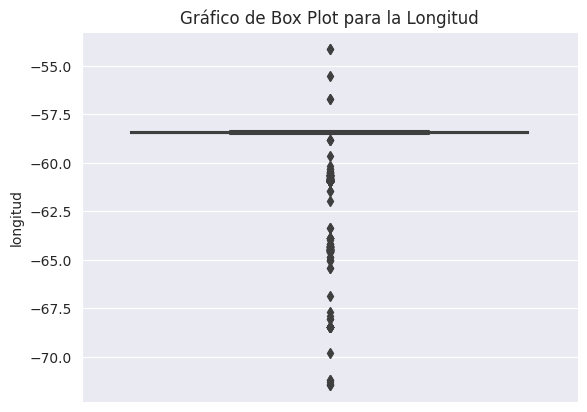

In [80]:
sns.boxplot(y=df.longitud)
plt.title("Gráfico de Box Plot para la Longitud")
plt.show()

In [81]:
print(f"Medidas para Longitud:")

print_box_plot_medidas(df.longitud)

Medidas para Longitud:
El valor de Q1 es: -58.466182
El valor de Q3 es: -58.40879845
El limite inferior del Q1 es: -58.552257325000014
El limite superior del Q3 es: -58.322723124999996


De igual forma que para el análisis previo, el gráfico y el resumen de las medidas para la variable en cuestión no nos brindan información acerca de valores atípicos reales ya que el rango intercuantil es pequeño. Con este análisis, no podríamos concluir que existen valores atípicos para la variable `longitud`.

##### Variable `property_rooms`

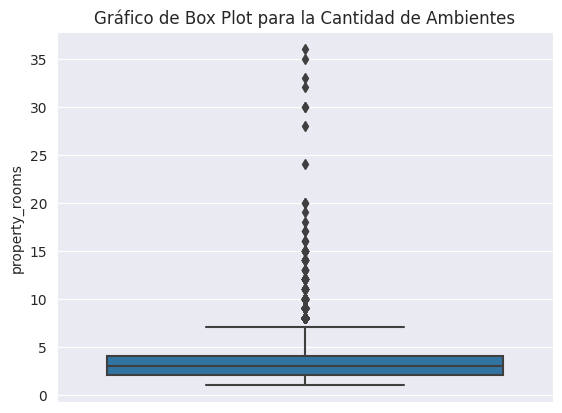

In [82]:
sns.boxplot(y=df.property_rooms)
plt.title("Gráfico de Box Plot para la Cantidad de Ambientes")
plt.show()

In [83]:
print(f"Medidas para Cantidad de Ambientes:")

print_box_plot_medidas(df.property_rooms)

Medidas para Cantidad de Ambientes:
El valor de Q1 es: 2.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: -1.0
El limite superior del Q3 es: 7.0


De analizar el gráfico y las medidas, podríamos pensar que una cantidad de ambientes mayor a 7 podría representar un outlier. Ahora bien, tengamos en cuenta que en nuestro universo de datos estamos analizando tanto Departamentos como Casas y PH de modo que no podríamos concluir con firmeza -en este primer análisis univariado- que todas las observaciones por encima de estos límites son valores atípicos.

##### Variable `property_bedrooms`



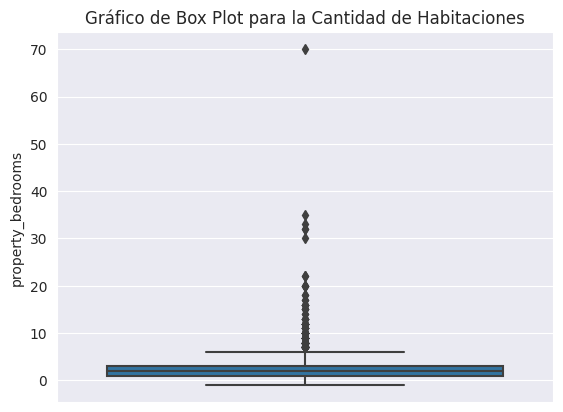

In [84]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

In [85]:
print(f"Medidas para Cantidad de Habitaciones:")

print_box_plot_medidas(df.property_bedrooms)

Medidas para Cantidad de Habitaciones:
El valor de Q1 es: 1.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: -2.0
El limite superior del Q3 es: 6.0


Particularmente para este gráfico, podríamos notar una masa de posibles outliers cerca del límite superior del box plot y una única observación alejada de la masa en cuestión.
Respecto de la masa de posibles valores atípicos, haríamos un razonamiento similar al que realizamos para la variable anterior: tendríamos que hacer un análisis multivariado para poder consolidar una conclusión.
Ahora bien, vale la pena estudiar la observación que supera el 60:

In [86]:
df[df.property_bedrooms > 60]

id  start_date  end_date  created_on    latitud  \
94998  4TbEkLoqy/0c3zakd66/FQ==      738057    738182      738057 -34.646632   

        longitud         place_l2    place_l3    place_l4  place_l5  place_l6  \
94998 -58.497902  Capital Federal  Villa Luro  Villa Luro       NaN       NaN   

      operation property_type  property_rooms  property_bedrooms  \
94998     Venta  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  \
94998                    70.0                      70.0        135000.0   

      property_currency             property_title  
94998               USD  Departamento - Villa Luro

Claramente estamos ante una situación de valor atípico, de modo que procedemos a eliminar el mismo:

In [87]:
df.drop(df[df.property_bedrooms > 60].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

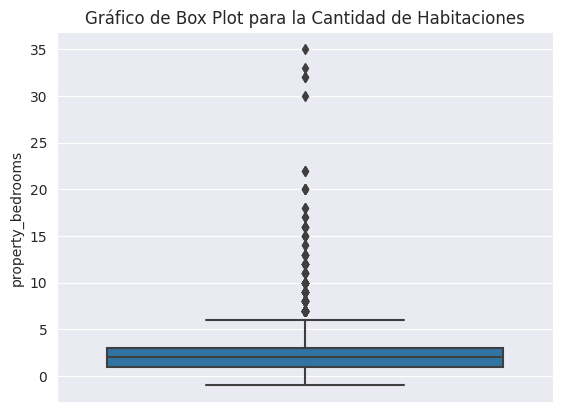

In [88]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

Estudiamos la presencia de valores nulos o negativos:

In [89]:
df[df.property_bedrooms <= 0]

id  start_date  end_date  created_on    latitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==      737797    737867      737797 -34.577595   

         longitud         place_l2       place_l3       place_l4  place_l5  \
406880 -58.495185  Capital Federal  Villa Urquiza  Villa Urquiza       NaN   

        place_l6 operation property_type  property_rooms  property_bedrooms  \
406880       NaN     Venta  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

       property_currency                                     property_title  
406880               USD  Jardines de Roosevelt - Hermoso 3 ambientes co...

Dado que no es posible la existencia del mismo, procedemos a corregir el outlier. En este caso, estaremos reemplazando el valor negativo por su equivalente absoluto:

In [90]:
df.property_bedrooms[df[df.property_bedrooms <= 0].index] = abs(df.property_bedrooms[df[df.property_bedrooms <= 0].index])

Nuevamente, realizamos el gráfico de Box Plot:

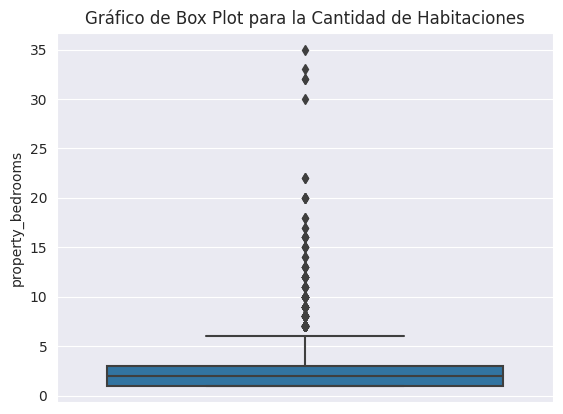

In [91]:
sns.boxplot(y=df.property_bedrooms)
plt.title("Gráfico de Box Plot para la Cantidad de Habitaciones")
plt.show()

##### Variable `property_surface_total`

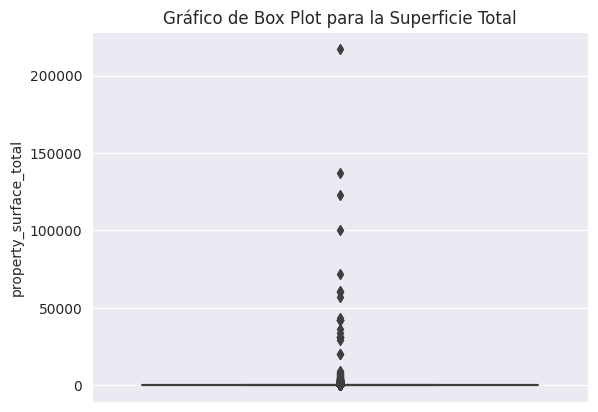

In [92]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

In [93]:
print(f"Medidas para Superficie Total:")

print_box_plot_medidas(df.property_surface_total)

Medidas para Superficie Total:
El valor de Q1 es: 45.0
El valor de Q3 es: 105.0
El limite inferior del Q1 es: -45.0
El limite superior del Q3 es: 195.0


De analizar el gráfico, podríamos pensar que los valores por encima del límite superior del box plot realmente pertenecerían a valores atípicos de la variable, ya que es extraño que un Departamento/Casa/PH tenga una superficie mayor a 20.000 m2. En esta línea, estudiemos dichos registros:

In [94]:
df[df.property_surface_total > 19500].head(5)

id  start_date  end_date  created_on    latitud  \
370917  OC6HYSBo/pqio5ZTLgoPvg==      737904    737946      737904 -34.571747   
352883  aBZBrjan1XqHjgvjHK6K6Q==      737966    737979      737966 -34.550093   
72316   BPTyNzwU2D4btCduu8ls3A==      737939    737949      737939 -34.578917   
372779  XzTb7kTEpmAKiyhEGSWz4A==      738026    738036      738026 -34.555278   
106598  +YPtNPAzbhoDCLgqF26Q8A==      737860    737900      737860 -34.587320   

         longitud         place_l2      place_l3      place_l4  place_l5  \
370917 -58.422612  Capital Federal       Palermo       Palermo       NaN   
352883 -58.483034  Capital Federal      Saavedra      Saavedra       NaN   
72316  -58.429373  Capital Federal       Palermo       Palermo       NaN   
372779 -58.459786  Capital Federal      Belgrano      Belgrano       NaN   
106598 -58.401556  Capital Federal  Barrio Norte  Barrio Norte       NaN   

        place_l6 operation property_type  property_rooms  property_bedrooms  \
370917       NaN     Venta  Departamento             4.0                3.0   
352883       NaN     Venta  Departamento             1.0                1.0   
72316        NaN     Venta  Departamento             2.0                1.0   
372779       NaN     Venta  Departamento             4.0                3.0   
106598       NaN     Venta  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
370917                 42110.0                     222.0       1910920.0   
352883                 29064.0                   29064.0         87400.0   
72316                  61130.0                   53030.0        225000.0   
372779                100068.0                  100051.0        420000.0   
106598                 56740.0                   52540.0        175000.0   

       property_currency                                     property_title  
370917               USD  Reventa - Departamento - Palermo Nuevo - Liber...  
352883               USD             VENTA MONOAMBIENTE SAAVEDRA A ESTRENAR  
72316                USD  VENTA DEPARTAMENTO 2 AMBIENTES PALERMO C/AMENI...  
372779               USD    VENTA PISO 4 AMBIENTES BELGRANO COCHERA BALCON   
106598               USD  EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG...

Veamos qué porcentaje representan dichos datos sobre el total:

In [95]:
pct = df[df.property_surface_total > 19500].shape[0] / df.property_surface_total.shape[0] * 100
print(f"Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un {round(pct,3)}% del total.")

Las propiedades en venta con una superficie total mayor a 19.500 m2 representan un 0.033% del total.


Dado que los valores atípicos detectados representan un índice bajo sobre el total de datos, procedemos a eliminarlos del dataset:

In [96]:
df.drop(df[df.property_surface_total > 19500].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

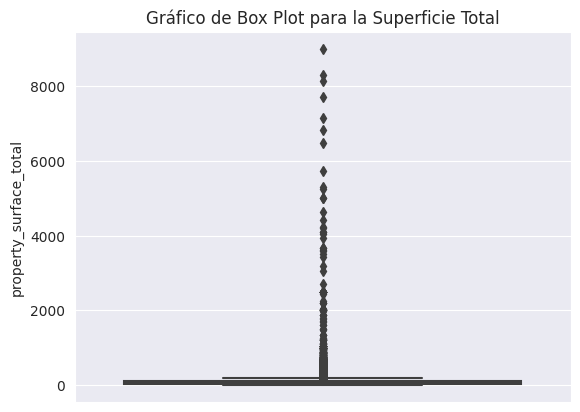

In [97]:
sns.boxplot(y=df.property_surface_total)
plt.title("Gráfico de Box Plot para la Superficie Total")
plt.show()

##### Variable `property_surface_covered`

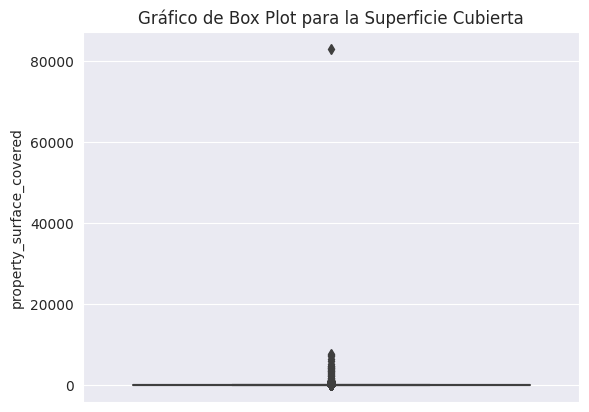

In [98]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

In [99]:
print(f"Medidas para Superficie Cubierta:")

print_box_plot_medidas(df.property_surface_covered)

Medidas para Superficie Cubierta:
El valor de Q1 es: 40.0
El valor de Q3 es: 89.0
El limite inferior del Q1 es: -33.5
El limite superior del Q3 es: 162.5


Nuevamente, visualizamos una masa de observaciones detectada como valores atípicos cercanas al límite superior del Box Plot y una única observación lejana. Estudiamos la misma:

In [100]:
df[df.property_surface_covered > 80000]

id  start_date  end_date  created_on    latitud  \
199905  EDZUWORq83zRgdk9Zqlv+A==      737996    738417      737996 -34.604362   

         longitud         place_l2      place_l3      place_l4  place_l5  \
199905 -58.392366  Capital Federal  Barrio Norte  Barrio Norte       NaN   

        place_l6 operation property_type  property_rooms  property_bedrooms  \
199905       NaN     Venta  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
199905                    83.0                   83000.0        155000.0   

       property_currency                       property_title  
199905               USD  AMPLIO DEPTO  EN VENTA BARRIO NORTE

Procedemos a eliminar dicha observación puesto que corresponde en su totalidad a un valor atípico:

In [101]:
df.drop(df[df.property_surface_covered > 80000].index, inplace=True)

Nuevamente, realizamos el gráfico de Box Plot:

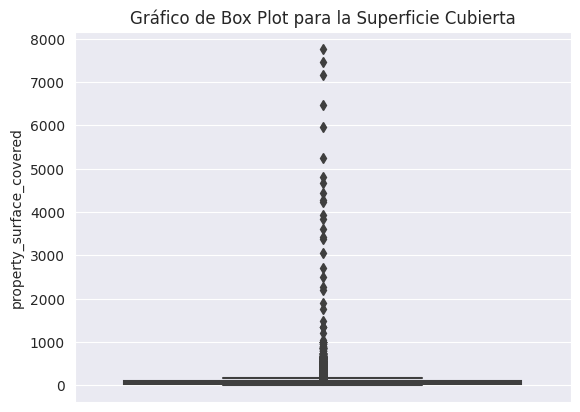

In [102]:
sns.boxplot(y=df.property_surface_covered)
plt.title("Gráfico de Box Plot para la Superficie Cubierta")
plt.show()

#### Técnica Z Score

Para seguir con el análisis, evaluamos si las variables cumplen con la regla de oro |Z| > 3. Tomamos la convención de eliminar del dataset todos los valores detectados como atípicos, según el método, que representen un porcentaje menor al 1% del total de datos ya que decidimos que este porcentaje de datos eliminados no representará un fuerte impacto en el conjunto de datos resultante.

##### Variable `start_date`

In [103]:
z_score = (df.start_date - np.mean(df.start_date)) / np.std(df.start_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Como notamos anteriormente, no se observan registros de valores atípicos dentro de esta variable.

##### Variable `end_date`

In [104]:
z_score = (df.end_date - np.mean(df.end_date)) / np.std(df.end_date)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Confirmamos nuevamente que para end_date no se registran valores atípicos.

##### Variable `created_on`

In [105]:
z_score = (df.created_on - np.mean(df.created_on)) / np.std(df.created_on)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Concluimos que `created_on` tampoco presenta observaciones atípicas.

##### Variable `latitud`

In [106]:
z_score = (df.latitud - np.mean(df.latitud)) / np.std(df.latitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 291 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 10 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [107]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.385% del total de los datos.


In [108]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.013% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [109]:
df.drop(df[z_score > 3].index, inplace=True)

In [110]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `longitud`

In [111]:
z_score = (df.longitud - np.mean(df.longitud)) / np.std(df.longitud)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 3 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [112]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [113]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.004% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [114]:
df.drop(df[z_score > 3].index, inplace=True)

In [115]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_rooms`

In [116]:
z_score = (df.property_rooms - np.mean(df.property_rooms)) / np.std(df.property_rooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 626 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [117]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.831% del total de los datos.


In [118]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [119]:
df.drop(df[z_score > 3].index, inplace=True)

In [120]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_bedrooms`

In [121]:
z_score = (df.property_bedrooms - np.mean(df.property_bedrooms)) / np.std(df.property_bedrooms)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 785 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [122]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 1.051% del total de los datos.


In [123]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Notemos que, respecto de las variables que venimos estudiando en la sección actual, es alta la cantidad de valores atípicos detectados por la técnica de Z Score para la variable `property_bedrooms`. En esta línea, estudiamos en detalle los outliers encontrados:

In [124]:
sorted(df[z_score > 3].property_bedrooms.unique())

[5.0, 6.0, 7.0, 8.0, 11.0, 20.0, 22.0, 30.0, 32.0]

A pesar de que nos resulta extraño que existan propiedades con una cantidad de habitaciones mayor a 20, es importante destacar nuevamente que sería más certero consolidar un conclusión luego de un análisis multivariado para esta variable puesto a la alta relevancia que tiene el tipo de propiedad sobre la misma.
En esta línea, no eliminaremos las observaciones que se alejen 3 desvíos de la media.

##### Variable `property_surface_total`

In [125]:
z_score = (df.property_surface_total - np.mean(df.property_surface_total)) / np.std(df.property_surface_total)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 394 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [126]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 0.528% del total de los datos.


In [127]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Nuevamente, dado al bajo porcentaje que representan los valores atípicos detectados sobre el total de datos, procedemos a eliminarlos:

In [128]:
df.drop(df[z_score > 3].index, inplace=True)

In [129]:
df.drop(df[z_score < -3].index, inplace=True)

##### Variable `property_surface_covered`

In [130]:
z_score = (df.property_surface_covered - np.mean(df.property_surface_covered)) / np.std(df.property_surface_covered)

print(f"Existen {df[z_score > 3].shape[0]} observaciones con más de 3 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score < -3].shape[0]} observaciones con más de 3 desvíos de la media hacia la izquierda.")

Existen 1544 observaciones con más de 3 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [131]:
pct = df[z_score > 3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la derecha representan un 2.078% del total de los datos.


In [132]:
pct = df[z_score < -3].shape[0] / z_score.shape[0] * 100

print(f"Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

#### Técnica Z Score Modificado

Finalmente, evaluamos si las variables cumplen con la regla de oro |Z| > 3,5. Nuevamente estaremos utilizando la convención de eliminar aquellos valores detectados como atípicos que no representen más del 1% del total de los datos.

Puesto que con ninguno de los dos metodos anteriores no se registraron valores atípicos tanto para `start_date`, `end_date` y `created_on`, se omitiran del proximo análisis.

##### Variable `latitud`

In [133]:
z_score_m = (df.latitud - np.median(df.latitud))*0.6745 / np.median(np.absolute(df.latitud - np.median(df.latitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 5 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [134]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.0% del total de los datos.


In [135]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.007% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [136]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [137]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

##### Variable `longitud`

In [138]:
z_score_m = (df.longitud - np.median(df.longitud))*0.6745 / np.median(np.absolute(df.longitud - np.median(df.longitud)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

##### Variable `property_rooms`

In [139]:
z_score_m = (df.property_rooms - np.median(df.property_rooms))*0.6745 / np.median(np.absolute(df.property_rooms - np.median(df.property_rooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 0 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


No existen outliers a eliminar en el dataset de trabajo según el método en cuestión.

##### Variable `property_bedrooms`

In [140]:
z_score_m = (df.property_bedrooms - np.median(df.property_bedrooms))*0.6745 / np.median(np.absolute(df.property_bedrooms - np.median(df.property_bedrooms)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 13 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [141]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 0.017% del total de los datos.


In [142]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Dado que las observaciones identificadas como outliers según el método de Z Score representan una ínfima porción del set de datos, procedemos a eliminar dichos valores:

In [143]:
df.drop(df[z_score_m > 3.5].index, inplace=True)

In [144]:
df.drop(df[z_score_m < -3.5].index, inplace=True)

##### Variable `property_surface_total`

In [145]:
z_score_m = (df.property_surface_total - np.median(df.property_surface_total))*0.6745 / np.median(np.absolute(df.property_surface_total - np.median(df.property_surface_total)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5652 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [146]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.61% del total de los datos.


In [147]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

##### Variable `property_surface_covered`

In [148]:
z_score_m = (df.property_surface_covered - np.median(df.property_surface_covered))*0.6745 / np.median(np.absolute(df.property_surface_covered - np.median(df.property_surface_covered)))

print(f"Existen {df[z_score_m > 3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la derecha.")
print(f"Existen {df[z_score_m < -3.5].shape[0]} observaciones con más de 3.5 desvíos de la media hacia la izquierda.")

Existen 5434 observaciones con más de 3.5 desvíos de la media hacia la derecha.
Existen 0 observaciones con más de 3.5 desvíos de la media hacia la izquierda.


Analizamos qué porcentaje representan estas observaciones sobre el total de datos:

In [149]:
pct = df[z_score_m > 3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la derecha representan un 7.316% del total de los datos.


In [150]:
pct = df[z_score_m < -3.5].shape[0] / z_score_m.shape[0] * 100

print(f"Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un {round(pct,3)}% del total de los datos.")

Las observaciones que se alejan más de 3.5 desvíos de la media hacia la izquierda representan un 0.0% del total de los datos.


Debido al alto porcentaje de datos detectados como valores atípicos, decidimos no eliminar los mismos del dataset.

### Análisis Multivariado

---

##### Técnica Box Plot - Tipo de Propiedad

A continuación estaremos realizando un análisis multivariado de las variables numéricas del dataset de acuerdo al tipo de propiedad al cual corresponda cada una.

Separo los datasets para utilizar en el estudio:

In [151]:
df_depto = df[df.property_type == 'Departamento']
df_casa = df[df.property_type == 'Casa']
df_ph = df[df.property_type == 'PH']

###### Variable `latitud`

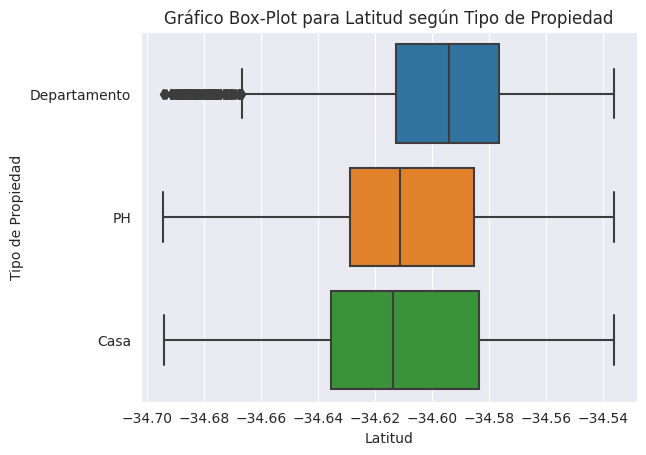

In [152]:
sns.boxplot(data=df, x="latitud", y="property_type")
plt.title('Gráfico Box-Plot para Latitud según Tipo de Propiedad')
plt.xlabel('Latitud')
plt.ylabel('Tipo de Propiedad')
plt.show()

Notemos que no existen outliers detectados para PH y Casa, de modo que procedemos a analizar únicamente los Departamentos.

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [153]:
print(f"Medidas para Latitud para Departamento:")

print_box_plot_medidas(df_depto.latitud)

Medidas para Latitud para Departamento:
El valor de Q1 es: -34.6125
El valor de Q3 es: -34.576380475
El limite inferior del Q1 es: -34.66667928749999
El limite superior del Q3 es: -34.5222011875


Veamos que la masa de observaciones detectadas como atípicas se encuentran consolidadas en un único grupo, de modo que no podríamos concluir que sean realmente valores atípicos.

###### Variable `longitud`

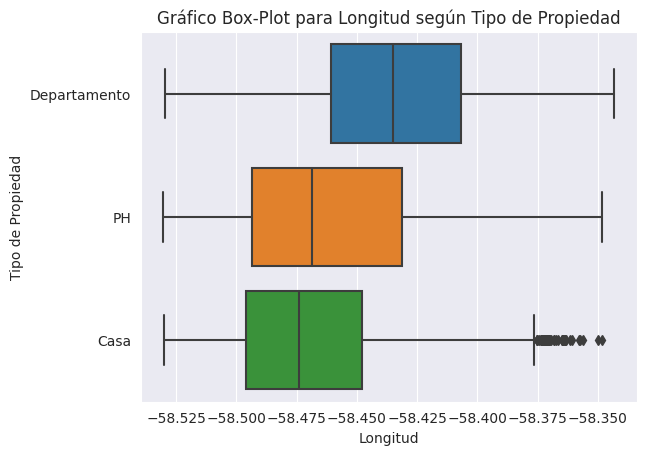

In [154]:
sns.boxplot(data=df, x="longitud", y="property_type")
plt.title('Gráfico Box-Plot para Longitud según Tipo de Propiedad')
plt.xlabel('Longitud')
plt.ylabel('Tipo de Propiedad')
plt.show()

Notemos que no existen outliers detectados para Departamento y PH, de modo que procedemos a analizar únicamente Casas.

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Casa**

Visualizamos únicamente el Box Plot para Casa:

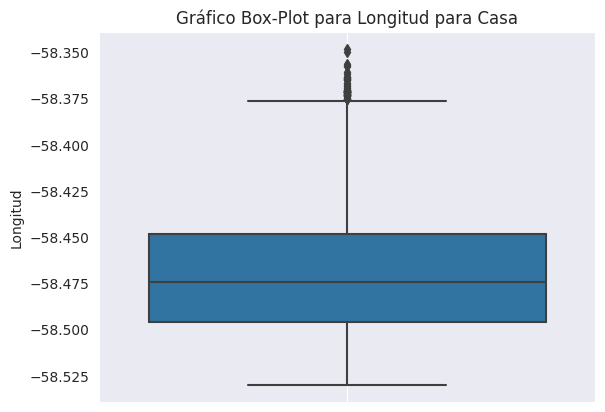

In [155]:
sns.boxplot(data=df_casa, y="longitud")
plt.title('Gráfico Box-Plot para Longitud para Casa')
plt.ylabel('Longitud')
plt.grid()
plt.show()

In [156]:
print(f"Medidas para Longitud para casa:")

print_box_plot_medidas(df_casa.longitud)

Medidas para Longitud para casa:
El valor de Q1 es: -58.496175
El valor de Q3 es: -58.4480496
El limite inferior del Q1 es: -58.568363100000006
El limite superior del Q3 es: -58.37586149999999


No podemos concluir que las observaciones detectadas sean outliers efectivamente puesto que se encuentran en agrupadas en un conjunto único de valores concentrados.

###### Variable `property_rooms`

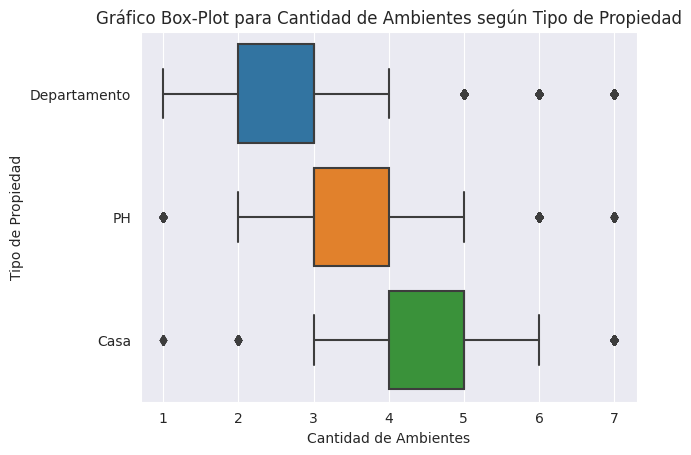

In [157]:
sns.boxplot(data=df, x="property_rooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Ambientes según Tipo de Propiedad')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [158]:
print(f"Medidas para Cantidad de Ambientes para Departamento:")

print_box_plot_medidas(df_depto.property_rooms)

Medidas para Cantidad de Ambientes para Departamento:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [159]:
df_depto[df_depto.property_rooms > 4.5].shape[0]

3601

Analicemos qué porcentaje representan sobre el total de datos:

In [160]:
pct = df_depto[df_depto.property_rooms > 4.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 5.607% de los datos.


Debido al alto porcentaje de datos que representan, decidimos postergar la decisión del tratamiento de los mismos mediante un método que nos permita estudiar qué tipo de relación tiene la variable `property_rooms` con otras que puedan llegar a dar más información respecto al espacio disponible en la propiedad, como pueden ser `property_surface_total` o `property_surface_covered`.

**Casa**

In [161]:
print(f"Medidas para Cantidad de Ambientes para Casa:")

print_box_plot_medidas(df_casa.property_rooms)

Medidas para Cantidad de Ambientes para Casa:
El valor de Q1 es: 4.0
El valor de Q3 es: 5.0
El limite inferior del Q1 es: 2.5
El limite superior del Q3 es: 6.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [162]:
df_casa[df_casa.property_rooms > 6.5].shape[0]

173

Analicemos qué porcentaje representan sobre el total de datos:

In [163]:
pct = df_casa[df_casa.property_rooms > 6.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 6.284% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [164]:
df_casa[df_casa.property_rooms < 2.5].shape[0]

42

Analicemos qué porcentaje representan sobre el total de datos:

In [165]:
pct = df_casa[df_casa.property_rooms < 2.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.526% de los datos.


Nuevamente, debido al alto porcentaje que representan los outliers sobre el set de datos postergamos su tratamiento para comparar la variable con `property_surface_total` y `property_surface_covered`.

**PH**

In [166]:
print(f"Medidas para Cantidad de Ambientes para PH:")

print_box_plot_medidas(df_ph.property_rooms)

Medidas para Cantidad de Ambientes para PH:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [167]:
df_ph[df_ph.property_rooms > 5.5].shape[0]

298

Analicemos qué porcentaje representan sobre el total de datos:

In [168]:
pct = df_ph[df_ph.property_rooms > 5.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.086% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [169]:
df_ph[df_ph.property_rooms < 1.5].shape[0]

147

Analicemos qué porcentaje representan sobre el total de datos:

In [170]:
pct = df_ph[df_ph.property_rooms < 1.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.015% de los datos.


Nuevamente, postergamos el tratamiento de los outliers para comparar la variable con `property_surface_total` y `property_surface_covered`.

###### Variable `property_bedrooms`

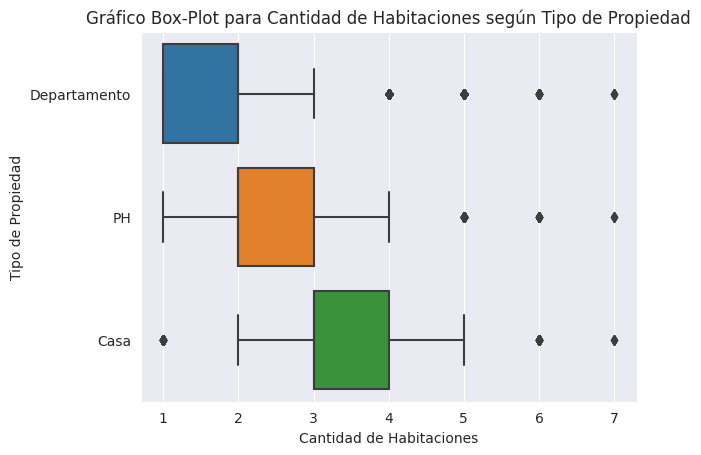

In [171]:
sns.boxplot(data=df, x="property_bedrooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Habitaciones según Tipo de Propiedad')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Tipo de Propiedad')
plt.show()

A continuacion volcamos y estudiamos los resultados que muestra el boxplot:

**Departamento**

In [172]:
print(f"Medidas para Cantidad de Habitaciones para Departamento:")

print_box_plot_medidas(df_depto.property_bedrooms)

Medidas para Cantidad de Habitaciones para Departamento:
El valor de Q1 es: 1.0
El valor de Q3 es: 2.0
El limite inferior del Q1 es: -0.5
El limite superior del Q3 es: 3.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [173]:
df_depto[df_depto.property_bedrooms > 3.5].shape[0]

2499

Analicemos qué porcentaje representan sobre el total de datos:

In [174]:
pct = df_depto[df_depto.property_bedrooms > 3.5].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 3.891% de los datos.


Siguiendo con el razonamiento realizado para el tratamiento de la variable `property_rooms`, postergamos el análisis de los outliers detectados para visualizar cómo se comporta la misma en relación a variables de superficie.

**Casa**

In [175]:
print(f"Medidas para Cantidad de Habitaciones para Casa:")

print_box_plot_medidas(df_casa.property_bedrooms)

Medidas para Cantidad de Habitaciones para Casa:
El valor de Q1 es: 3.0
El valor de Q3 es: 4.0
El limite inferior del Q1 es: 1.5
El limite superior del Q3 es: 5.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [176]:
df_casa[df_casa.property_bedrooms > 5.5].shape[0]

48

Analicemos qué porcentaje representan sobre el total de datos:

In [177]:
pct = df_casa[df_casa.property_bedrooms > 5.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.744% de los datos.


Veamos los valores atípicos que superan el límite inferior del primer cuartil:

In [178]:
df_casa[df_casa.property_bedrooms < 1.5].shape[0]

57

Analicemos qué porcentaje representan sobre el total de datos:

In [179]:
pct = df_casa[df_casa.property_bedrooms < 1.5].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.07% de los datos.


Nuevamente postergamos la reparacion para un análisis mas profundo.

**PH**

In [180]:
print(f"Medidas para Cantidad de Habitaciones para PH:")

print_box_plot_medidas(df_ph.property_bedrooms)

Medidas para Cantidad de Habitaciones para PH:
El valor de Q1 es: 2.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: 0.5
El limite superior del Q3 es: 4.5


Veamos los valores atípicos que superan el límite superior del tercer cuartil:

In [181]:
df_ph[df_ph.property_bedrooms > 4.5].shape[0]

124

Analicemos qué porcentaje representan sobre el total de datos:

In [182]:
pct = df_ph[df_ph.property_bedrooms > 4.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 1.7% de los datos.


Nuevamente, postergamos el análisis.

###### Variable `property_surface_total`

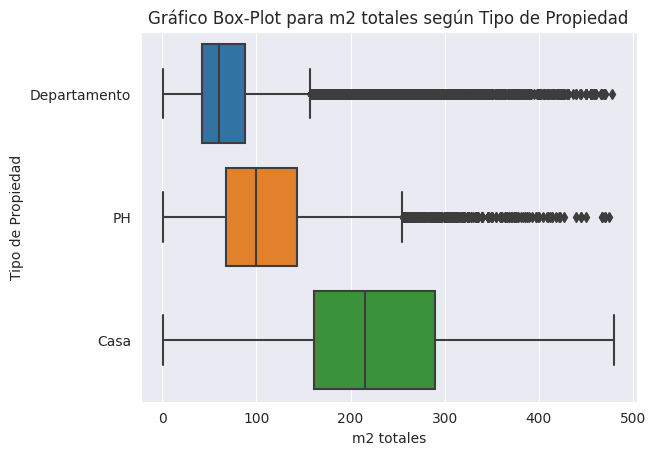

In [183]:
sns.boxplot(data=df, x="property_surface_total", y="property_type")
plt.title('Gráfico Box-Plot para m2 totales según Tipo de Propiedad')
plt.xlabel('m2 totales')
plt.ylabel('Tipo de Propiedad')
plt.show()

Como se puede apreciar, en la variable property_surface_total tenemos una muy alta cantidad de valores que sobrepasan el límite superior del tercer cuartil, tanto para el tipo de propiedad Departamento, como para PH.

**Departamento**

In [184]:
print(f"Medidas para m2 totales para Departamento:")

print_box_plot_medidas(df_depto.property_surface_total)

Medidas para m2 totales para Departamento:
El valor de Q1 es: 42.0
El valor de Q3 es: 88.0
El limite inferior del Q1 es: -27.0
El limite superior del Q3 es: 157.0


Notemos los valores superadores al limite del tercer cuartil

In [185]:
df_depto[df_depto.property_surface_total > 157].shape[0]

4840

Y el porcentaje que representan sobre el total

In [186]:
pct = df_depto[df_depto.property_surface_total > 157].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 7.536% de los datos.


Como se puede apreciar el el grafico, no contamos con la presencia de valores que sean menores al limite inferior del Q1.

**Casa**

In [187]:
print(f"Medidas para m2 totales para Casa:")

print_box_plot_medidas(df_casa.property_surface_total)

Medidas para m2 totales para Casa:
El valor de Q1 es: 161.0
El valor de Q3 es: 290.0
El limite inferior del Q1 es: -32.5
El limite superior del Q3 es: 483.5


Tanto para la medida limite del Q1, como para la del Q3, no se detectan en el grafico valores que no cumplan con estar por fuera de los limites que establecen.

**PH**

In [188]:
print(f"Medidas para m2 totales para PH:")

print_box_plot_medidas(df_ph.property_surface_total)

Medidas para m2 totales para PH:
El valor de Q1 es: 68.0
El valor de Q3 es: 143.0
El limite inferior del Q1 es: -44.5
El limite superior del Q3 es: 255.5


In [189]:
df_ph[df_ph.property_surface_total > 255].shape[0]

292

In [190]:
pct = df_ph[df_ph.property_surface_total > 255].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.003% de los datos.


Al igual que sucede con la variable departamento, si bien se ve claramente una gran masa de valores que no son esperados debido a que se encuentran una vez mas por encima del limite, teniendo en cuenta la tan fuerte presencia de estos, consideramos que el metodo utilizado en este analisis no es suficiente para poder llegar a una caracterizacion solida. No podemos afirmar que todos estos valores son atipicos. 

Puntualmente en esta variable vemos muy importante el realizar un estudio mas exhaustivo utilizando otro metodo y variable a correlacionar.

Una vez mas se puede apreciar la importancia de subdividir de acuerdo con el tipo de propiedad, ya que las medidas obtenidas para cada uno de estos son notablemente diferentes.

###### Variable `property_surface_covered`

A continuacion estudiaremos el grafico de Box-Plot para la ultima variable a analizar.

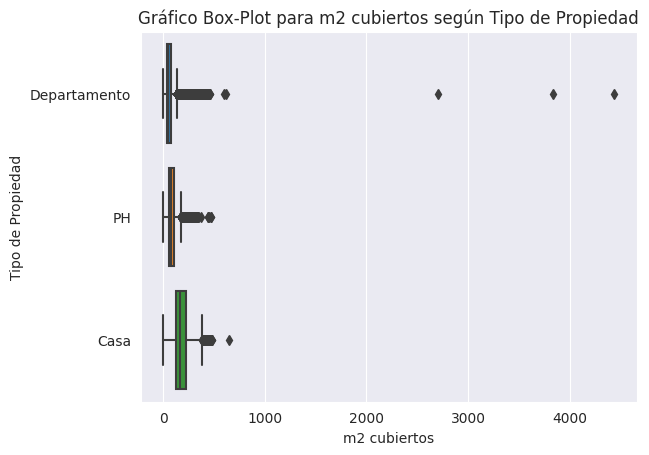

In [191]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

**Casa**

In [192]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


Contabilizando las observaciones correspondientes superadoras al limite superior de Q3 obtenemos

In [193]:
df_casa[df_casa.property_surface_covered > 383].shape[0]

64

Las cuales representan un porcentaje de

In [194]:
pct = df_casa[df_casa.property_surface_covered > 383].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 2.325% de los datos.


Dado que el porcentaje de ambos extremos supera el limite que establecimos inicialmente como condicion, los dejamos para continuar su analisis.

**PH**

In [195]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


Contabilizando nuevamente obtenemos la siguiente cantidad

In [196]:
df_ph[df_ph.property_surface_covered > 177.5].shape[0]

307

La cual representa

In [197]:
pct = df_ph[df_ph.property_surface_covered > 177.5].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 4.209% de los datos.


Dado que representan un porcentaje significativo, postergamos la limpieza.

**Departamento**

In [198]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


A diferencia de los graficos previos, en esta variable en particular se puede apreciar tres valores puntualmente alejados del resto de la masa.

In [199]:
df_depto[df_depto.property_surface_covered > 1000]

id  start_date  end_date  created_on    latitud  \
30359   rpeGyTLDvloNDFf/CSF6Aw==      738078    738182      738078 -34.620935   
438160  mzH1lMHi7l9z9MTU0eMRVg==      738090    738159      738090 -34.630704   
354376  oSruKb4+uOYztGpv3h5FKA==      738098    738182      738098 -34.579394   

         longitud         place_l2          place_l3          place_l4  \
30359  -58.374850  Capital Federal         San Telmo         San Telmo   
438160 -58.400901  Capital Federal  Parque Patricios  Parque Patricios   
354376 -58.453519  Capital Federal        Colegiales        Colegiales   

        place_l5  place_l6 operation property_type  property_rooms  \
30359        NaN       NaN     Venta  Departamento             2.0   
438160       NaN       NaN     Venta  Departamento             1.0   
354376       NaN       NaN     Venta  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
30359                 1.0                    48.0                    4435.0   
438160                1.0                    31.0                    2700.0   
354376                2.0                    41.0                    3837.0   

        property_price property_currency  \
30359          93500.0               USD   
438160         71500.0               USD   
354376         83000.0               USD   

                                           property_title  
30359              Dptos 2 amb a estrenar en San Telmo!!!  
438160  DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES,  B...  
354376                          Departamento - Colegiales

Determinamos esta como una razon suficiente para eliminarlos del dataset, y procedemos a corregirlo en nuestro dataset de train.

In [200]:
df_depto.drop(df[df.property_surface_covered > 1000].index, inplace=True)
df.drop(df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')].index, inplace=True)

Validamos que se hayan aplicado los cambios.

In [201]:
df_depto.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title]
Index: []

In [202]:
df.loc[(df.property_surface_covered > 1000) & (df.property_type == 'Departamento')]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title]
Index: []

A continuacion volveremos a hacer un analisis sobre el grafico Box-Plot para estudiar como cambio su comportamiento

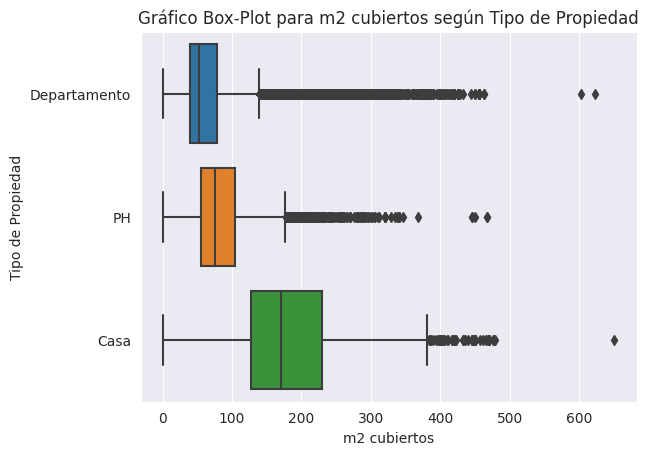

In [203]:
sns.boxplot(data=df, x="property_surface_covered", y="property_type")
plt.title('Gráfico Box-Plot para m2 cubiertos según Tipo de Propiedad')
plt.xlabel('m2 cubiertos')
plt.ylabel('Tipo de Propiedad')
plt.show()

Las medidas obtenidas fueron las siguientes:

In [204]:
print(f"Medidas para m2 cubiertos para Departamento:")

print_box_plot_medidas(df_depto.property_surface_covered)

Medidas para m2 cubiertos para Departamento:
El valor de Q1 es: 39.0
El valor de Q3 es: 79.0
El limite inferior del Q1 es: -21.0
El limite superior del Q3 es: 139.0


In [205]:
print(f"Medidas para m2 cubiertos para Casa:")

print_box_plot_medidas(df_casa.property_surface_covered)

Medidas para m2 cubiertos para Casa:
El valor de Q1 es: 128.0
El valor de Q3 es: 230.0
El limite inferior del Q1 es: -25.0
El limite superior del Q3 es: 383.0


In [206]:
print(f"Medidas para m2 cubiertos para PH:")

print_box_plot_medidas(df_ph.property_surface_covered)

Medidas para m2 cubiertos para PH:
El valor de Q1 es: 55.0
El valor de Q3 es: 104.0
El limite inferior del Q1 es: -18.5
El limite superior del Q3 es: 177.5


Como era de esperarse, obtuvimos registros mayores al limite superior en cada uno de los casos. Si bien nuevamente contamos con algunos valores que estan definidamente separados de los demas, esta vez no resultan alejados por una distancia tan significativa como los anteriores.

Los notamos como posibles candidatos a ser outliers, para confirmar luego de un analisis mas profundo.

##### Técnica Mahalanobis

Para continuar el análisis multivariado de outliers estaremos utilizando el método de Mahalanobis el cual nos brinda información respecto de la distancia de las observaciones agrupando las similares en clusters, evidenciando así los puntos aislados que pasaremos a considerar como valores atípicos. Para ello, realizaremos un scatter plot para cada par de variables de interés:

###### property_rooms vs property_surface_total

Realizamos un análisis multivariado entre las variables `property_rooms` y `property_surface_total` agrupando por tipo de propiedad. La idea es estudiar la relación entre la cantidad de ambientes y la superficie total tanto cubierta como descubierta de una propiedad debido a que nos resulta más razonable -ante la comparación contra `property_surface_covered`- pues queremos tener en consideración cuartos que podrían encontrarse al descubierto (ej: lavaderos, quinchos, garage, etc.).

**Departamento**

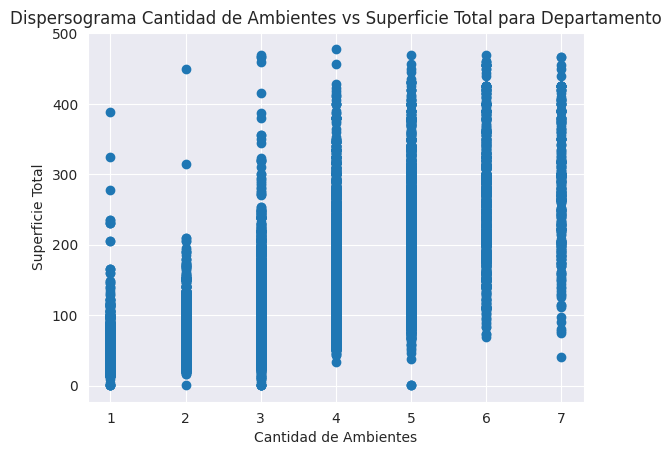

In [207]:
plt.scatter(df_depto.property_rooms, df_depto.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Como podemos apreciar en el dispersograma que obtuvimos arriba, tenemos algunas pocas observaciones que se encuentran aisladas de la concentracion principal. En particular, las que se corresponden a una pequeña cantidad de ambientes pero en una amplia superficie. Si bien esto es algo que es posible, no es del todo esperado. 

Procedemos a analizarlos en detalle utilizando la distancia de Mahalanobis.

In [208]:
X = df_depto[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_depto['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_depto.head()

id  start_date  end_date  created_on    latitud  \
92828   1gMQ4rXcpnPs+hhvW11Jdw==      738005    738091      738005 -34.622385   
19975   p7gmyqzdOy/+odHwH5oPyg==      737817    737946      737817 -34.618084   
266756  ZYkS+4dCz1vUENzAREcX9w==      738035    738035      738035 -34.601159   
454638  UL/s8zoicLDXXwhaelBgFQ==      738140    738195      738140 -34.605542   
409114  wnz+hkCE7RVBNcqDQEtFSw==      737868    737946      737868 -34.593266   

         longitud         place_l2       place_l3       place_l4  place_l5  \
92828  -58.448886  Capital Federal      Caballito      Caballito       NaN   
19975  -58.359912  Capital Federal  Puerto Madero  Puerto Madero       NaN   
266756 -58.398106  Capital Federal      Balvanera      Balvanera       NaN   
454638 -58.390007  Capital Federal    San Nicolás    San Nicolás       NaN   
409114 -58.381426  Capital Federal         Retiro         Retiro       NaN   

        ...  operation property_type property_rooms  property_bedrooms  \
92828   ...      Venta  Departamento            4.0                3.0   
19975   ...      Venta  Departamento            2.0                1.0   
266756  ...      Venta  Departamento            1.0                1.0   
454638  ...      Venta  Departamento            1.0                1.0   
409114  ...      Venta  Departamento            1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
92828                    113.0                      97.0        288000.0   
19975                     70.0                      65.0        450000.0   
266756                    33.0                      30.0         77243.0   
454638                    30.0                      30.0         65000.0   
409114                    40.0                      40.0         79000.0   

        property_currency                                     property_title  \
92828                 USD  Vta. Dpto. 4amb, Caballito, balcón aterrazado ...   
19975                 USD          Departamento con Cochera en Puerto Madero   
266756                USD     VENTA MONOAMBIENTE  BALVANERA  ZONA FACULTADES   
454638                USD  DEPTO 1 AMBIENTE Y MEDIO C/ COCHERA - SAN NICOLAS   
409114                USD                              Departamento - Retiro   

       mahal_ro_st  
92828     1.408935  
19975     0.469155  
266756    2.022643  
454638    1.962566  
409114    2.217379  

[5 rows x 21 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

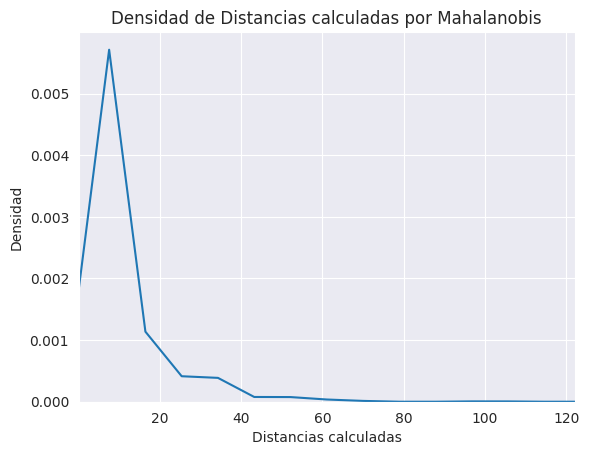

In [209]:
dis = round(df_depto.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

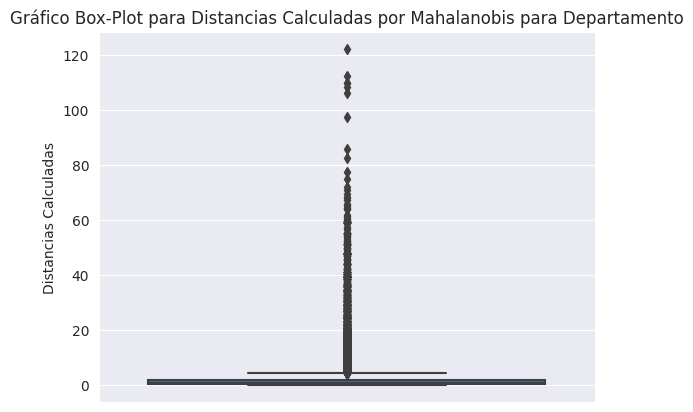

In [210]:
sns.boxplot(data=df_depto, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Departamento')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 80 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

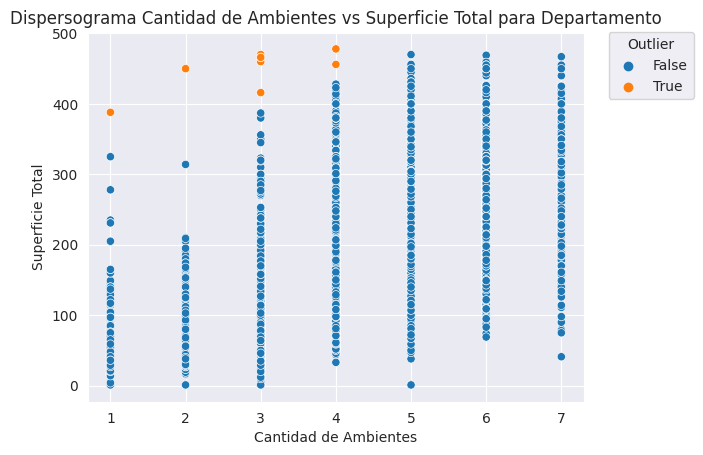

In [211]:
umbral=80
df_depto[df_depto['mahal_ro_st']>umbral]

es_outlier = (df_depto['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_depto.property_rooms,y=df_depto.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Evaluamos el porcentaje que representan en el total de las mediciones

In [212]:
pct = df_depto[df_depto['mahal_ro_st']>umbral].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.014% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [213]:
out_indixes = df_depto[df_depto['mahal_ro_st']>umbral].index

In [214]:
df.drop(out_indixes, inplace=True)
df_depto.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [215]:
df_depto[df_depto['mahal_ro_st'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st]
Index: []

[0 rows x 21 columns]

**Casa**

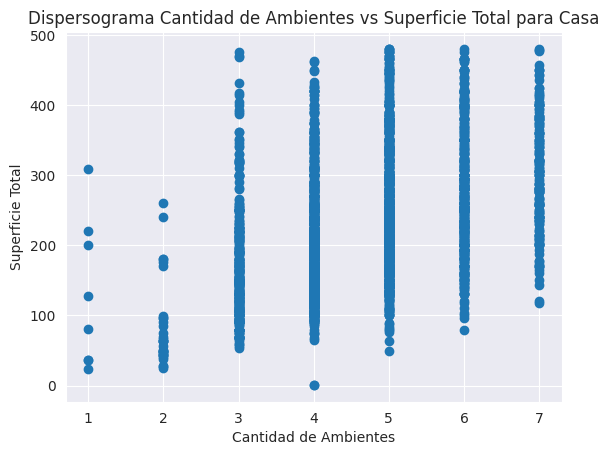

In [216]:
plt.scatter(df_casa.property_rooms, df_casa.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Casa')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Lo que se puede apreciar en este nuevo dispersograma, es que para una propiedad de tipo Casa la cantidad de ambientes tiende a ser mayor. Esto tiene sentido ya que como podemos ver disponemos de una gran superficie.

Se pueden observar algunos valores aislados, aunque no nos llaman debidamente la atencion dado a que es coherente que a menor cantidad de ambientes, la superficie sea mas chica.

Calculamos distancias para este tipo de propiedad

In [217]:
X = df_casa[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_casa['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_casa.head()

id  start_date  end_date  created_on    latitud  \
387643  MGM2azMohIovCwT8jcExeQ==      737879    737907      737879 -34.612009   
74909   R21ZaT3P51jKsOJCPlhDsA==      737814    737906      737814 -34.631631   
424845  5PfALVXCKBuTj0wT2l0DxA==      738140    738182      738140 -34.643476   
431951  Ct6qgnyItKneV7vn3cdW2Q==      738140    738195      738140 -34.628101   
446712  vJ8qWviFe3331GWPM9bigg==      737804    737822      737804 -34.576798   

         longitud         place_l2          place_l3          place_l4  \
387643 -58.475824  Capital Federal  Villa del Parque  Villa del Parque   
74909  -58.524970  Capital Federal         Versalles         Versalles   
424845 -58.463102  Capital Federal            Flores            Flores   
431951 -58.500728  Capital Federal   Velez Sarsfield   Velez Sarsfield   
446712 -58.470496  Capital Federal     Villa Ortuzar     Villa Ortuzar   

        place_l5  ...  operation property_type property_rooms  \
387643       NaN  ...      Venta          Casa            5.0   
74909        NaN  ...      Venta          Casa            3.0   
424845       NaN  ...      Venta          Casa            5.0   
431951       NaN  ...      Venta          Casa            4.0   
446712       NaN  ...      Venta          Casa            4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
387643                4.0                   320.0                     250.0   
74909                 2.0                   137.0                     137.0   
424845                4.0                   238.0                     238.0   
431951                3.0                   345.0                     310.0   
446712                3.0                   195.0                     195.0   

        property_price  property_currency  \
387643        450000.0                USD   
74909         198000.0                USD   
424845        189000.0                USD   
431951        299000.0                USD   
446712        385000.0                USD   

                                           property_title mahal_ro_st  
387643  VENTA CASA 4 AMB JARDÍN Y PILETA VILLA DEL PARQUE    1.016339  
74909                                    Casa - Versalles    2.163104  
424845         CASA • LOTE  PROPIO • 5 AMBIENTES • FLORES    0.178572  
431951     Casa 4 ambientes con deposito o local. Patio      2.726119  
446712  Casa en venta en 1 planta de 4 ambientes en lo...    0.262279  

[5 rows x 21 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

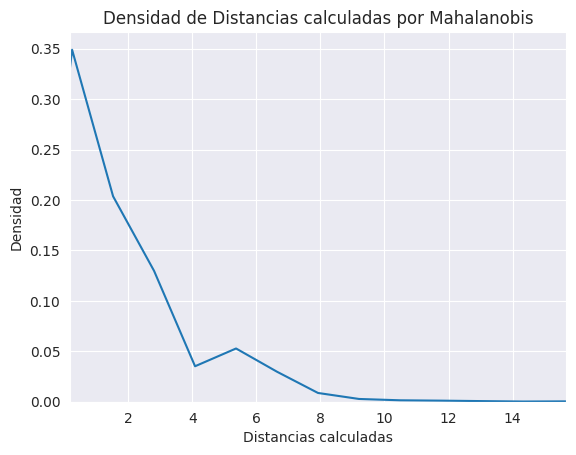

In [218]:
dis = round(df_casa.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

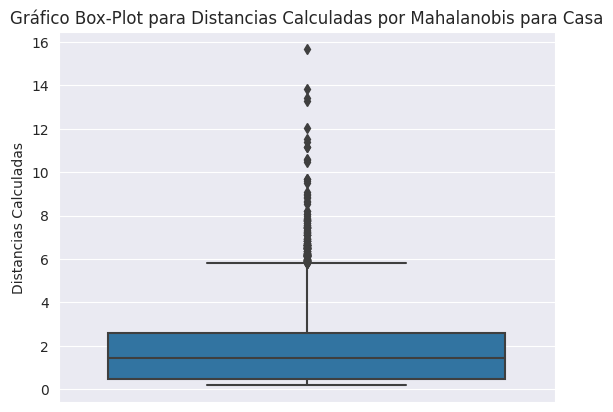

In [219]:
sns.boxplot(data=df_casa, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Casa')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 13 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

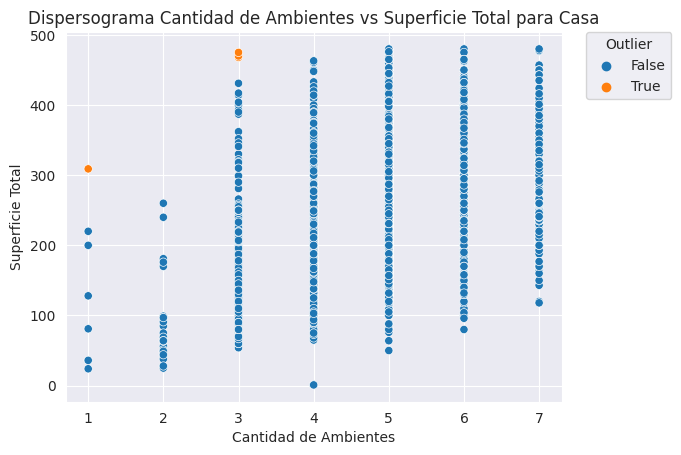

In [220]:
umbral = 13
df_casa[df_casa['mahal_ro_st']>umbral]

es_outlier = (df_casa['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_casa.property_rooms,y=df_casa.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para Casa')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Volvemos a evaluar el porcentaje que representan sobre la totalidad de los datos de este tipo de propiedad

In [221]:
pct = df_casa[df_casa['mahal_ro_st']>umbral].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.145% de los datos.


Y notamos que representan una porcion muy pequeña de nuestro dataset de trabajo. Procedemos a eliminarlo del mismo.

In [222]:
out_indixes = df_casa[df_casa['mahal_ro_st']>umbral].index

In [223]:
df.drop(out_indixes, inplace=True)
df_casa.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [224]:
df_casa[df_casa['mahal_ro_st'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st]
Index: []

[0 rows x 21 columns]

**PH**

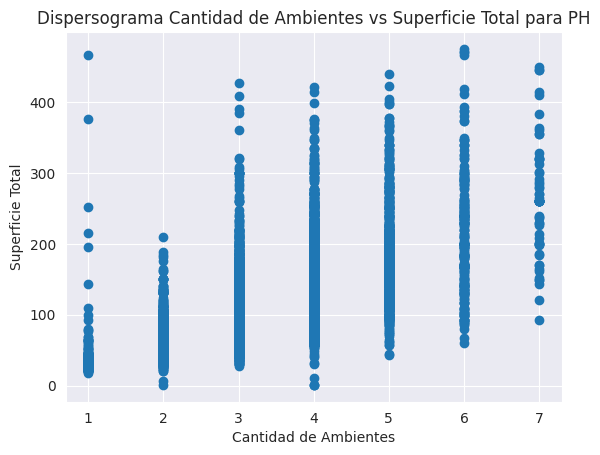

In [225]:
plt.scatter(df_ph.property_rooms, df_ph.property_surface_total)
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para PH')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Notemos que, a priori, resultarían extrañas las observaciones detecadas soperiores a 300 para 1 ambiente.

Procedemos a realizar un análisis más detallado utilizando la distancia de Mahalanobis:

In [226]:
X = df_ph[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_ph['mahal_ro_st'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_ph.head()

id  start_date  end_date  created_on    latitud  \
241652  +QvrIZqpMPRxlz+ilj1LkA==      737881    737965      737881 -34.564779   
171763  lptqhc6hgKrEGJtImFZCJw==      738144    738195      738144 -34.612921   
266776  T1g0pGYdDflgb2YLc6rCKQ==      738035    738035      738035 -34.616105   
253247  GEuOGLrdHvMtWuu1x/yLZw==      738022    738025      738022 -34.616064   
184244  nu2t5qPbGteGdxni3yPQlg==      737947    738160      737947 -34.612897   

         longitud         place_l2       place_l3       place_l4  place_l5  \
241652 -58.505463  Capital Federal  Villa Urquiza  Villa Urquiza       NaN   
171763 -58.394416  Capital Federal      Balvanera      Balvanera       NaN   
266776 -58.430122  Capital Federal      Caballito      Caballito       NaN   
253247 -58.508264  Capital Federal   Monte Castro   Monte Castro       NaN   
184244 -58.446416  Capital Federal      Caballito      Caballito       NaN   

        ...  operation property_type property_rooms  property_bedrooms  \
241652  ...      Venta            PH            6.0                3.0   
171763  ...      Venta            PH            3.0                2.0   
266776  ...      Venta            PH            5.0                4.0   
253247  ...      Venta            PH            3.0                2.0   
184244  ...      Venta            PH            4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
241652                   184.0                     124.0        350000.0   
171763                    58.0                      55.0         80000.0   
266776                   330.0                     270.0        499000.0   
253247                   106.0                      82.0        109900.0   
184244                   153.0                      95.0        165000.0   

        property_currency                                     property_title  \
241652                USD                    PH 5 ambientes en Villa Urquiza   
171763                USD  Departamento Ph 3 ambientes en venta en Balvan...   
266776                USD             Casa - Venta - Caballito - 5 ambientes   
253247                USD   Venta PH PB 3 amb. Patio y Terraza - MonteCastro   
184244                USD                                     PH - Caballito   

       mahal_ro_st  
241652    5.864005  
171763    1.008797  
266776   14.223911  
253247    0.131290  
184244    0.465297  

[5 rows x 21 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

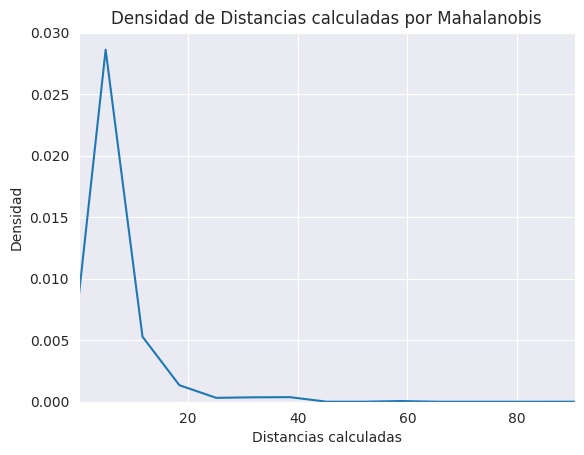

In [227]:
dis = round(df_ph.mahal_ro_st,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

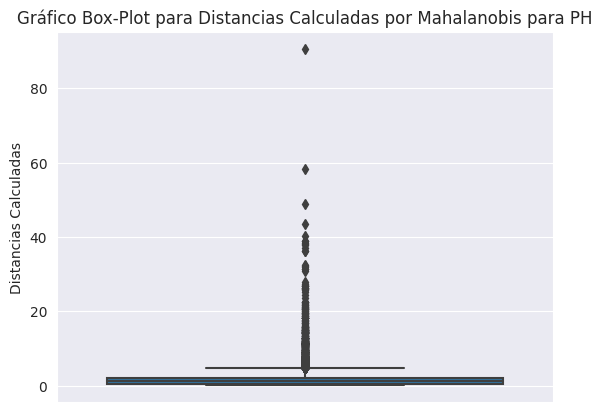

In [228]:
sns.boxplot(data=df_ph, y="mahal_ro_st")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para PH')
plt.ylabel('Distancias Calculadas')
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 50 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

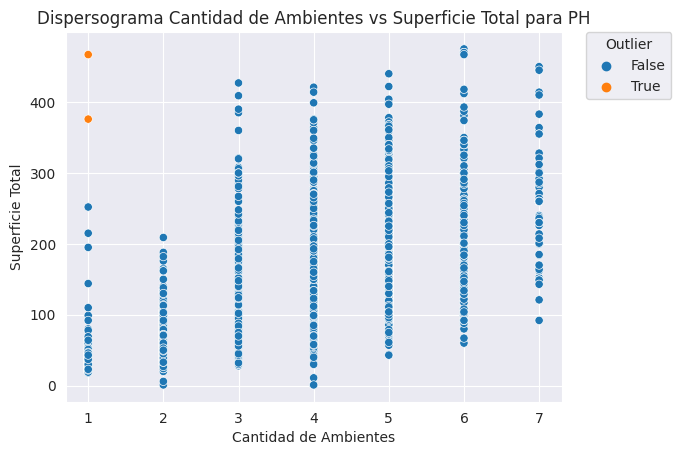

In [229]:
umbral = 50
df_ph[df_ph['mahal_ro_st']>umbral]

es_outlier = (df_ph['mahal_ro_st'] > umbral)
sns.scatterplot(x=df_ph.property_rooms,y=df_ph.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Ambientes vs Superficie Total para PH')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Superficie Total')
plt.show()

Efectivamente, los valores detectados en un comienzo son outliers para Mahalanobis.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [230]:
pct = df_ph[df_ph['mahal_ro_st']>umbral].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.027% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [231]:
out_indixes = df_ph[df_ph['mahal_ro_st']>umbral].index

In [232]:
df.drop(out_indixes, inplace=True)
df_ph.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [233]:
df_ph[df_ph['mahal_ro_st'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st]
Index: []

[0 rows x 21 columns]

###### property_bedrooms vs property_surface_covered

Siguiendo con la comparación anterior, en esta sección estaremos realizando un análisis multivariado entre las variables `property_bedrooms` y `property_surface_covered` agrupando por tipo de propiedad con el objeto de poder detectar observaciones anómalas teniendo en cuenta la cantidad de habitaciones que pueda llegar a haber en una propiedad según la superficie cubierta de la misma. Es importante destacar que, a diferencia del análisis previo, en esta ocasión únicamente nos centraremos en aquellas instalaciones cerradas al exterior.

**Departamento**

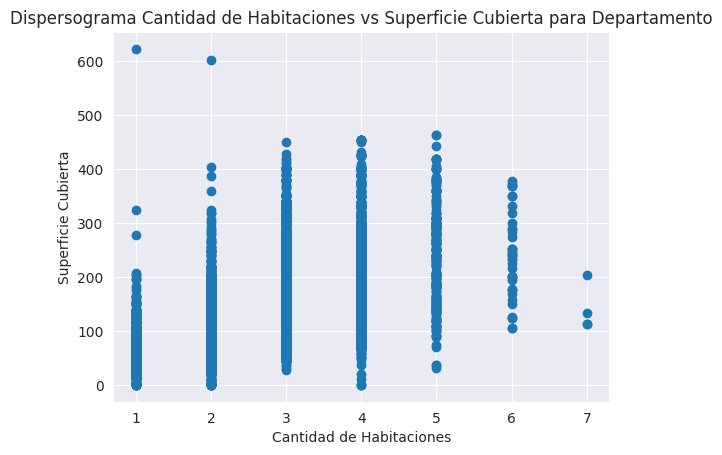

In [234]:
plt.scatter(df_depto.property_bedrooms, df_depto.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Departamento')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Veamos que podríamos clasificar los valores alejados de la masa de observaciones para 1 y 2 habitaciones como outliers. Ahora bien, utilicemos Mahalanobis para consolidar esta teoría y tomar una decisión respecto a los mismos e incluso encontrar nuevos valores atípicos en caso que los hubiera.

In [235]:
X = df_depto[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_depto['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_depto.head()

id  start_date  end_date  created_on    latitud  \
92828   1gMQ4rXcpnPs+hhvW11Jdw==      738005    738091      738005 -34.622385   
19975   p7gmyqzdOy/+odHwH5oPyg==      737817    737946      737817 -34.618084   
266756  ZYkS+4dCz1vUENzAREcX9w==      738035    738035      738035 -34.601159   
454638  UL/s8zoicLDXXwhaelBgFQ==      738140    738195      738140 -34.605542   
409114  wnz+hkCE7RVBNcqDQEtFSw==      737868    737946      737868 -34.593266   

         longitud         place_l2       place_l3       place_l4  place_l5  \
92828  -58.448886  Capital Federal      Caballito      Caballito       NaN   
19975  -58.359912  Capital Federal  Puerto Madero  Puerto Madero       NaN   
266756 -58.398106  Capital Federal      Balvanera      Balvanera       NaN   
454638 -58.390007  Capital Federal    San Nicolás    San Nicolás       NaN   
409114 -58.381426  Capital Federal         Retiro         Retiro       NaN   

        ...  property_type property_rooms property_bedrooms  \
92828   ...   Departamento            4.0               3.0   
19975   ...   Departamento            2.0               1.0   
266756  ...   Departamento            1.0               1.0   
454638  ...   Departamento            1.0               1.0   
409114  ...   Departamento            1.0               1.0   

        property_surface_total  property_surface_covered  property_price  \
92828                    113.0                      97.0        288000.0   
19975                     70.0                      65.0        450000.0   
266756                    33.0                      30.0         77243.0   
454638                    30.0                      30.0         65000.0   
409114                    40.0                      40.0         79000.0   

        property_currency                                     property_title  \
92828                 USD  Vta. Dpto. 4amb, Caballito, balcón aterrazado ...   
19975                 USD          Departamento con Cochera en Puerto Madero   
266756                USD     VENTA MONOAMBIENTE  BALVANERA  ZONA FACULTADES   
454638                USD  DEPTO 1 AMBIENTE Y MEDIO C/ COCHERA - SAN NICOLAS   
409114                USD                              Departamento - Retiro   

       mahal_ro_st mahal_br_sc  
92828     1.408935    2.468655  
19975     0.469155    1.549611  
266756    2.022643    0.782410  
454638    1.962566    0.782410  
409114    2.217379    0.760923  

[5 rows x 22 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

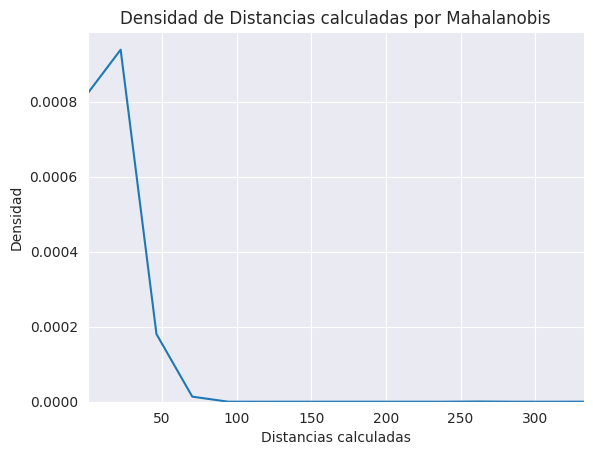

In [236]:
dis = round(df_depto.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

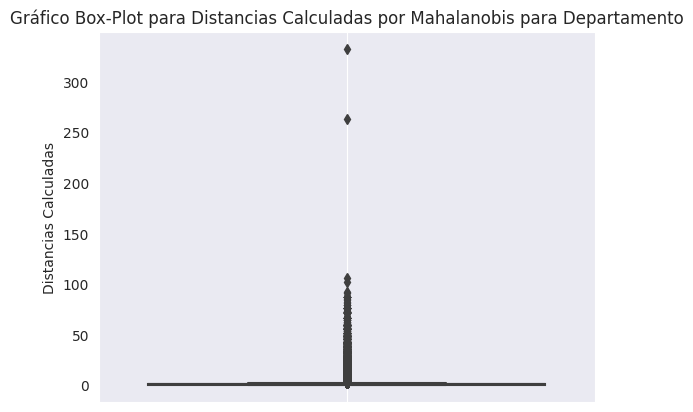

In [237]:
sns.boxplot(data=df_depto, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Departamento')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 150 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

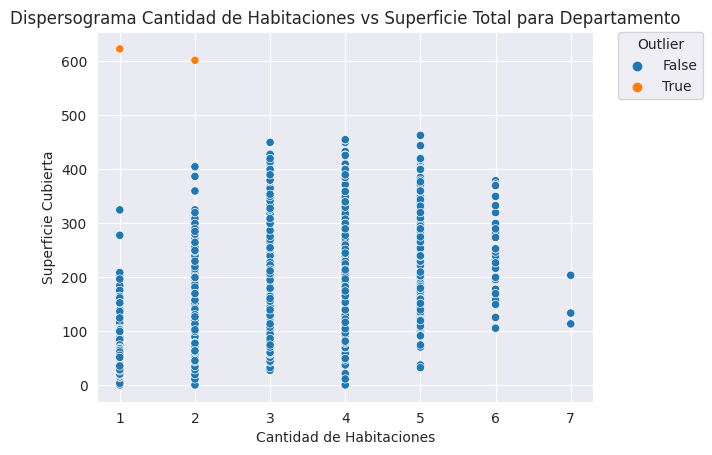

In [238]:
umbral = 150
df_depto[df_depto['mahal_br_sc']>umbral]

es_outlier = (df_depto['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_depto.property_bedrooms,y=df_depto.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Total para Departamento')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Efectivamente los valores que parecían outliers fueron detectados por el método.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [239]:
pct = df_depto[df_depto['mahal_br_sc']>umbral].shape[0] / df_depto.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.003% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [240]:
out_indixes = df_depto[df_depto['mahal_br_sc']>umbral].index

In [241]:
df.drop(out_indixes, inplace=True)
df_depto.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [242]:
df_depto[df_depto['mahal_br_sc'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st, mahal_br_sc]
Index: []

[0 rows x 22 columns]

**Casa**

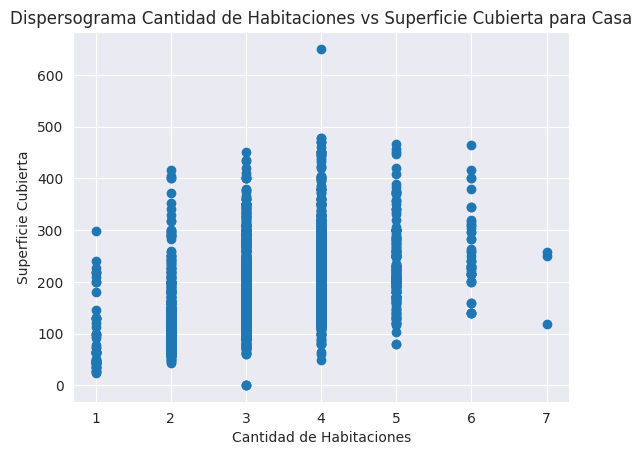

In [243]:
plt.scatter(df_casa.property_bedrooms, df_casa.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Casa')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Podríamos pensar que el método detectará como outlier el valor global que se encuentra alejado de la masa de observaciones para 4 habitaciones.

Calculamos distancias:

In [244]:
X = df_casa[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_casa['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_casa.head()

id  start_date  end_date  created_on    latitud  \
387643  MGM2azMohIovCwT8jcExeQ==      737879    737907      737879 -34.612009   
74909   R21ZaT3P51jKsOJCPlhDsA==      737814    737906      737814 -34.631631   
424845  5PfALVXCKBuTj0wT2l0DxA==      738140    738182      738140 -34.643476   
431951  Ct6qgnyItKneV7vn3cdW2Q==      738140    738195      738140 -34.628101   
446712  vJ8qWviFe3331GWPM9bigg==      737804    737822      737804 -34.576798   

         longitud         place_l2          place_l3          place_l4  \
387643 -58.475824  Capital Federal  Villa del Parque  Villa del Parque   
74909  -58.524970  Capital Federal         Versalles         Versalles   
424845 -58.463102  Capital Federal            Flores            Flores   
431951 -58.500728  Capital Federal   Velez Sarsfield   Velez Sarsfield   
446712 -58.470496  Capital Federal     Villa Ortuzar     Villa Ortuzar   

        place_l5  ...  property_type property_rooms property_bedrooms  \
387643       NaN  ...           Casa            5.0               4.0   
74909        NaN  ...           Casa            3.0               2.0   
424845       NaN  ...           Casa            5.0               4.0   
431951       NaN  ...           Casa            4.0               3.0   
446712       NaN  ...           Casa            4.0               3.0   

        property_surface_total  property_surface_covered  property_price  \
387643                   320.0                     250.0        450000.0   
74909                    137.0                     137.0        198000.0   
424845                   238.0                     238.0        189000.0   
431951                   345.0                     310.0        299000.0   
446712                   195.0                     195.0        385000.0   

        property_currency                                     property_title  \
387643                USD  VENTA CASA 4 AMB JARDÍN Y PILETA VILLA DEL PARQUE   
74909                 USD                                   Casa - Versalles   
424845                USD         CASA • LOTE  PROPIO • 5 AMBIENTES • FLORES   
431951                USD     Casa 4 ambientes con deposito o local. Patio     
446712                USD  Casa en venta en 1 planta de 4 ambientes en lo...   

       mahal_ro_st mahal_br_sc  
387643    1.016339    0.933553  
74909     2.163104    1.358465  
424845    0.178572    0.806980  
431951    2.726119    3.395068  
446712    0.262279    0.075179  

[5 rows x 22 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

Text(0, 0.5, 'Densidad')

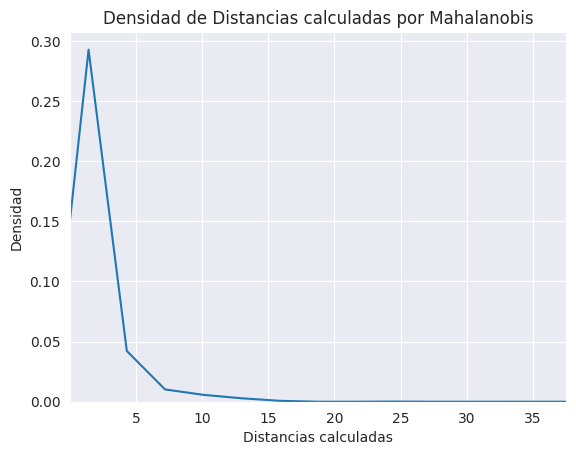

In [245]:
dis = round(df_casa.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

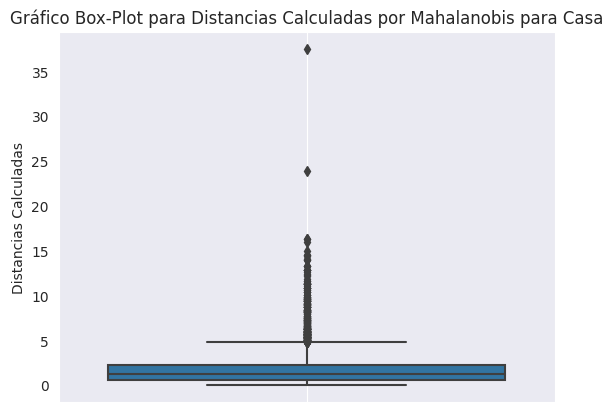

In [246]:
sns.boxplot(data=df_casa, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para Casa')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 20 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

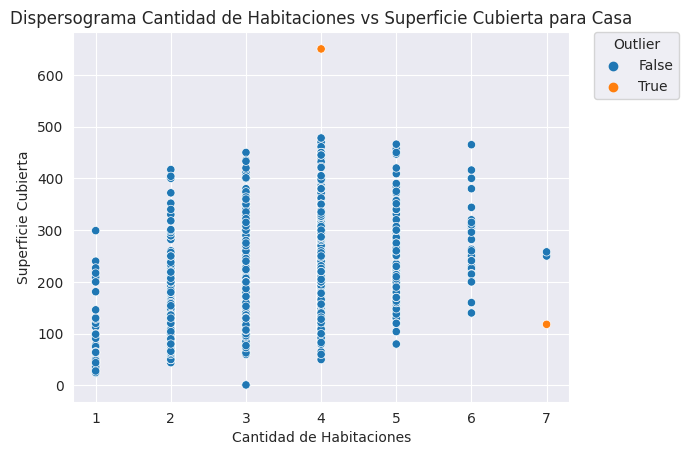

In [247]:
umbral = 20
df_casa[df_casa['mahal_br_sc']>umbral]

es_outlier = (df_casa['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_casa.property_bedrooms,y=df_casa.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para Casa')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Volvemos a evaluar el porcentaje que representan sobre la totalidad de los datos de este tipo de propiedad

In [248]:
pct = df_casa[df_casa['mahal_br_sc']>umbral].shape[0] / df_casa.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.073% de los datos.


Y notamos que representan una porcion muy pequeña de nuestro dataset de trabajo. Procedemos a eliminarlo del mismo.

In [249]:
out_indixes = df_casa[df_casa['mahal_br_sc']>umbral].index

In [250]:
df.drop(out_indixes, inplace=True)
df_casa.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [251]:
df_casa[df_casa['mahal_br_sc'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st, mahal_br_sc]
Index: []

[0 rows x 22 columns]

**PH**

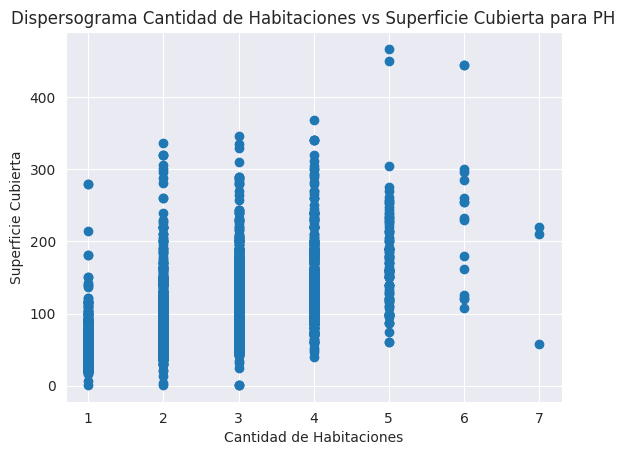

In [252]:
plt.scatter(df_ph.property_bedrooms, df_ph.property_surface_covered)
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para PH')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Podríamos identitifcar como outliers los valores globales que se visualizan para 5, 6 y 7 cantidad de habitaciones. Veamos cómo resulta el cálculo de distancias de Mahalanobis:

In [253]:
X = df_ph[['property_bedrooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

df_ph['mahal_br_sc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

df_ph.head()

id  start_date  end_date  created_on    latitud  \
241652  +QvrIZqpMPRxlz+ilj1LkA==      737881    737965      737881 -34.564779   
171763  lptqhc6hgKrEGJtImFZCJw==      738144    738195      738144 -34.612921   
266776  T1g0pGYdDflgb2YLc6rCKQ==      738035    738035      738035 -34.616105   
253247  GEuOGLrdHvMtWuu1x/yLZw==      738022    738025      738022 -34.616064   
184244  nu2t5qPbGteGdxni3yPQlg==      737947    738160      737947 -34.612897   

         longitud         place_l2       place_l3       place_l4  place_l5  \
241652 -58.505463  Capital Federal  Villa Urquiza  Villa Urquiza       NaN   
171763 -58.394416  Capital Federal      Balvanera      Balvanera       NaN   
266776 -58.430122  Capital Federal      Caballito      Caballito       NaN   
253247 -58.508264  Capital Federal   Monte Castro   Monte Castro       NaN   
184244 -58.446416  Capital Federal      Caballito      Caballito       NaN   

        ...  property_type property_rooms property_bedrooms  \
241652  ...             PH            6.0               3.0   
171763  ...             PH            3.0               2.0   
266776  ...             PH            5.0               4.0   
253247  ...             PH            3.0               2.0   
184244  ...             PH            4.0               3.0   

        property_surface_total  property_surface_covered  property_price  \
241652                   184.0                     124.0        350000.0   
171763                    58.0                      55.0         80000.0   
266776                   330.0                     270.0        499000.0   
253247                   106.0                      82.0        109900.0   
184244                   153.0                      95.0        165000.0   

        property_currency                                     property_title  \
241652                USD                    PH 5 ambientes en Villa Urquiza   
171763                USD  Departamento Ph 3 ambientes en venta en Balvan...   
266776                USD             Casa - Venta - Caballito - 5 ambientes   
253247                USD   Venta PH PB 3 amb. Patio y Terraza - MonteCastro   
184244                USD                                     PH - Caballito   

       mahal_ro_st mahal_br_sc  
241652    5.864005    1.082835  
171763    1.008797    0.498320  
266776   14.223911   23.450658  
253247    0.131290    0.133353  
184244    0.465297    0.621222  

[5 rows x 22 columns]

Realizamos un gráfico para visualizar la distribución de las distancias calculadas por Mahalanobis:

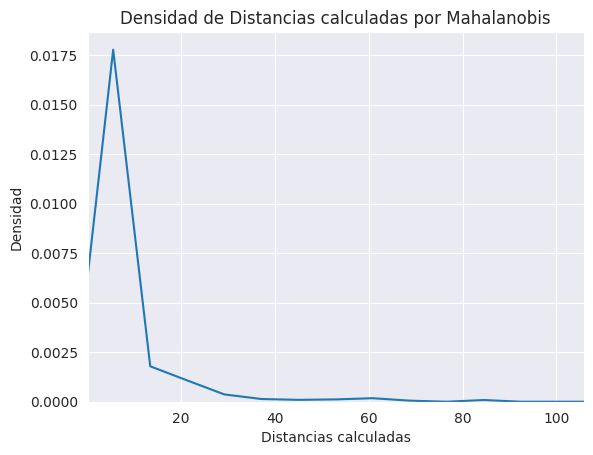

In [254]:
dis = round(df_ph.mahal_br_sc,2)
grf = sns.kdeplot(data=dis, gridsize=15)
plt.xlim(min(dis),max(dis))
plt.title("Densidad de Distancias calculadas por Mahalanobis")
plt.xlabel("Distancias calculadas")
plt.ylabel("Densidad")
plt.show()

Realizamos un Box Plot que nos ayude a decidir cuál será el umbral que utilizaremos para el cálculo de la distancia de Mahalanobis:

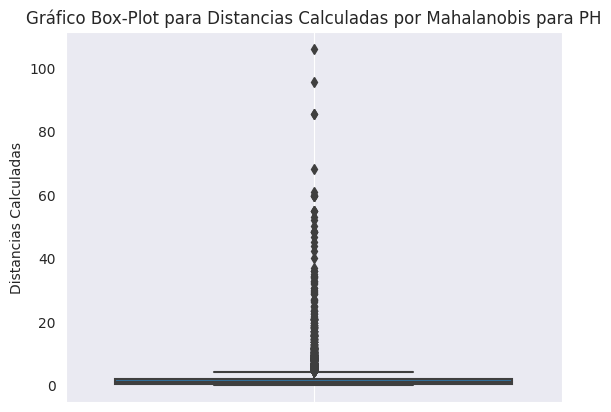

In [255]:
sns.boxplot(data=df_ph, y="mahal_br_sc")
plt.title('Gráfico Box-Plot para Distancias Calculadas por Mahalanobis para PH')
plt.ylabel('Distancias Calculadas')
plt.grid()
plt.show()

Utilizando el gráfico de densidad y notando que un valor superior a 80 podría considerarse como outlier según el método, tomamos la decisión de utilizar dicho valor como umbral:

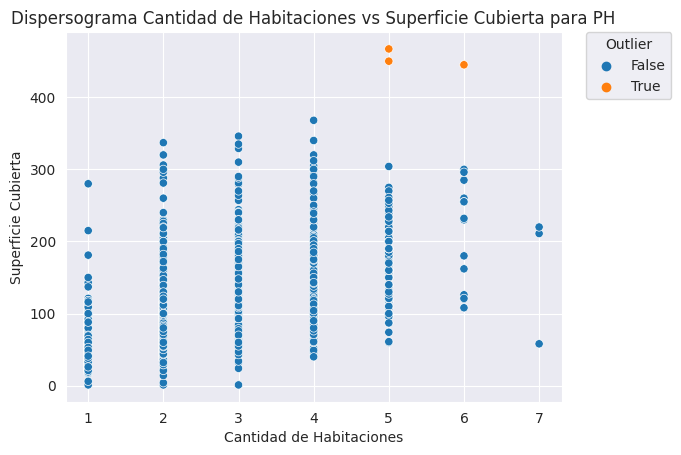

In [256]:
umbral = 80
df_ph[df_ph['mahal_br_sc']>umbral]

es_outlier = (df_ph['mahal_br_sc'] > umbral)
sns.scatterplot(x=df_ph.property_bedrooms,y=df_ph.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Cantidad de Habitaciones vs Superficie Cubierta para PH')
plt.xlabel('Cantidad de Habitaciones')
plt.ylabel('Superficie Cubierta')
plt.show()

Por el contrario que en los análisis previos, en esta ocasión Mahalanobis no detectó como outliers los que planteamos en un principio.

Evaluamos el porcentaje que representan en el total de las mediciones:

In [257]:
pct = df_ph[df_ph['mahal_br_sc']>umbral].shape[0] / df_ph.shape[0] * 100

print(f"Los outliers detectados representan un {round(pct,3)}% de los datos.")

Los outliers detectados representan un 0.055% de los datos.


Y procedemos a eliminarlos de los datasets de trabajo

In [258]:
out_indixes = df_ph[df_ph['mahal_br_sc']>umbral].index

In [259]:
df.drop(out_indixes, inplace=True)
df_ph.drop(out_indixes, inplace=True)

Verificamos que efectivamente se hayan eliminado los outliers detectados por Mahalanobis:

In [260]:
df_ph[df_ph['mahal_br_sc'] > umbral]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, mahal_ro_st, mahal_br_sc]
Index: []

[0 rows x 22 columns]

## 1d. Reducción de la dimensionalidad

Generamos un nuevo dataset de reducción de dimensionalidad:

In [261]:
df_reduc = df.copy()
test_reduc = test.copy()

Revisamos la totalidad de columnas hasta el momento:

In [262]:
df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Variables Irrelevantes

En primer lugar, nos encargamos de eliminar aquellas variables que previamente detectamos como redundantes:

In [263]:
df_reduc.drop("id", inplace=True, axis=1)
df_reduc.drop("place_l2", inplace=True, axis=1)
df_reduc.drop("place_l3", inplace=True, axis=1)
df_reduc.drop("place_l5", inplace=True, axis=1)
df_reduc.drop("place_l6", inplace=True, axis=1)
df_reduc.drop("operation", inplace=True, axis=1)
df_reduc.drop("property_currency", inplace=True, axis=1)
df_reduc.drop("property_title", inplace=True, axis=1)

test_reduc.drop("id", inplace=True, axis=1)
test_reduc.drop("place_l2", inplace=True, axis=1)
test_reduc.drop("place_l3", inplace=True, axis=1)
test_reduc.drop("place_l5", inplace=True, axis=1)
test_reduc.drop("place_l6", inplace=True, axis=1)
test_reduc.drop("operation", inplace=True, axis=1)
test_reduc.drop("property_currency", inplace=True, axis=1)
test_reduc.drop("property_title", inplace=True, axis=1)

df_reduc.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price']

### Variables Correlacionadas

Estudiamos la correlación entre las variables del dataset con el objeto de analizar si es óptimo o no tener un par de variables que tengan un alto nivel de correlación. Establecemos como umbral 0.85:

In [264]:
df_reduc.corr().style.background_gradient(cmap='YlOrRd')

Veamos que hay una correlación alta entre:
- `start_date` y `created_on`
- `property_rooms` y `property_bedrooms`
- `property_surface_total` y `property_surface_covered`

Proseguimos a eliminar una de cada par:

In [265]:
df_reduc.drop("created_on", inplace=True, axis=1)
df_reduc.drop("property_bedrooms", inplace=True, axis=1)
df_reduc.drop("property_surface_covered", inplace=True, axis=1)

### Variables con Baja Varianza

In [266]:
df_reduc.var().sort_values()

latitud                   6.929558e-04
longitud                  1.436433e-03
property_rooms            1.571076e+00
property_surface_total    4.265198e+03
start_date                1.071352e+04
end_date                  2.294157e+04
property_price            6.567813e+10
dtype: float64

Veamos que las variables `latitud` y `longitud` tienen varianzas muy bajas y son candidatas a ser eliminadas del dataset. Sin embargo, decidimos dejarlas puesto que las utilizaremos más adelante para graficar los mapas de agrupamiento.

Replicamos los cambios en el dataset de test

In [267]:
test_reduc.drop("created_on", inplace=True, axis=1)
test_reduc.drop("property_bedrooms", inplace=True, axis=1)
test_reduc.drop("property_surface_covered", inplace=True, axis=1)

### Exportación de Datos

Puesto que las variables restantes en el dataset son de utilidad para el análisis pendiente restante del trabajo práctico, no aplicamos más métodos de reducción.

Finalmente, las columnas del dataset reducido son las siguientes:

In [268]:
df_reduc.columns.tolist()

['start_date',
 'end_date',
 'latitud',
 'longitud',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_surface_total',
 'property_price']

In [269]:
test_reduc.head()

start_date  end_date    latitud   longitud place_l4 property_type  \
56       738042    738059 -34.629398 -58.425852    Boedo  Departamento   
57       738042    738052 -34.620748 -58.412004    Boedo  Departamento   
59       738042    738059 -34.626595 -58.420019    Boedo            PH   
62       738042    738182 -34.627566 -58.411937    Boedo            PH   
231      738042    738043 -34.625298 -58.459998   Flores  Departamento   

     property_rooms  property_surface_total  property_price  
56              2.0                    62.0        100000.0  
57              3.0                    59.0        185000.0  
59              4.0                   111.0        110000.0  
62              4.0                   100.0        180000.0  
231             3.0                    57.0         98000.0

Verificamos que el dataset de test contenga las mismas columnas:

In [270]:
df_reduc.columns.tolist() == test_reduc.columns.tolist()

True

Exportamos el dataset generado luego de aplicar la reduccion de la dimensionalidad:

In [271]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/DATASETS/1d_df_reducido.csv'
else:
  path = './DATASETS/1d_df_reducido.csv'

df_reduc.to_csv(path)

#  **2. Agrupamiento**

## Tendencia al Clustering
Primero generamos el dataset de trabajo con *One Hot Encoding* para las variables cualitativas

In [272]:
df_trabajo = pd.get_dummies(df_reduc, columns=['place_l4', 'property_type'], drop_first=True)

Luego realizamos un análisis de Hopkins para determinar la tendencia al clustering de todo el dataset

In [273]:
print ("El score de Hopkins para el Dataframe es " + str(hopkins(df_trabajo, df_trabajo.shape[0])))

El score de Hopkins para el Dataframe es 0.00023750986070963638


Según la documentación de pyclustertend, la librería que implementa este score, valores cercanos a 0 indican una tendencia al clustering. Dado que ambos dataframes dan cercanos a 0 podemos concluir que existe una alta tendencia al clustering.

Aplicamos el algoritmo K-means contemplando todas las variables:


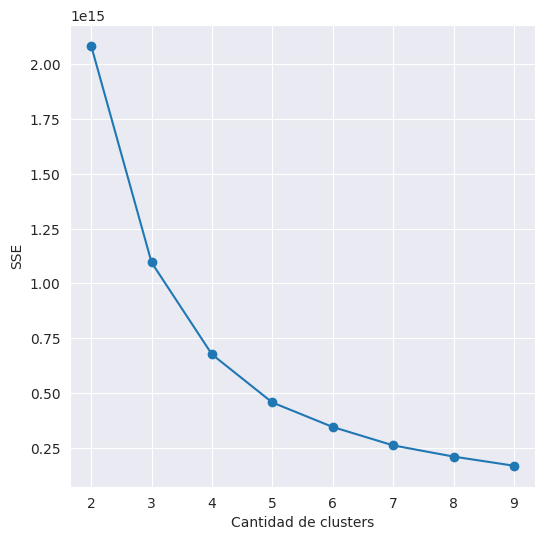

In [274]:
sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_trabajo)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Aunque no se nota un "codo" en el análisis por método del codo, utilizamos 5 clusters siendo que esel ultimo salto antes de obtener reducciones constantes de la distancia media al centroide.

In [275]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_trabajo)
y_kmeans = kmeans.predict(df_trabajo)
print ("Silhouette Score para 5 clusters = " + str(silhouette_score(df_trabajo, y_kmeans)))

Silhouette Score para 5 clusters = 0.64417469738985


Observamos que el score es mayor a 0, pero no muy cercano a 1. Esto tiende a indicar que aunque los puntos están bien asignados a su cluster (mayor a 0), los clusters no están bien definidos y están muy cerca entre sí (no muy cerca de 1)

Graficamos los resultados en un mapa de CABA, junto con la gráfica de densidad de cada grupo.

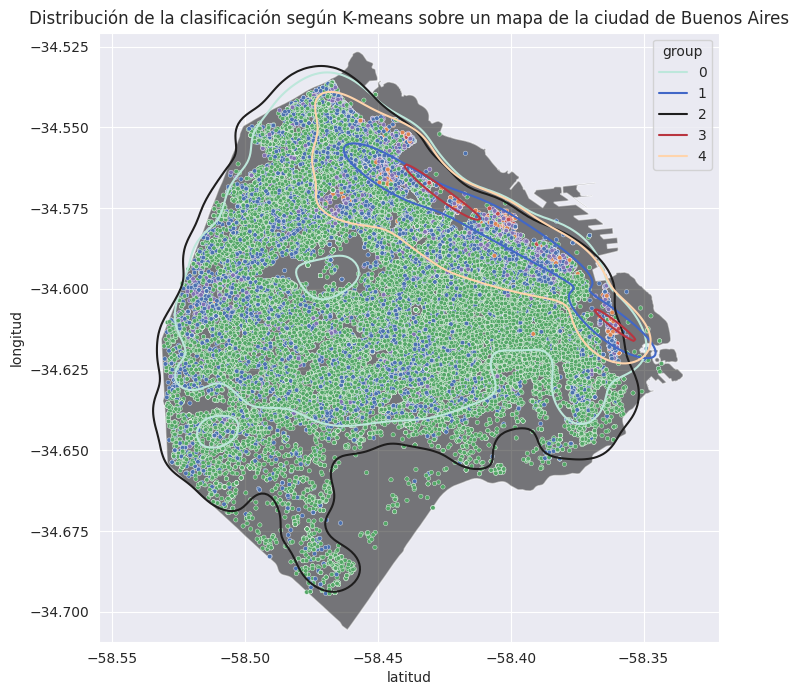

In [276]:
if IN_COLAB :
    caba = gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson')
else :
    caba = gpd.read_file('./caba.geojson')

aux_df = df_reduc.copy()
aux_df["group"] = y_kmeans

caba.plot(cmap='cubehelix', alpha=0.5).set_title('Distribución de la clasificación según K-means sobre un mapa de la ciudad de Buenos Aires')
sns.scatterplot(x="longitud",
                y="latitud",
                s=10,
                hue=y_kmeans,
                data=df_trabajo,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(8, 8)
sns.kdeplot(data=aux_df,
            y="latitud",
            x="longitud",
            hue="group",
            levels=1,
            thresh=0.05,
            palette="icefire")
plt.show()

Procedemos a analizar las características de los grupos generados. El primer análisis que realizamos es comparando por los rangos de precios, separando por tipo de propiedad:

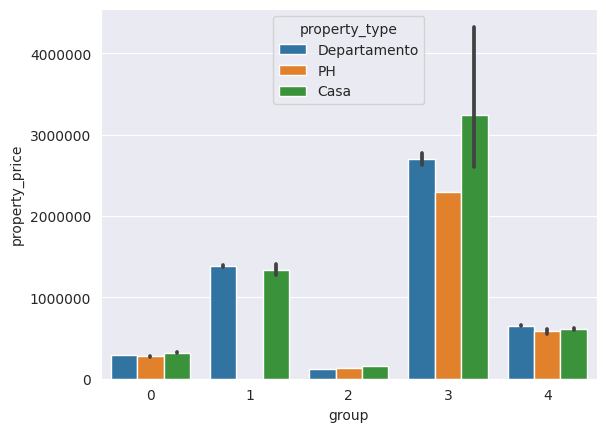

In [277]:
sns.barplot(data=aux_df,
            hue='property_type',
            y='property_price',
            x='group')
plt.ticklabel_format(style='plain', axis='y')

Se puede observar que cada grupo se encuentra dentro de un rango de precios definidos, independientemente del tipo de propiedad


Otra característica en la que se diferencian claramente los grupos es la superficie total

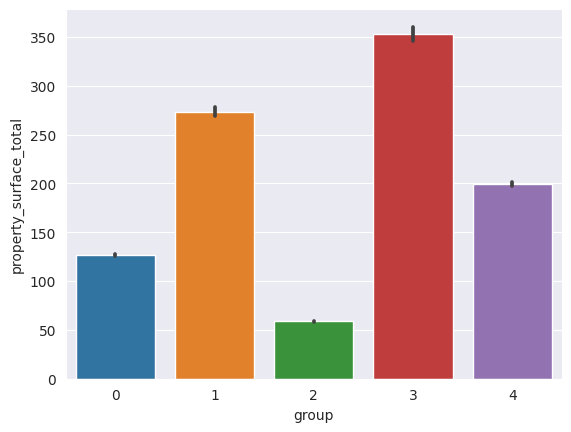

In [278]:
sns.barplot(data=aux_df,
            y='property_surface_total',
            x='group')
aux_df.group.value_counts()
plt.ticklabel_format(style='plain', axis='y')

Como se vio en el análisis de correlación de variables, la superficie y el precio están altamente relacionadas. El grupo con las propiedades de mayor valor tiene superficies más altas y viceversa.

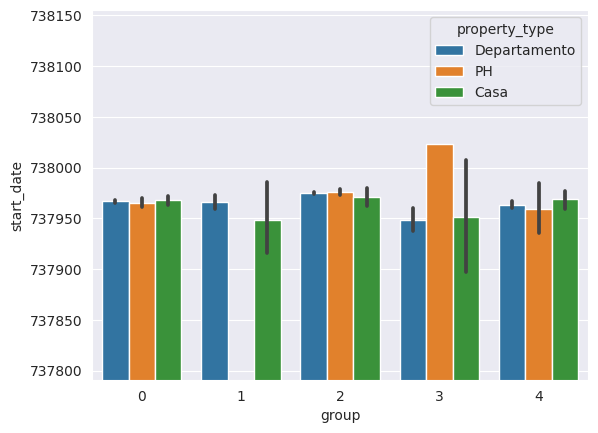

In [279]:
sns.barplot(data=aux_df,
            hue='property_type',
            y='start_date',
            x='group').set_ylim(min(aux_df["start_date"]), max(aux_df["start_date"]))
plt.ticklabel_format(style='plain', axis='y')

Podemos observar que la fecha de inicio de la publicación no es un feature relevante para el agrupamiento.
Tampoco lo son la fecha de finalización ni la cantidad de habitaciones.

Realizamos el mismo análisis sobre el dataset utilizando 3 clusters:

In [280]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_trabajo)
y_kmeans = kmeans.predict(df_trabajo)
print ("Silhouette Score para 3 clusters = " + str(silhouette_score(df_trabajo, y_kmeans)))

Silhouette Score para 3 clusters = 0.7374431239302044


El score de Silhouette para 3 clusters es mayor al obtenido para 5. Esto implica un mejor emparejamiento con su propio grupo, y mayor diferencia con los otros.

Podemos observar esta clasificación graficada sobre un mapa de la ciudad de Buenos Aires, junto con la gráfica de densidad de cada grupo

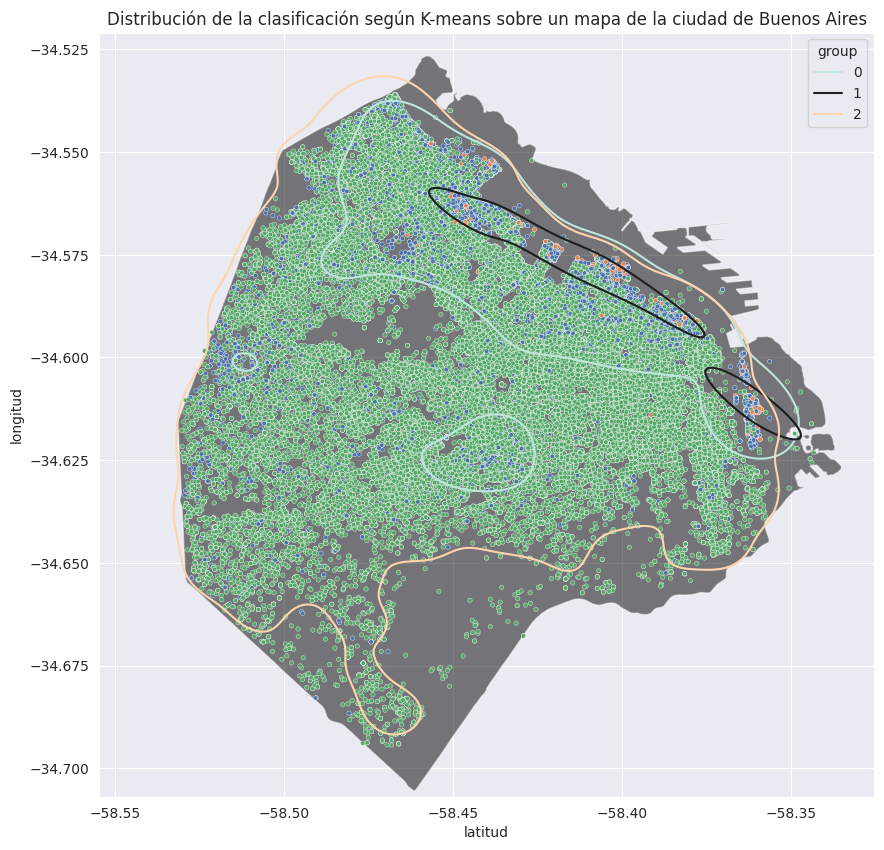

In [281]:
aux_df = df_reduc.copy()
aux_df["group"] = y_kmeans
caba.plot(cmap='cubehelix', alpha=0.5).set_title('Distribución de la clasificación según K-means sobre un mapa de la ciudad de Buenos Aires')
sns.scatterplot(x="longitud",
                y="latitud",
                s=10,
                hue=y_kmeans,
                data=df_trabajo,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.kdeplot(data=aux_df,
            y="latitud",
            x="longitud",
            hue="group",
            levels=1,
            thresh=0.05,
            palette="icefire")
plt.show()

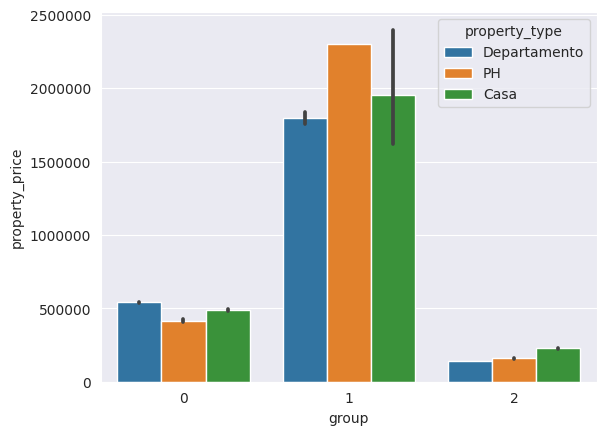

In [282]:
sns.barplot(data=aux_df,
            hue='property_type',
            y='property_price',
            x='group')
plt.ticklabel_format(style='plain', axis='y')

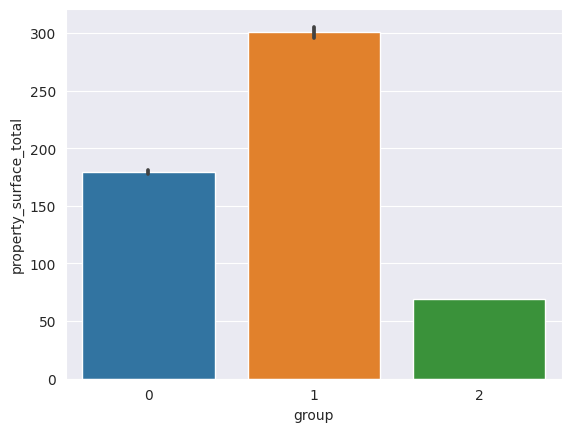

In [283]:
sns.barplot(data=aux_df,
            y='property_surface_total',
            x='group')
aux_df.group.value_counts()
plt.ticklabel_format(style='plain', axis='y')

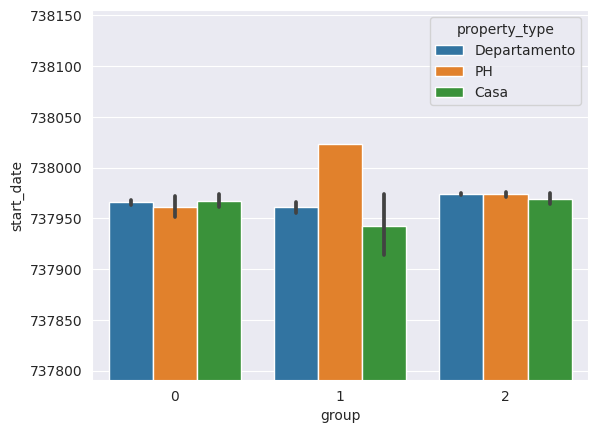

In [284]:
sns.barplot(data=aux_df,
            hue='property_type',
            y='start_date',
            x='group').set_ylim(min(aux_df["start_date"]), max(aux_df["start_date"]))
plt.ticklabel_format(style='plain', axis='y')

Queda evidenciado por los gráficos anteriores que el agrupamiento se realiza de la misma manera con 3 o 5 clusters

##  **Conclusiones**

Como era de esperarse, los features más relevantes para el agrupamiento fueron ubicación, precio y superficie.
Otras características, como la fecha de inicio o de fin, el tipo de propiedad y la cantidad de habitaciones no influyeron de manera significativa en la conformación de grupos.

#  **3. Clasificación**

## **3.a Construcción del target**

### 3.a.1
Primera alternativa, variable pxm2 en 3 intervalos con igual cantidad de observaciones

In [285]:
df_trabajo = df_reduc.copy()
df_trabajo["property_m2price"] = df_trabajo["property_price"] / df_trabajo["property_surface_total"]
df_trabajo.sort_values(by=["property_m2price"], inplace=True)

In [286]:
df_trabajo['tipo_precio_1'] = pd.qcut(x=df_trabajo['property_m2price'], q=3, labels=['bajo', 'medio', 'alto'])

### 3.a.2
Segunda alternativa, variable pxm2 en 3 intervalos, 25% a bajo, 50% a medio y el otro 25% restante a alto

In [287]:
df_trabajo['tipo_precio_2'] = pd.qcut(x=df_trabajo['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto'])
df_trabajo['tipo_precio_2'].replace("medio2","medio", inplace=True)

### 3.a.3
Tercera alternativa, como el punto anterior pero separado por tipo de propiedad

In [288]:
df_trabajo['tipo_precio_3'] = pd.qcut(x=df_trabajo.loc[df_trabajo['property_type'] == 'Departamento']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio")
df_trabajo['tipo_precio_3'].fillna(pd.qcut(x=df_trabajo.loc[df_trabajo['property_type'] == 'Casa']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)
df_trabajo['tipo_precio_3'].fillna(pd.qcut(x=df_trabajo.loc[df_trabajo['property_type'] == 'PH']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)

Analizamos las distribuciones del precio por metro cuadrado, el precio por metro cuadrado segun el tipo de propiedad y las distribuciones de los tipos de precio segun tipo de propiedad. Es importante notar que los gráficos estan en escala logarítmica ya que las cantidades tienen ordenes de magnitud muy distintos.

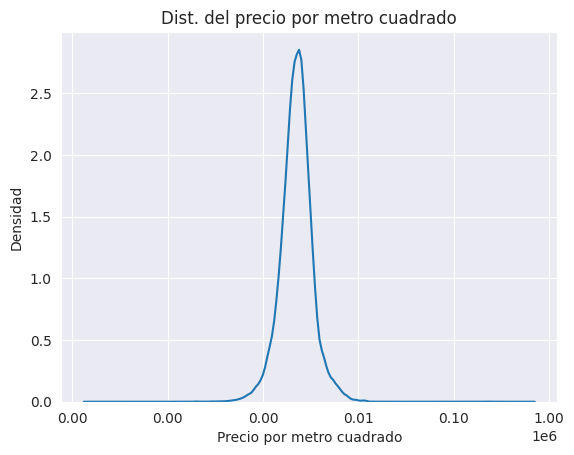

In [289]:
sns.kdeplot(data=df_trabajo, x="property_m2price",  log_scale=True).set(title='Dist. del precio por metro cuadrado')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

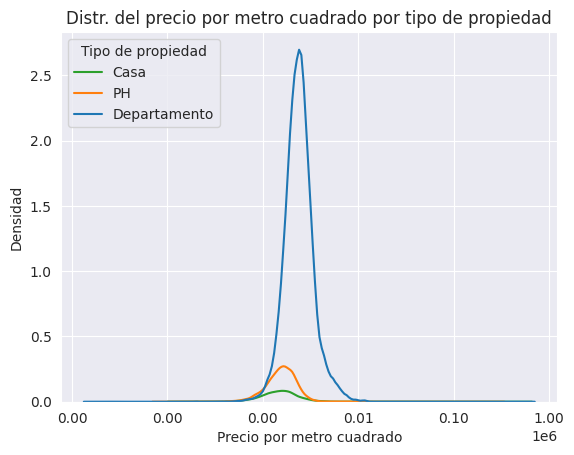

In [290]:
sns.kdeplot(data=df_trabajo, x="property_m2price", hue="property_type", log_scale=True).set(title='Distr. del precio por metro cuadrado por tipo de propiedad')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.legend(title='Tipo de propiedad', loc='upper left', labels=['Casa', 'PH', 'Departamento'])
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

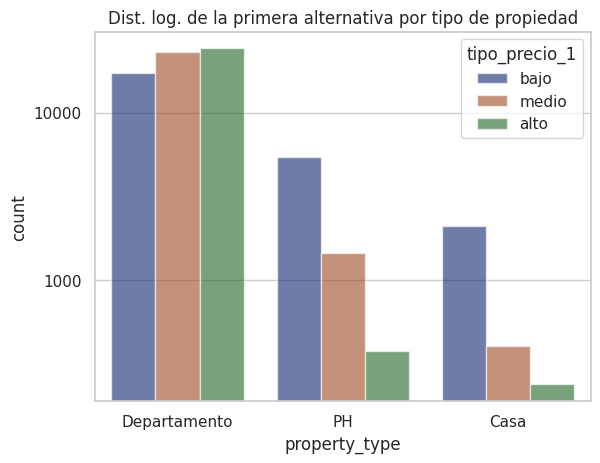

In [291]:
sns.set_theme(style="whitegrid")
sns.countplot(
    x='property_type',
    hue='tipo_precio_1',
    data=df_trabajo,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la primera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

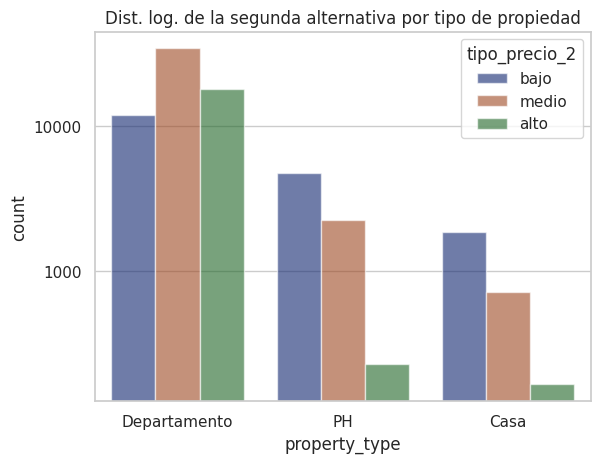

In [292]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_2',
    data=df_trabajo,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la segunda alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

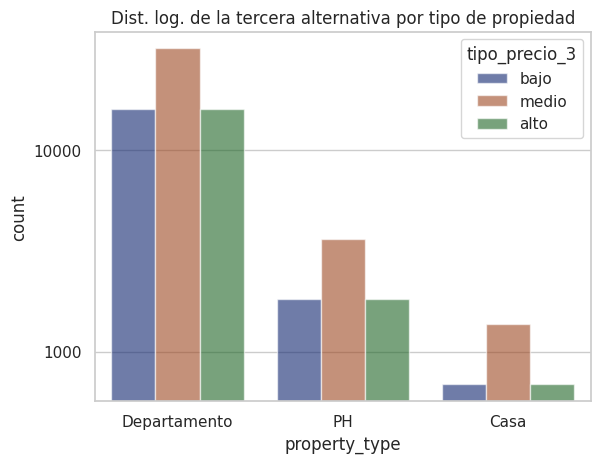

In [293]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_3',
    data=df_trabajo,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la tercera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

Analizando el gráfico "Distr. del precio por metro cuadrado por tipo de propiedad" podemos ver que la mediana del precio es distinta según el tipo de propiedad. Por este motivo decidimos que la mejor alternativa es la tercera, ya que separa las bandas de precio según el tipo de propiedad.

<AxesSubplot: xlabel='latitud', ylabel='longitud'>

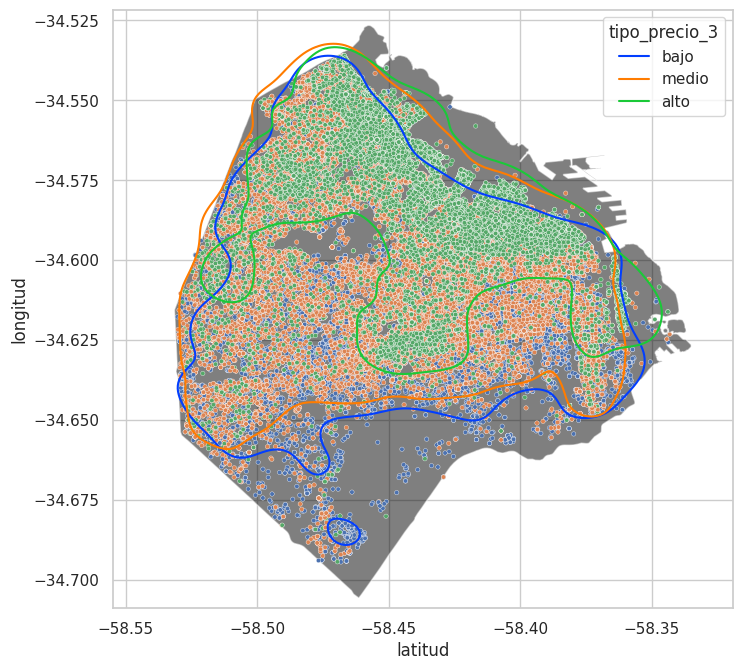

In [294]:
caba.plot(cmap='cubehelix', alpha=0.5)
sns.scatterplot(x="longitud",
                y="latitud", 
                s=10,
                hue="tipo_precio_3",
                data=df_trabajo,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(8, 8)
sns.kdeplot(data=df_trabajo,
            y="latitud",
            x="longitud",
            hue="tipo_precio_3",
            levels=1,
            thresh=0.05,
            palette="bright")

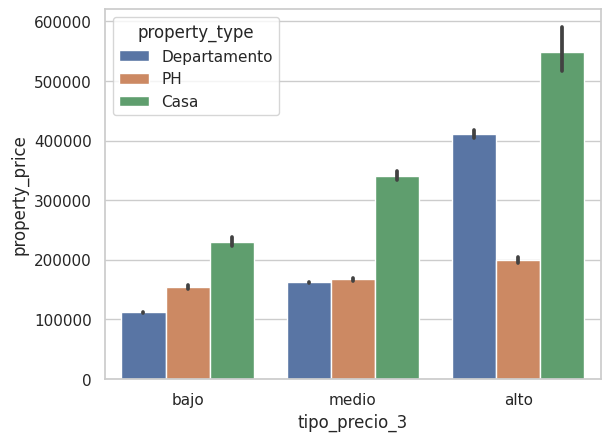

In [295]:
sns.barplot(data=df_trabajo,
            y='property_price',
            hue='property_type',
            x='tipo_precio_3')
plt.ticklabel_format(style='plain', axis='y')

En términos generales, el agrupamiento por Kmeans en 3 clusters y por el target elegido da resultados similares.
Diferencias notables son la homogeneidad del precio de los PH, y la densidad extendida geográficamente del grupo alto.
Ambos se deben a la mayor cantidad de entradas que tienen los grupos medio y alto respecto de los grupos formados por Kmeans.

Replicamos el target elegido en el conjunto de test.

In [296]:
test_trabajo = test_reduc.copy()
test_trabajo['property_m2price'] = test_trabajo['property_price'] / test_trabajo['property_surface_total']
test_trabajo['tipo_precio_3'] = pd.qcut(x=test_trabajo.loc[test_trabajo['property_type'] == 'Departamento']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio")
test_trabajo['tipo_precio_3'].fillna(pd.qcut(x=test_trabajo.loc[test_trabajo['property_type'] == 'Casa']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)
test_trabajo['tipo_precio_3'].fillna(pd.qcut(x=test_trabajo.loc[test_trabajo['property_type'] == 'PH']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)

## **3b. Entrenamiento y Predicción**

Definimos una función que imprima las métricas que vamos a mostrar.

In [297]:
def metricas(y_test, y_pred):
    print(f'Accuracy: {round(accuracy_score(y_test, y_pred),2)}')
    print(f'Precision: {round(precision_score(y_test, y_pred, average="macro"),2)}')
    print(f'Recall: {round(recall_score(y_test, y_pred, average="macro"),2)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred, average="macro"),2)}')

Primero creamos las variables de entrenamiento y prueba sin los features a predecir, los cuales guardamos en otras dos variables para luego comparar los resultados.

In [298]:
x_train = df_trabajo.drop(['tipo_precio_1', 'tipo_precio_2', 'tipo_precio_3', 'property_price', 'property_m2price'], axis='columns')
x_test = test_trabajo.drop(['tipo_precio_3', 'property_price', 'property_m2price'], axis='columns')
y_train = df_trabajo["tipo_precio_3"]
y_test = test_trabajo["tipo_precio_3"]

Realizamos one hot encoding para las variables cualitativas

In [299]:
x_train = pd.get_dummies(x_train, columns=['place_l4', 'property_type'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['place_l4', 'property_type'], drop_first=True)

## Modelo 1: Arbol de Decisión

Primero entrenamos un arbol de decisión con las variables de entrenamiento.
Decidimos que busque los mejores parámetros en base al Accuracy, ya que es la métrica más intuitiva y queremos maximizar el porcentaje de observaciones correctamente 

In [302]:
param_grid = {
    'max_depth': [*range(21, 25, 1)],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00005, 0.0001, 0.0005]}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [5e-05, 0.0001, 0.0005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [21, 22, 23, 24]},
             scoring='accuracy')

In [303]:
grid.best_params_

{'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': 23}

In [304]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(46.25, 0.5, 'True')

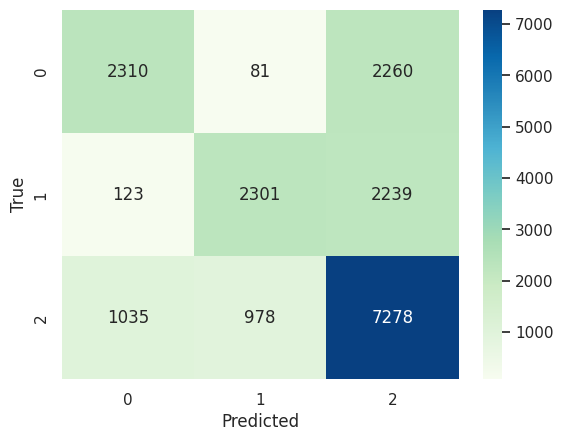

In [305]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [306]:
metricas(y_test, y_pred)

Accuracy: 0.64
Precision: 0.66
Recall: 0.59
F1 Score: 0.61


Comparativamente, las métricas para el set de entrenamiento son:

In [307]:
y_pred = grid.predict(x_train)
metricas(y_train, y_pred)

Accuracy: 0.66
Precision: 0.68
Recall: 0.61
F1 Score: 0.63


AttributeError: 'KNeighborsClassifier' object has no attribute 'tree_'

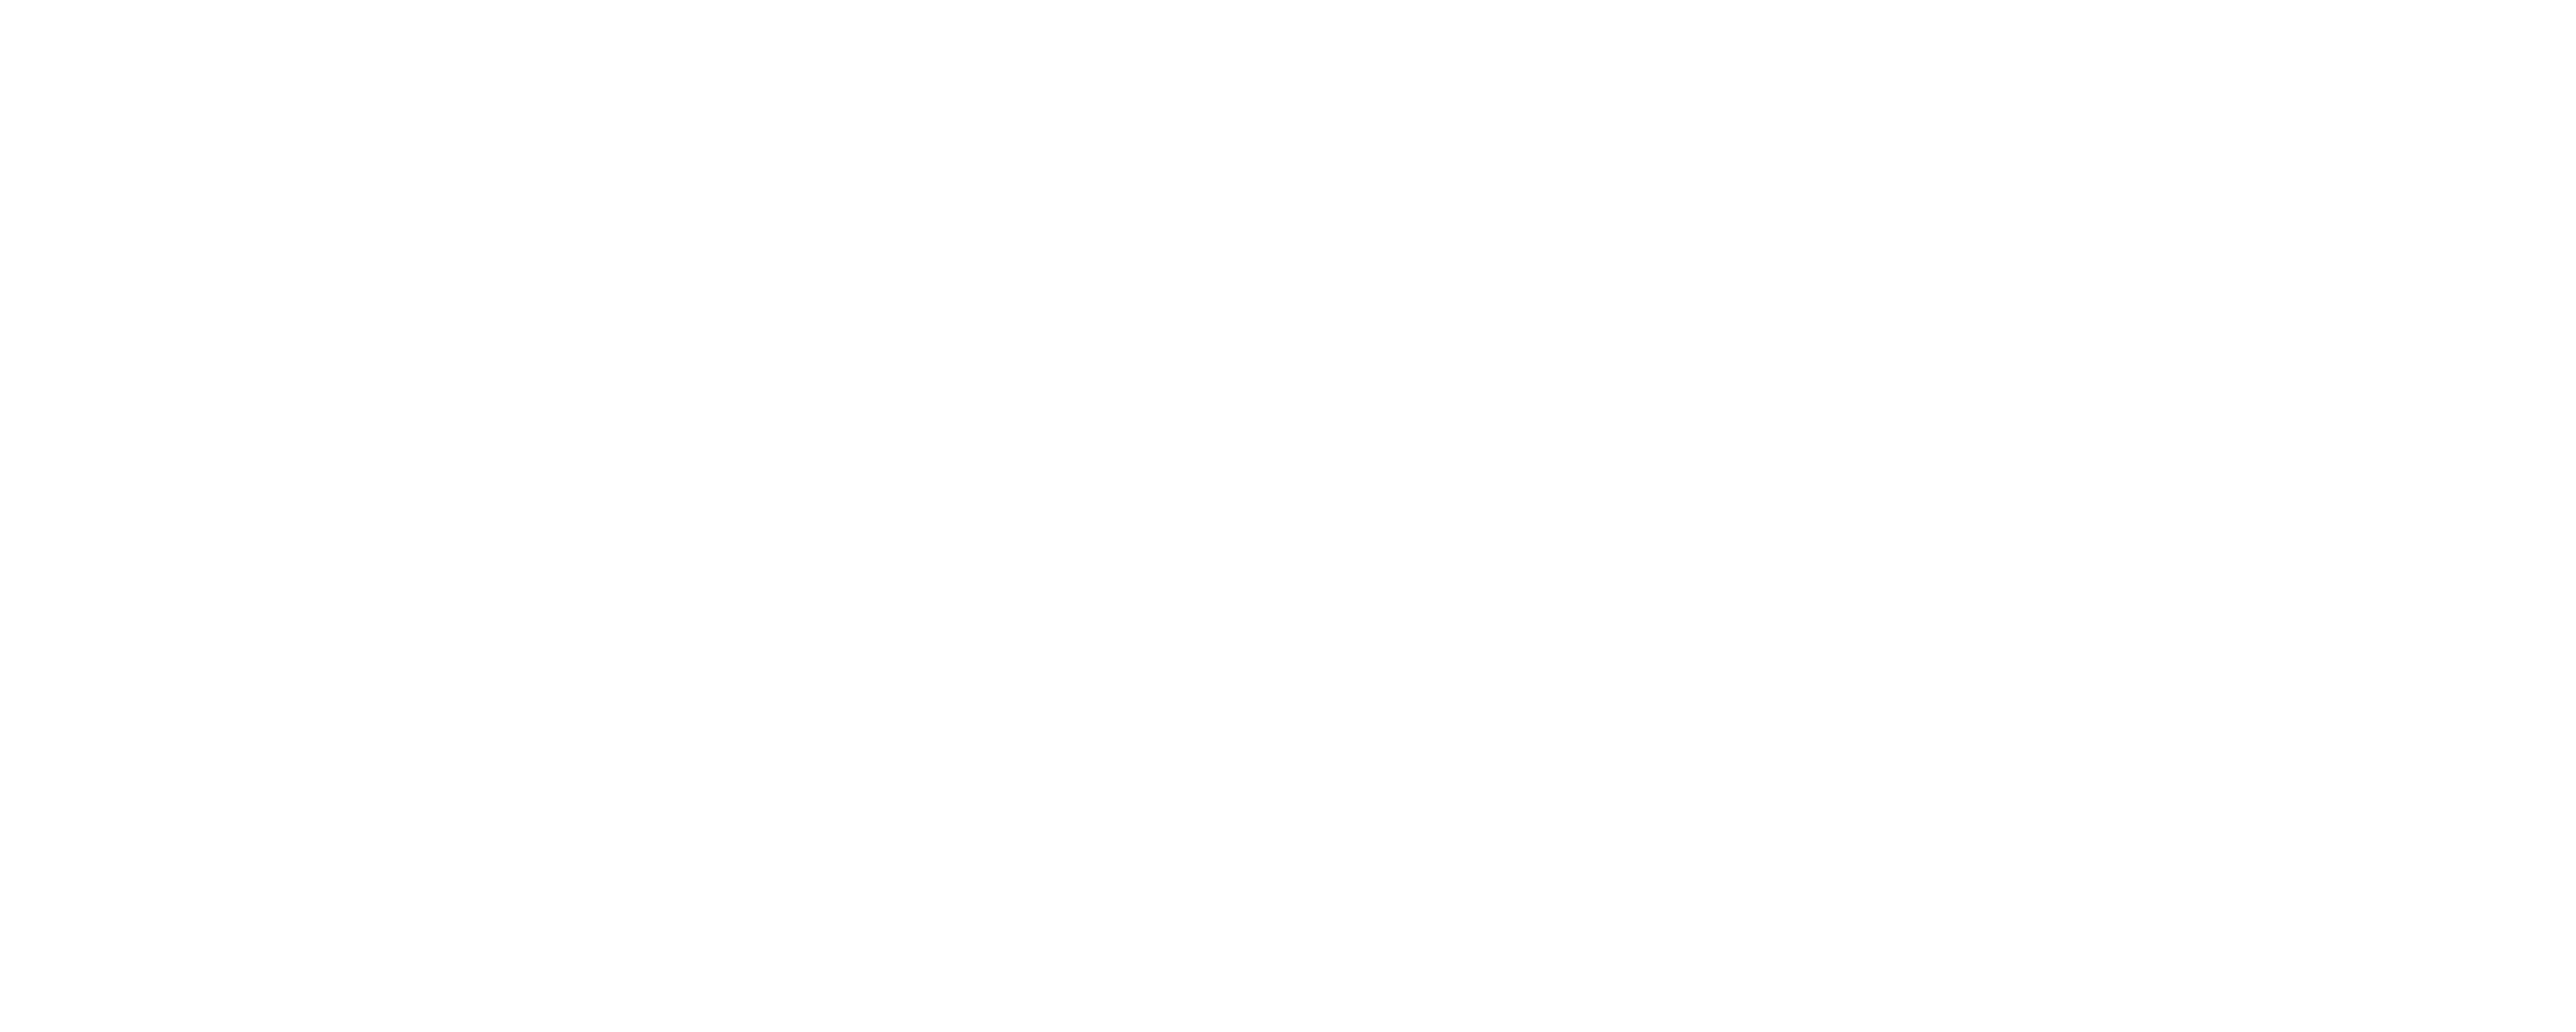

In [325]:
plt.figure(figsize=(50,20))

tree_plot=tree.plot_tree(grid.best_estimator_,
                         max_depth=3,
                         feature_names=x_train.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

El modelo decide en base a la ubicación geográfica de la propiedad. En primer lugar verifica la latitud, separando CABA en Norte y Sur.

Para la parte Sur, verifica el barrio de Puerto Madero. En caso negativo, verifica si el barrio es Caballito ya que las propiedades suelen tener mayor valor. Luego vuelve a decidir en base a latitud y longitud.
Si Puerto Madero fue afirmativo, decide en base a la longitud.

Para la parte Norte de CABA, verifica la longitud para ver si se trata de la zona Este u Oeste. Para la zona Este, basa su decisión en la latitud, verificando si se trata de la parte Norte de la misma.
En el caso de la zona Oeste, verifica si la propiedad se trata de un departamento.

## Modelo 2: Random Forest

Primero entrenamos un modelo Random Forest de decisión con las variables normales

In [309]:
param_grid = {
    'n_estimators': [45, 55],
    'max_depth': [20, 25],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0001, 0.0005]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0001, 0.0005],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25], 'n_estimators': [45, 55]},
             scoring='accuracy')

In [310]:
grid.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': 25,
 'n_estimators': 45}

In [311]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(46.25, 0.5, 'True')

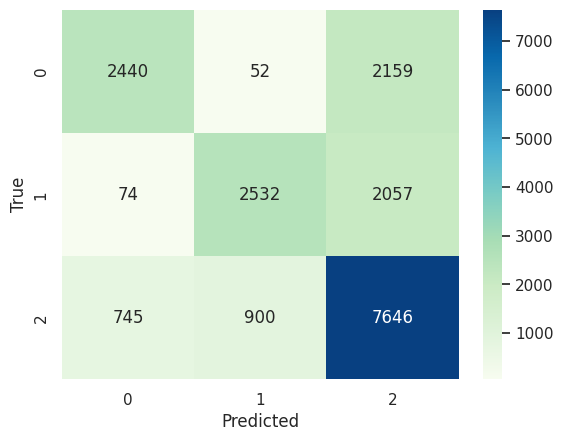

In [312]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [313]:
metricas(y_test, y_pred)

Accuracy: 0.68
Precision: 0.71
Recall: 0.63
F1 Score: 0.65


Comparativamente, las métricas para el set de entrenamiento son:

In [314]:
y_pred = grid.predict(x_train)
metricas(y_train, y_pred)

Accuracy: 0.75
Precision: 0.78
Recall: 0.71
F1 Score: 0.74


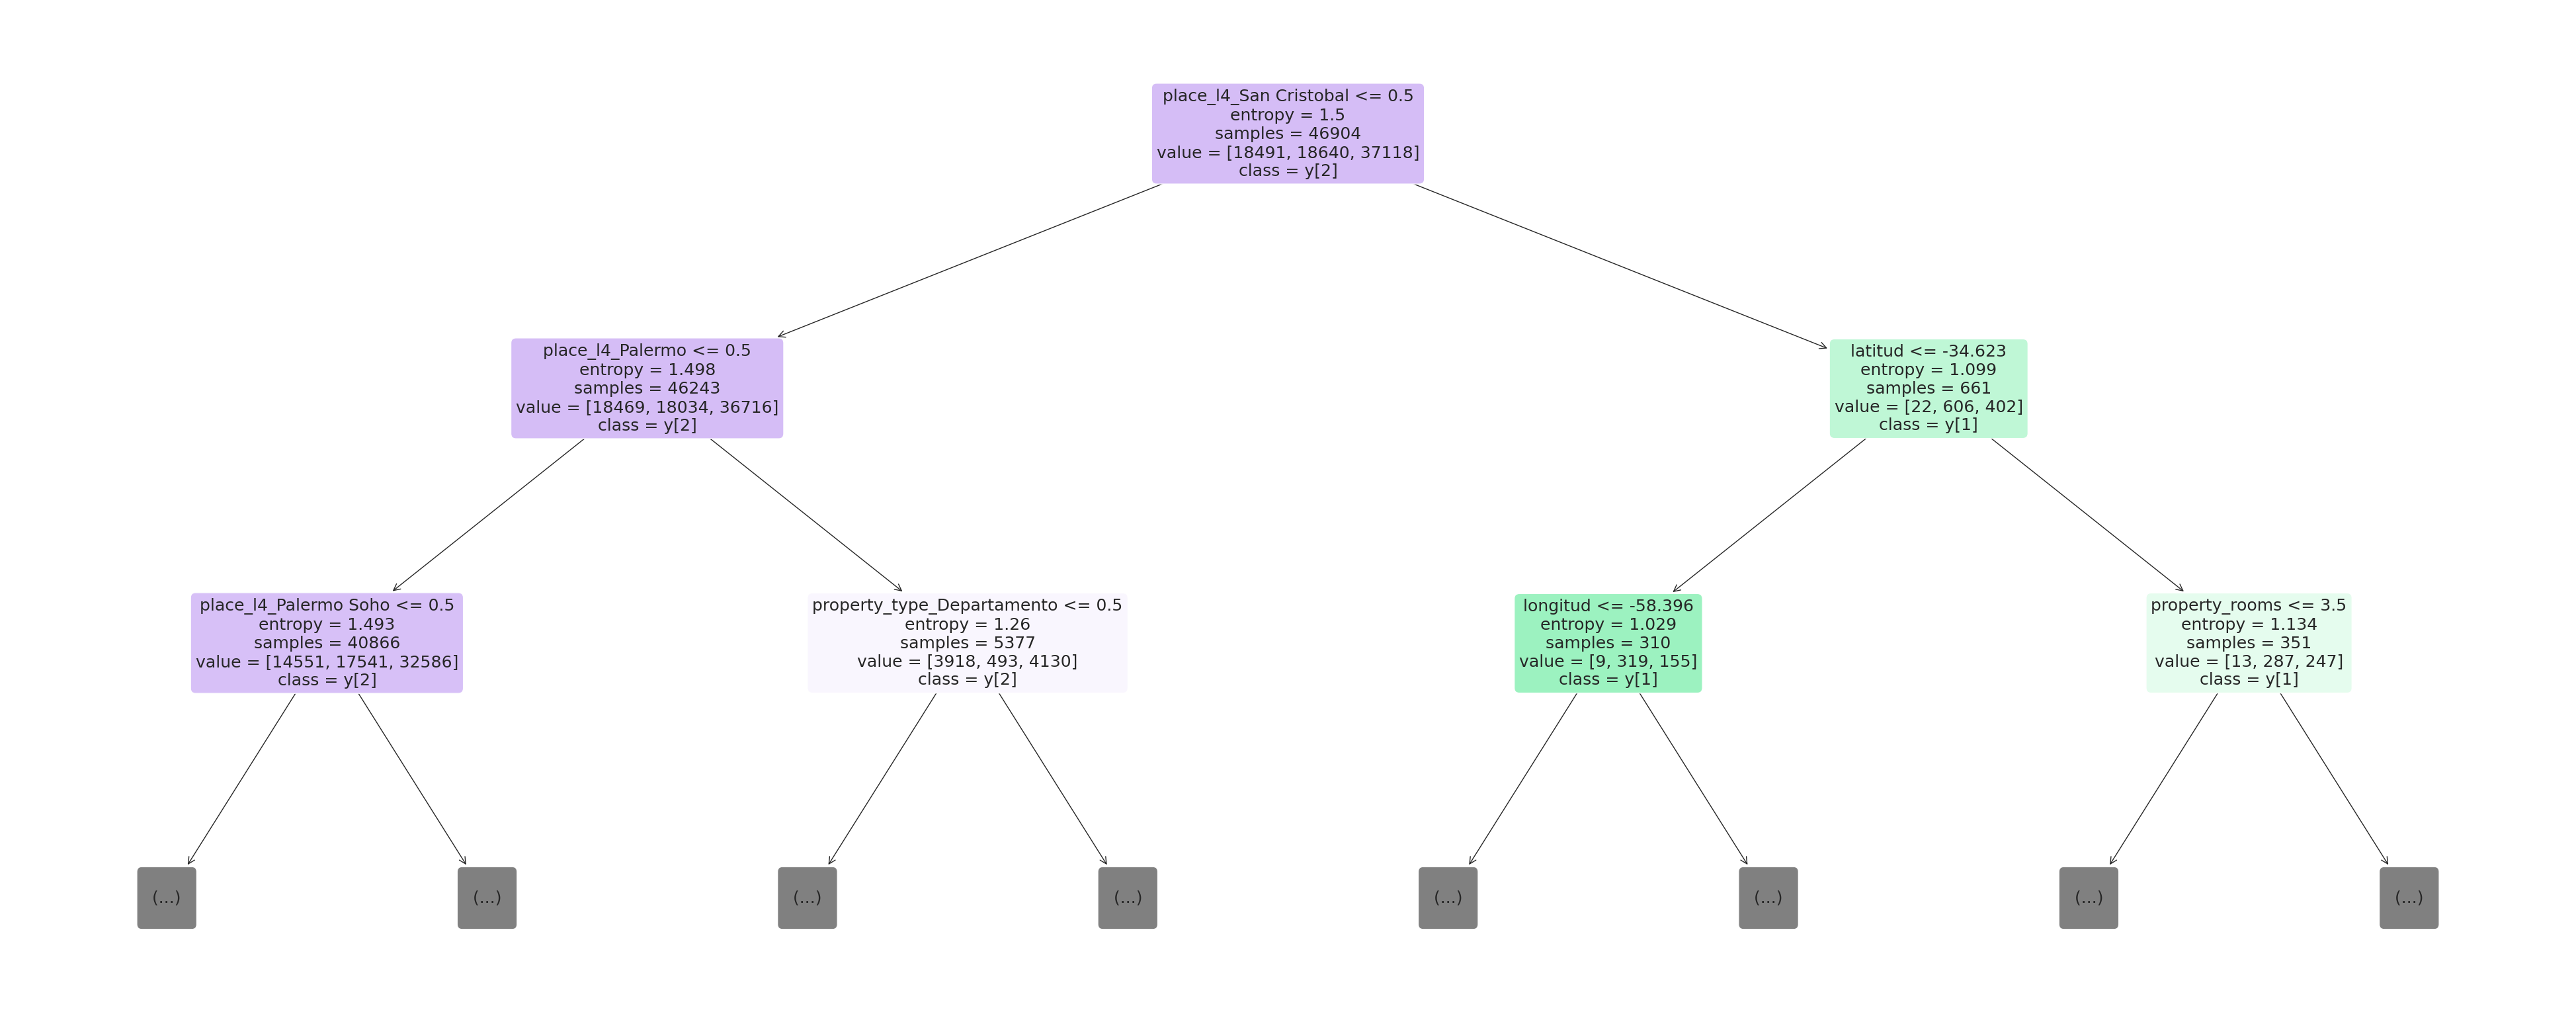

In [315]:
plt.figure(figsize=(50,20))
tree_plot=tree.plot_tree(grid.best_estimator_.estimators_[1],
                         max_depth=2,
                         feature_names=x_train.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

El modelo decide en base a 45 arboles diferentes. La imagen y descripción reflejan los resultados de uno de ellos.

La primer decisión la toma basándose en el barrio. En primer lugar verifica San Cristobal, en caso negativo Palermo y a continuación Palermo Soho.
Una vez definido el barrio en el que se encuentra la entrada, las siguientes decisiones las toma en base al tipo de propiedad y a la ubicación geográfica de la misma.

Notamos que la rama de la izquierda tiene la mayor cantidad de entradas, mientras que las de la derecha descartan pocos casos.


## Método 3: KNN

Primero entrenamos un modelo K-nearest neighbours con las variables normales

In [329]:
param_grid = {
    'n_neighbors': [*range(2, 4, 1)],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['distance'],
    'n_jobs':[-1],
    'leaf_size':[*range(5, 10, 2)]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 7, 9], 'n_jobs': [-1],
                         'n_neighbors': [2, 3], 'weights': ['distance']},
             scoring='accuracy')

In [330]:
grid.best_params_

{'algorithm': 'brute',
 'leaf_size': 5,
 'n_jobs': -1,
 'n_neighbors': 3,
 'weights': 'distance'}

In [331]:
y_pred = grid.predict(x_test[x_train.columns.tolist()])

Text(46.25, 0.5, 'True')

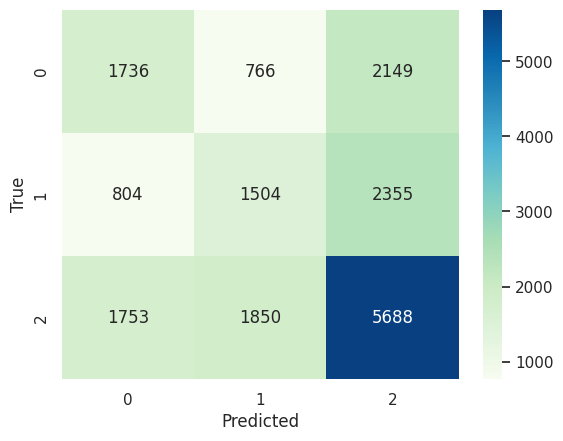

In [332]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [333]:
metricas(y_test, y_pred)

Accuracy: 0.48
Precision: 0.44
Recall: 0.44
F1 Score: 0.44


Comparativamente, las métricas para el set de entrenamiento son:

In [334]:
y_pred = grid.predict(x_train)
metricas(y_train, y_pred)

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


## Conclusiones

De los resultados observados, elegiríamos Random Forest ya que es el que mejores métricas tiene.
El método KNN muestra signos de overfitting, por lo cual no lo elegiríamos.

#  **4. Regresión**

Definimos una función para la impresión de métricas:

In [609]:
def performance_y_metricas(regressor, x_test, y_train, y_test):

  y_pred = regressor.predict(x_test)

  performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
  performance.head(10)

  pct = np.sum(y_test.values == y_pred) / len(y_test) * 100

  print(f"Se obtuvo un {round(pct,3)}% de aciertos.")

  mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

  print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

  rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

  print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

  print(f"El score obtenido es es: {regressor.score(x_test, y_test)}")

  return y_pred

En esta última parte del trabajo, buscaremos predecir el precio de la propiedad (variable `property_price`) utilizando los modelos

- KNN
- XGBoost
- Adaboost

In [359]:
def random_cv_hyper_param_optimization(n, f, regressor, params, x_train, y_train):

  randomcv = RandomizedSearchCV(estimator = regressor,
                                param_distributions = params_grid,
                                scoring = make_scorer(sk.metrics.accuracy_score),
                                cv = StratifiedKFold(n_splits = f),
                                n_iter = n) 

  randomcv.fit(x_train, y_train)

  return randomcv

## Preparación de los DataSets

Realizamos las tareas de featuring correspondientes para poder entrenar los modelos según los requerimientos de cada modelo:

Hacemos una copia de los dataset de entrenamiento y testing para realizar la tarea de encoding:

In [360]:
le = LabelEncoder()

df_encoded = df.copy()
df_reduc_encoded = df_reduc.copy()
test_encoded = test.copy()

Transformamos las variables categóricas:

In [361]:
df_encoded['place_l2'] = le.fit_transform(df['place_l2'].astype(str))
df_encoded['place_l3'] = le.fit_transform(df['place_l3'].astype(str))
df_encoded['place_l4'] = le.fit_transform(df['place_l4'].astype(str))
df_encoded['place_l5'] = le.fit_transform(df['place_l5'].astype(str))
df_encoded['place_l6'] = le.fit_transform(df['place_l6'].astype(str))
df_encoded['operation'] = le.fit_transform(df['operation'].astype(str))
df_encoded['property_type'] = le.fit_transform(df['property_type'].astype(str))

In [362]:
df_reduc_encoded['place_l4'] = le.fit_transform(df_reduc['place_l4'].astype(str))
df_reduc_encoded['property_type'] = le.fit_transform(df_reduc['property_type'].astype(str))

In [363]:
test_encoded['place_l2'] = le.fit_transform(test['place_l2'].astype(str))
test_encoded['place_l3'] = le.fit_transform(test['place_l3'].astype(str))
test_encoded['place_l4'] = le.fit_transform(test['place_l4'].astype(str))
test_encoded['place_l5'] = le.fit_transform(test['place_l5'].astype(str))
test_encoded['place_l6'] = le.fit_transform(test['place_l6'].astype(str))
test_encoded['operation'] = le.fit_transform(test['operation'].astype(str))
test_encoded['property_type'] = le.fit_transform(test['property_type'].astype(str))

## Modelo KNN

### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [364]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

knn_regressor = KNeighborsRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [365]:
y_pred = performance_y_metricas(knn_regressor, x_test, y_train, y_test)

Se obtuvo un 2.037% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20217.696103198068
El error según la métrica 'Root Mean Square Error' de test es: 142.1889450808257
El score obtenido es es: 0.19252028269831956


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [366]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

knn_regressor = KNeighborsRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [367]:
y_pred = performance_y_metricas(knn_regressor, x_test, y_train, y_test)

Se obtuvo un 0.15% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 82046149413.98877
El error según la métrica 'Root Mean Square Error' de test es: 286436.99030325806
El score obtenido es es: 0.3503918287047809


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [368]:
params_grid = {'n_neighbors': range(1,20), 
              'weights': ['distance','uniform'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'metric': ['euclidean','manhattan','chebyshev']}

#### DataSet Train

Entrenamos el modelo:

In [369]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [370]:
randomcv = random_cv_hyper_param_optimization(10, 5, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [371]:
print(randomcv.best_params_)

{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'chebyshev', 'algorithm': 'ball_tree'}


Analizamos la performance y las métricas resultantes:

In [372]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 1.01% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20043.32738046655
El error según la métrica 'Root Mean Square Error' de test es: 141.57445878570948
El score obtenido es es: 0.19948443955470974


Ahora probemos con 20 iteraciones y 10 folds:

In [373]:
randomcv = random_cv_hyper_param_optimization(20, 10, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [374]:
print(randomcv.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'kd_tree'}


Analizamos la performance y las métricas resultantes:

In [375]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 14.657% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20376.262778822897
El error según la métrica 'Root Mean Square Error' de test es: 142.74544748895812
El score obtenido es es: 0.18618724782859708


Exportamos el modelo:

In [376]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train.joblib'
else:
  path = 'MODELOS/KNN_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train.joblib']

#### DataSet Reducido

Entrenamos el modelo:

In [377]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [378]:
randomcv = random_cv_hyper_param_optimization(10, 5, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [379]:
print(randomcv.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan', 'algorithm': 'ball_tree'}


Analizamos la performance y las métricas resultantes:

In [380]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 6.858% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 91236387448.27159
El error según la métrica 'Root Mean Square Error' de test es: 302053.61684355245
El score obtenido es es: 0.2776272472361917


Ahora probemos con 20 iteraciones y 10 folds:

In [381]:
randomcv = random_cv_hyper_param_optimization(20, 10, KNeighborsRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [382]:
print(randomcv.best_params_)

{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean', 'algorithm': 'brute'}


Analizamos la performance y las métricas resultantes:

In [383]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 6.052% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 98052666745.43843
El error según la métrica 'Root Mean Square Error' de test es: 313133.62442484265
El score obtenido es es: 0.2236587092743716


Exportamos el modelo:

In [384]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/KNN_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/KNN_Regressor_Train_Reducido.joblib']

## Modelo XGBoost

### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [385]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

xgb_regressor = XGBRegressor().fit(x_train, y_train)

[17:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Analizamos la performance y las métricas resultantes:

In [386]:
y_pred = performance_y_metricas(xgb_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 19929.163113681734
El error según la métrica 'Root Mean Square Error' de test es: 141.1706878699744
El score obtenido es es: 0.20404407530147395


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [387]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

xgb_regressor = XGBRegressor().fit(x_train, y_train)

[17:12:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Analizamos la performance y las métricas resultantes:

In [388]:
y_pred = performance_y_metricas(xgb_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56634799779.45731
El error según la métrica 'Root Mean Square Error' de test es: 237980.6710206888
El score obtenido es es: 0.5515886000844858


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [389]:
params_grid = {'learning_rate': [0.1, 0.2]}

#### DataSet Train

Entrenamos el modelo:

In [390]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [391]:
randomcv = random_cv_hyper_param_optimization(10, 5, XGBRegressor(), params_grid, x_train, y_train)

[17:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [392]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [393]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 19929.163113681734
El error según la métrica 'Root Mean Square Error' de test es: 141.1706878699744
El score obtenido es es: 0.20404407530147395


Ahora probemos con 20 iteraciones y 10 folds:

In [394]:
randomcv = random_cv_hyper_param_optimization(20, 10, XGBRegressor(), params_grid, x_train, y_train)

[17:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [395]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [396]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 19929.163113681734
El error según la métrica 'Root Mean Square Error' de test es: 141.1706878699744
El score obtenido es es: 0.20404407530147395


Exportamos el modelo:

In [397]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train.joblib'
else:
  path = 'MODELOS/XGB_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train.joblib']

#### DataSet Reducido

Entrenamos el modelo:

In [398]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [399]:
randomcv = random_cv_hyper_param_optimization(10, 5, XGBRegressor(), params_grid, x_train, y_train)

[17:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [400]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [401]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56634799779.45731
El error según la métrica 'Root Mean Square Error' de test es: 237980.6710206888
El score obtenido es es: 0.5515886000844858


Ahora probemos con 20 iteraciones y 10 folds:

In [402]:
randomcv = random_cv_hyper_param_optimization(20, 10, XGBRegressor(), params_grid, x_train, y_train)

[17:15:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Los mejores hiperparámetros encontrados son:

In [403]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [404]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 56634799779.45731
El error según la métrica 'Root Mean Square Error' de test es: 237980.6710206888
El score obtenido es es: 0.5515886000844858


Exportamos el modelo:

In [405]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/XGB_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/XGB_Regressor_Train_Reducido.joblib']

## Modelo AdaBoost



### Entrenamiento y Predicción

#### DataSet Train

Entrenamos el modelo:

In [406]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

ada_regressor = AdaBoostRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [407]:
y_pred = performance_y_metricas(ada_regressor, x_test, y_train, y_test)

Se obtuvo un 0.005% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20266.63821523243
El error según la métrica 'Root Mean Square Error' de test es: 142.3609434333463
El score obtenido es es: 0.19056557121250373


Veamos que el modelo no es un buen predictor. Estudiemos qué ocurre cuando calculamos las predicciones para el dataset reducido.

#### DataSet Reducido

Entrenamos el modelo:

In [408]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

ada_regressor = AdaBoostRegressor().fit(x_train, y_train)

Analizamos la performance y las métricas resultantes:

In [409]:
y_pred = performance_y_metricas(ada_regressor, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 138876233631.87997
El error según la métrica 'Root Mean Square Error' de test es: 372661.0170542124
El score obtenido es es: -0.09956575427769665


Notemos que ninguno de los modelos analizados son buenos predictores. Intentemos ahora realizando una optimización de hiperparámetros.

### Optimización de hiperparámetros

Veamos qué sucede si optimizamos estos parámetros usando Random Search Cross Validation:

In [410]:
params_grid = {'learning_rate': [0.1, 0.2]}

#### DataSet Train

Entrenamos el modelo:

In [411]:
cols_train = df_encoded.columns.tolist()[1:-4]
col_target = df_encoded.columns.tolist()[-4]

x_train = df_encoded[cols_train]
y_train = df_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [412]:
randomcv = random_cv_hyper_param_optimization(10, 5, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [413]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [414]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20208.998571480264
El error según la métrica 'Root Mean Square Error' de test es: 142.15835737472582
El score obtenido es es: 0.19286765563423014


Ahora probemos con 20 iteraciones y 10 folds:

In [415]:
randomcv = random_cv_hyper_param_optimization(20, 10, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [416]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [417]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 20199.910864361176
El error según la métrica 'Root Mean Square Error' de test es: 142.1263904570899
El score obtenido es es: 0.19323061188493162


Exportamos el modelo:

In [418]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train.joblib'
else:
  path = 'MODELOS/AdaB_Regressor_Train.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train.joblib']

#### DataSet Reducido

Entrenamos el modelo:

In [419]:
cols_train = df_reduc_encoded.columns.tolist()[0:-1]
col_target = df_reduc_encoded.columns.tolist()[-1]

x_train = df_reduc_encoded[cols_train]
y_train = df_reduc_encoded[col_target].squeeze()

x_test = test_encoded[cols_train]
y_test = test_encoded[col_target].squeeze()

Probemos con 10 iteraciones y 5 folds:

In [420]:
randomcv = random_cv_hyper_param_optimization(10, 5, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [421]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [422]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 71621337243.45369
El error según la métrica 'Root Mean Square Error' de test es: 267621.6307465704
El score obtenido es es: 0.4329312680150529


Ahora probemos con 20 iteraciones y 10 folds:

In [423]:
randomcv = random_cv_hyper_param_optimization(20, 10, AdaBoostRegressor(), params_grid, x_train, y_train)

Los mejores hiperparámetros encontrados son:

In [424]:
print(randomcv.best_params_)

{'learning_rate': 0.1}


Analizamos la performance y las métricas resultantes:

In [425]:
y_pred = performance_y_metricas(randomcv.best_estimator_, x_test, y_train, y_test)

Se obtuvo un 0.0% de aciertos.
El error según la métrica 'Mean Square Error' de test es: 72598852657.927
El error según la métrica 'Root Mean Square Error' de test es: 269441.74260482914
El score obtenido es es: 0.4251916969889369


Exportamos el modelo:

In [426]:
if IN_COLAB:
  path = '/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train_Reducido.joblib'
else:
  path = 'MODELOS/AdaB_Regressor_Train_Reducido.joblib'

dump(randomcv.best_estimator_, path)

['/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/MODELOS/AdaB_Regressor_Train_Reducido.joblib']

#  **5. Conclusiones**

Para finalizar el informe, haremos un pequeño repaso sobre todos los puntos que analizamos y sus respectivos resultados y/o observaciones hechos por nosotros:
	
Con respecto a los outliers obtenidos a lo largo del trabajo, pudimos observar que contamos con una mayor certeza de determinación de los mismos al realizar análisis multivariados, dado que se cuenta con más datos del entorno. Estos valores atípicos fueron analizados a través de diferentes métodos y en su mayoría posteriormente descartados del dataset.

Por otro lado, uno de los puntos a destacar dentro de los modelos de clasificación fue la diferencia en el score entre el entrenamiento con las variables normales y reducidas en el modelo KNN. Hubo un mejoramiento notable entre ambas predicciones. Posiblemente esto sea porque al calcular las distancias entre vecinos es importante que todas las variables esten en órdenes de magnitud similares.

Otro punto interesante fue la similitud entre la clasificación que obtuvimos por árbol de decisión comparándola con el agrupamiento por K-means. Se encontró que se formaron tres grupos similares, distribuidos aproximadamente por las mismas zonas. Además, el modelo de árbol de decisión fue el más fácil de analizar gráficamente.

Para la parte de regresión estuvimos estudiando 3 modelos. Por un lado utilizamos KNN. Si bien este modelo resulta el más sencillo de todos, suele ser el que peores predicciones realiza. Pasando al XGBoost, a pesar de que obtuvimos una menor cantidad de aciertos, el porcentaje obtenido mediante kfold fue superior. Utilizando el último modelo no notamos grandes variaciones en las métricas percibidas. Cabe destacar que en los tres obtuvimos errores entre las mediciones que son extremadamente altos. Esto nos llamó mucho la atención, y lo atribuímos a algún error cometido involuntariamente durante algún procesamiento.  

A lo largo de este trabajo práctico, logramos tener un primer acercamiento con estas tareas del análisis de datos. En particular, debimos tomar muchas decisiones cuyo impacto es difícil de estimar en el resultado final. Un ejemplo de ello fue la complejidad de decidir sobre el reemplazo de valores nulos en el dataset original de manera que no afecte la distribución natural de los datos. Concluimos, entonces, que el análisis de datos es una tarea compleja y para hacerlo de manera eficiente se tienen que realizar diversos y detallados análisis de todas las variables comprometidas.

